In [3]:
import os
import time
import cv2
from ultralytics import YOLO
import os
from ultralytics.utils.plotting import Annotator
import yolov7
from colorama import Fore, Style
import json 


In [4]:
def detect_fire_smoke(model_yolov8, model_yolov7, dir_path, **kwargs):
    for idx, file in enumerate(os.listdir(dir_path)):
        print(f"Processing file {idx + 1} out of {len(os.listdir(dir_path))}")
        file_path = os.path.join(dir_path, file)
        try:
            confidence = kwargs.get("confidence", 0.2)
            img = cv2.imread(file_path)
            img_size_mb = os.path.getsize(file_path) / 1e6

            st_8 = time.time()
            model_yolov8.predict(img, conf=confidence)
            end_8 = time.time()

            st_7 = time.time()
            model_yolov7(img, size=640)
            end_7 = time.time()

            results = {"yolov8_time": end_8 - st_8, "yolov7_time": end_7 - st_7, "img_size_mb": img_size_mb}
            yield {f"img_{idx}": results}
        except Exception as e:
            print(Fore.RED + f"Error in file {file_path}")
            print(e)
            print(Style.RESET_ALL)
            continue

def append_to_json_file(data, filename):
    try:
        with open(filename, 'r') as f:
            existing_data = json.load(f)
    except (FileNotFoundError, json.JSONDecodeError):
        existing_data = []

    existing_data.append(data)

    with open(filename, 'w') as f:
        json.dump(existing_data, f)

def process_files(model_yolov8, model_yolov7, dir_path, **kwargs):
    start = time.time()
    json_file_path = "times/times_colab.json"
    
    for result in detect_fire_smoke(model_yolov8, model_yolov7, dir_path, **kwargs):
        append_to_json_file(result, json_file_path)
    
    print(f"Total time: {time.time() - start}")

In [3]:
# Load YoLoV8
model_yolov8 = YOLO("models/yolov8/weights/fire_model.pt")
# Load YoLoV7
model_yolov7 = yolov7.load("models/yolov7/runs/train/exp/weights/best.pt")
# Confidence
confidence = 0.2
model_yolov7.conf = confidence

Fusing layers... 
IDetect.fuse


/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [23]:
dir_path = "custom_dataset_with_fire_images"
#os.mkdir("times")
times = []
start = time.time()
process_files(model_yolov8, model_yolov7, dir_path, confidence=0.2)
print(f"Total time: {time.time() - start}")
            

Processing file 1 out of 2500


0: 640x640 1 fire, 380.2ms
Speed: 7.7ms preprocess, 380.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



Processing file 2 out of 2500


0: 640x640 3 fires, 288.1ms
Speed: 2.3ms preprocess, 288.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 fires, 180.9ms
Speed: 1.7ms preprocess, 180.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 3 out of 2500


Processing file 4 out of 2500


0: 448x640 1 fire, 258.5ms
Speed: 1.3ms preprocess, 258.5ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)



Processing file 5 out of 2500


0: 448x640 1 fire, 271.6ms
Speed: 2.5ms preprocess, 271.6ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)



Processing file 6 out of 2500


0: 640x640 3 fires, 301.2ms
Speed: 1.5ms preprocess, 301.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Processing file 7 out of 2500


0: 640x640 4 fires, 329.3ms
Speed: 2.0ms preprocess, 329.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 8 out of 2500


0: 640x640 1 fire, 296.7ms
Speed: 1.7ms preprocess, 296.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



Processing file 9 out of 2500


0: 640x640 2 fires, 325.6ms
Speed: 1.8ms preprocess, 325.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 fire, 186.5ms
Speed: 1.7ms preprocess, 186.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 10 out of 2500



0: 384x640 (no detections), 194.2ms
Speed: 1.1ms preprocess, 194.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 11 out of 2500



0: 352x640 2 fires, 174.5ms
Speed: 1.1ms preprocess, 174.5ms inference, 0.7ms postprocess per image at shape (1, 3, 352, 640)


Processing file 12 out of 2500


Processing file 13 out of 2500


0: 480x640 2 fires, 232.9ms
Speed: 1.4ms preprocess, 232.9ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)



Processing file 14 out of 2500


0: 448x640 1 fire, 210.1ms
Speed: 1.1ms preprocess, 210.1ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 6 fires, 180.4ms
Speed: 1.4ms preprocess, 180.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 15 out of 2500


Processing file 16 out of 2500


0: 640x640 1 fire, 359.1ms
Speed: 1.4ms preprocess, 359.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 17 out of 2500


0: 640x640 2 fires, 333.1ms
Speed: 1.6ms preprocess, 333.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



Processing file 18 out of 2500


0: 448x640 1 fire, 235.0ms
Speed: 2.8ms preprocess, 235.0ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 19 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 268.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 182.6ms
Speed: 1.9ms preprocess, 225.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 fires, 177.8ms
Speed: 1.7ms preprocess, 177.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_81.jpg
'NoneType' object has no attribute 'shape'

Processing file 20 out of 2500


Processing file 21 out of 2500


0: 640x640 2 fires, 319.8ms
Speed: 1.5ms preprocess, 319.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 22 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 224.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 207.9ms
Speed: 1.5ms preprocess, 216.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_678.jpg
'NoneType' object has no attribute 'shape'

Processing file 23 out of 2500


0: 640x640 4 fires, 281.9ms
Speed: 1.5ms preprocess, 281.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 24 out of 2500


0: 480x640 3 fires, 275.7ms
Speed: 1.1ms preprocess, 275.7ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 384x640 9 fires, 169.2ms
Speed: 1.2ms preprocess, 169.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 25 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 26 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 211.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 175.9ms
Speed: 1.6ms preprocess, 193.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_644.jpg
'NoneType' object has no attribute 'shape'

Processing file 27 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 214.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 170.0ms
Speed: 1.3ms preprocess, 192.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fire, 167.8ms
Speed: 1.3ms preprocess, 167.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_888.jpg
'NoneType' object has no attribute 'shape'

Processing file 28 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 29 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 237.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 191.1ms
Speed: 1.4ms preprocess, 214.1ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_650.jpg
'NoneType' object has no attribute 'shape'

Processing file 30 out of 2500


0: 448x640 2 fires, 206.1ms
Speed: 1.4ms preprocess, 206.1ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)



Processing file 31 out of 2500


0: 640x640 4 fires, 341.8ms
Speed: 1.6ms preprocess, 341.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 32 out of 2500


0: 448x640 1 fire, 1 smoke, 243.7ms
Speed: 1.7ms preprocess, 243.7ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)



Processing file 33 out of 2500


0: 448x640 (no detections), 208.5ms
Speed: 1.3ms preprocess, 208.5ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 34 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 256.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 171.0ms
Speed: 1.3ms preprocess, 213.6ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_863.jpg
'NoneType' object has no attribute 'shape'

Processing file 35 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 217.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 203.7ms
Speed: 1.4ms preprocess, 210.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_877.jpg
'NoneType' object has no attribute 'shape'

Processing file 36 out of 2500


0: 448x640 2 fires, 202.6ms
Speed: 1.9ms preprocess, 202.6ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)

0: 416x640 (no detections), 190.9ms
Speed: 1.8ms preprocess, 190.9ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)


Processing file 37 out of 2500


Processing file 38 out of 2500


0: 384x640 1 fire, 223.8ms
Speed: 1.9ms preprocess, 223.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fire, 170.1ms
Speed: 1.4ms preprocess, 170.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 39 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 40 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 239.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 187.9ms
Speed: 1.5ms preprocess, 213.8ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 320x640 1 fire, 157.5ms
Speed: 1.0ms preprocess, 157.5ms inference, 0.5ms postprocess per image at shape (1, 3, 320, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_687.jpg
'NoneType' object has no attribute 'shape'

Processing file 41 out of 2500



0: 384x640 2 fires, 1 smoke, 194.6ms
Speed: 1.0ms preprocess, 194.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 42 out of 2500



0: 416x640 4 fires, 192.4ms
Speed: 1.2ms preprocess, 192.4ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)


Processing file 43 out of 2500



0: 448x640 1 fire, 192.4ms
Speed: 1.4ms preprocess, 192.4ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 44 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 45 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 225.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 177.7ms
Speed: 1.3ms preprocess, 201.7ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 448x640 1 fire, 186.5ms
Speed: 1.3ms preprocess, 186.5ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_693.jpg
'NoneType' object has no attribute 'shape'

Processing file 46 out of 2500


Processing file 47 out of 2500


0: 480x640 2 fires, 268.4ms
Speed: 1.4ms preprocess, 268.4ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 48 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 255.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 210.8ms
Speed: 1.6ms preprocess, 233.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 fires, 191.5ms
Speed: 2.5ms preprocess, 191.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_718.jpg
'NoneType' object has no attribute 'shape'

Processing file 49 out of 2500


Processing file 50 out of 2500


0: 448x640 3 fires, 215.8ms
Speed: 1.1ms preprocess, 215.8ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 51 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 212.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 172.6ms
Speed: 1.3ms preprocess, 192.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_730.jpg
'NoneType' object has no attribute 'shape'

Processing file 52 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 232.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 198.0ms
Speed: 1.8ms preprocess, 215.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_724.jpg
'NoneType' object has no attribute 'shape'

Processing file 53 out of 2500


0: 448x640 1 fire, 223.0ms
Speed: 1.1ms preprocess, 223.0ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 3 fires, 173.6ms
Speed: 1.2ms preprocess, 173.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 54 out of 2500


Processing file 55 out of 2500


0: 480x640 1 fire, 224.1ms
Speed: 1.5ms preprocess, 224.1ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 384x640 1 fire, 167.5ms
Speed: 1.7ms preprocess, 167.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 56 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 57 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 277.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 216.5ms
Speed: 1.6ms preprocess, 247.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_917.jpg
'NoneType' object has no attribute 'shape'

Processing file 58 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 233.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 190.4ms
Speed: 1.3ms preprocess, 211.9ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_903.jpg
'NoneType' object has no attribute 'shape'

Processing file 59 out of 2500


0: 416x640 2 smokes, 204.2ms
Speed: 1.2ms preprocess, 204.2ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)



Processing file 60 out of 2500


0: 640x640 (no detections), 330.3ms
Speed: 1.7ms preprocess, 330.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 fires, 183.7ms
Speed: 1.5ms preprocess, 183.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 61 out of 2500



0: 384x640 1 fire, 176.5ms
Speed: 1.4ms preprocess, 176.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 62 out of 2500



0: 384x640 1 fire, 177.2ms
Speed: 1.9ms preprocess, 177.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 63 out of 2500


Processing file 64 out of 2500


0: 640x640 3 fires, 371.2ms
Speed: 1.8ms preprocess, 371.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 65 out of 2500


0: 640x640 1 fire, 356.4ms
Speed: 1.6ms preprocess, 356.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



Processing file 66 out of 2500


0: 640x640 1 fire, 326.2ms
Speed: 2.0ms preprocess, 326.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



Processing file 67 out of 2500


0: 640x640 1 fire, 296.9ms
Speed: 1.8ms preprocess, 296.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



Processing file 68 out of 2500


0: 640x640 3 fires, 302.1ms
Speed: 1.8ms preprocess, 302.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



Processing file 69 out of 2500


0: 384x640 2 fires, 273.4ms
Speed: 1.0ms preprocess, 273.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Processing file 70 out of 2500


0: 448x640 5 fires, 283.4ms
Speed: 1.1ms preprocess, 283.4ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)



Processing file 71 out of 2500


0: 384x640 1 smoke, 226.6ms
Speed: 1.6ms preprocess, 226.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)



Processing file 72 out of 2500


0: 384x640 (no detections), 232.4ms
Speed: 1.3ms preprocess, 232.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Processing file 73 out of 2500


0: 416x640 3 fires, 240.1ms
Speed: 1.1ms preprocess, 240.1ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)



Processing file 74 out of 2500


0: 640x640 2 fires, 420.8ms
Speed: 2.5ms preprocess, 420.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 75 out of 2500


0: 352x640 1 fire, 210.0ms
Speed: 2.2ms preprocess, 210.0ms inference, 1.1ms postprocess per image at shape (1, 3, 352, 640)



Processing file 76 out of 2500


0: 640x640 1 fire, 295.7ms
Speed: 1.4ms preprocess, 295.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



Processing file 77 out of 2500


0: 384x640 4 fires, 272.2ms
Speed: 2.5ms preprocess, 272.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)



Processing file 78 out of 2500


0: 640x640 1 fire, 333.6ms
Speed: 1.5ms preprocess, 333.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



Processing file 79 out of 2500


0: 448x640 1 fire, 222.1ms
Speed: 1.2ms preprocess, 222.1ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 1 fire, 190.5ms
Speed: 2.5ms preprocess, 190.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 80 out of 2500


Processing file 81 out of 2500


0: 384x640 2 fires, 212.0ms
Speed: 1.0ms preprocess, 212.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)



Processing file 82 out of 2500


0: 640x640 1 fire, 349.7ms
Speed: 1.5ms preprocess, 349.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



Processing file 83 out of 2500


0: 480x640 1 fire, 253.2ms
Speed: 1.2ms preprocess, 253.2ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)



Processing file 84 out of 2500


0: 640x640 1 fire, 310.2ms
Speed: 1.4ms preprocess, 310.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



Processing file 85 out of 2500


0: 448x640 1 fire, 212.4ms
Speed: 1.1ms preprocess, 212.4ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)



Processing file 86 out of 2500


0: 480x640 4 fires, 211.7ms
Speed: 1.1ms preprocess, 211.7ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)



Processing file 87 out of 2500


0: 640x640 3 fires, 313.6ms
Speed: 1.4ms preprocess, 313.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



Processing file 88 out of 2500


0: 640x640 1 fire, 320.3ms
Speed: 1.4ms preprocess, 320.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



Processing file 89 out of 2500


0: 640x640 1 fire, 351.8ms
Speed: 2.2ms preprocess, 351.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



Processing file 90 out of 2500


0: 640x640 4 fires, 317.1ms
Speed: 1.8ms preprocess, 317.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



Processing file 91 out of 2500


0: 640x640 (no detections), 298.5ms
Speed: 1.5ms preprocess, 298.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



Processing file 92 out of 2500


0: 384x640 3 fires, 212.1ms
Speed: 2.7ms preprocess, 212.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)



Processing file 93 out of 2500


0: 480x640 (no detections), 251.1ms
Speed: 2.2ms preprocess, 251.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)



Processing file 94 out of 2500


0: 640x640 1 fire, 325.6ms
Speed: 2.4ms preprocess, 325.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)

0: 448x640 1 fire, 195.1ms
Speed: 1.5ms preprocess, 195.1ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 95 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 96 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 225.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 170.0ms
Speed: 1.9ms preprocess, 197.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 416x640 1 fire, 185.8ms
Speed: 1.0ms preprocess, 185.8ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_902.jpg
'NoneType' object has no attribute 'shape'

Processing file 97 out of 2500



0: 256x640 2 fires, 121.9ms
Speed: 0.8ms preprocess, 121.9ms inference, 0.3ms postprocess per image at shape (1, 3, 256, 640)


Processing file 98 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 99 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 218.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 175.2ms
Speed: 1.5ms preprocess, 196.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 6 fires, 166.8ms
Speed: 1.7ms preprocess, 166.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_916.jpg
'NoneType' object has no attribute 'shape'

Processing file 100 out of 2500



0: 384x640 1 fire, 173.0ms
Speed: 1.0ms preprocess, 173.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 101 out of 2500


Processing file 102 out of 2500


0: 448x640 1 smoke, 197.2ms
Speed: 1.1ms preprocess, 197.2ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 103 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 219.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 178.8ms
Speed: 1.3ms preprocess, 199.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 448x640 3 fires, 189.9ms
Speed: 2.2ms preprocess, 189.9ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_725.jpg
'NoneType' object has no attribute 'shape'

Processing file 104 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 105 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 217.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 168.1ms
Speed: 1.3ms preprocess, 192.7ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_731.jpg
'NoneType' object has no attribute 'shape'

Processing file 106 out of 2500


0: 480x640 (no detections), 213.7ms
Speed: 1.1ms preprocess, 213.7ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 107 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 232.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 182.4ms
Speed: 2.0ms preprocess, 207.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_719.jpg
'NoneType' object has no attribute 'shape'

Processing file 108 out of 2500


0: 448x640 2 fires, 197.3ms
Speed: 1.2ms preprocess, 197.3ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 109 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 220.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 174.1ms
Speed: 1.4ms preprocess, 197.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_692.jpg
'NoneType' object has no attribute 'shape'

Processing file 110 out of 2500


0: 448x640 1 fire, 198.6ms
Speed: 1.1ms preprocess, 198.6ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)



Processing file 111 out of 2500


0: 448x640 (no detections), 198.8ms
Speed: 1.7ms preprocess, 198.8ms inference, 0.2ms postprocess per image at shape (1, 3, 448, 640)



Processing file 112 out of 2500


0: 480x640 (no detections), 358.7ms
Speed: 1.3ms preprocess, 358.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 320x640 2 fires, 156.0ms
Speed: 1.5ms preprocess, 156.0ms inference, 0.7ms postprocess per image at shape (1, 3, 320, 640)


Processing file 113 out of 2500



0: 448x640 3 fires, 197.9ms


Processing file 114 out of 2500


Speed: 1.1ms preprocess, 197.9ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)



Processing file 115 out of 2500


0: 640x512 1 fire, 254.9ms
Speed: 1.3ms preprocess, 254.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 512)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 116 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 219.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 178.4ms
Speed: 1.3ms preprocess, 198.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 416x640 3 fires, 1 smoke, 179.4ms
Speed: 1.1ms preprocess, 179.4ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_686.jpg
'NoneType' object has no attribute 'shape'

Processing file 117 out of 2500



0: 384x640 4 fires, 171.7ms
Speed: 1.4ms preprocess, 171.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 118 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 119 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 250.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 208.7ms
Speed: 1.5ms preprocess, 229.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 192x640 1 fire, 88.2ms
Speed: 1.0ms preprocess, 88.2ms inference, 0.4ms postprocess per image at shape (1, 3, 192, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_876.jpg
'NoneType' object has no attribute 'shape'

Processing file 120 out of 2500


Processing file 121 out of 2500


0: 480x640 2 fires, 225.9ms
Speed: 1.1ms preprocess, 225.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 122 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 226.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 203.8ms
Speed: 1.2ms preprocess, 215.0ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 448x640 1 fire, 195.1ms
Speed: 1.2ms preprocess, 195.1ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_862.jpg
'NoneType' object has no attribute 'shape'

Processing file 123 out of 2500


Processing file 124 out of 2500


0: 480x640 4 fires, 225.1ms
Speed: 1.4ms preprocess, 225.1ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 125 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 222.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 178.3ms
Speed: 1.3ms preprocess, 200.5ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fire, 169.9ms
Speed: 1.1ms preprocess, 169.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_651.jpg
'NoneType' object has no attribute 'shape'

Processing file 126 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 127 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 225.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 169.2ms
Speed: 1.4ms preprocess, 197.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_889.jpg
'NoneType' object has no attribute 'shape'

Processing file 128 out of 2500


0: 640x640 1 fire, 281.2ms
Speed: 1.4ms preprocess, 281.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 129 out of 2500


0: 640x640 1 fire, 286.3ms
Speed: 1.4ms preprocess, 286.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 130 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 309.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 176.7ms
Speed: 1.3ms preprocess, 243.1ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_645.jpg
'NoneType' object has no attribute 'shape'

Processing file 131 out of 2500


0: 448x640 3 fires, 226.5ms
Speed: 2.1ms preprocess, 226.5ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)



Processing file 132 out of 2500


0: 480x640 1 fire, 239.1ms
Speed: 1.6ms preprocess, 239.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 133 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 392.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 238.1ms
Speed: 2.1ms preprocess, 315.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_679.jpg
'NoneType' object has no attribute 'shape'

Processing file 134 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 271.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 198.4ms
Speed: 1.8ms preprocess, 234.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 fires, 171.8ms
Speed: 1.0ms preprocess, 171.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_80.jpg
'NoneType' object has no attribute 'shape'

Processing file 135 out of 2500


Processing file 136 out of 2500


0: 640x640 1 fire, 310.1ms
Speed: 1.5ms preprocess, 310.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



Processing file 137 out of 2500


0: 384x640 2 fires, 207.5ms
Speed: 2.0ms preprocess, 207.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Processing file 138 out of 2500


0: 640x640 1 fire, 307.0ms
Speed: 1.8ms preprocess, 307.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



Processing file 139 out of 2500


0: 384x640 1 fire, 198.1ms
Speed: 2.0ms preprocess, 198.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 140 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 229.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 176.9ms
Speed: 1.4ms preprocess, 203.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_94.jpg
'NoneType' object has no attribute 'shape'

Processing file 141 out of 2500


0: 480x640 (no detections), 223.7ms
Speed: 1.5ms preprocess, 223.7ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)



Processing file 142 out of 2500


0: 384x640 2 fires, 210.6ms
Speed: 1.0ms preprocess, 210.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fire, 180.3ms
Speed: 1.0ms preprocess, 180.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 143 out of 2500


Processing file 144 out of 2500


0: 448x640 1 fire, 202.7ms
Speed: 1.0ms preprocess, 202.7ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)



Processing file 145 out of 2500


0: 640x640 1 fire, 311.1ms
Speed: 1.6ms preprocess, 311.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



Processing file 146 out of 2500


0: 640x640 3 fires, 325.5ms
Speed: 2.0ms preprocess, 325.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



Processing file 147 out of 2500


0: 384x640 2 smokes, 202.6ms
Speed: 2.1ms preprocess, 202.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Processing file 148 out of 2500


0: 640x640 4 fires, 297.1ms
Speed: 1.7ms preprocess, 297.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 352x640 1 fire, 178.4ms
Speed: 1.5ms preprocess, 178.4ms inference, 0.4ms postprocess per image at shape (1, 3, 352, 640)


Processing file 149 out of 2500



0: 384x640 1 fire, 182.4ms
Speed: 1.6ms preprocess, 182.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 150 out of 2500


Processing file 151 out of 2500


0: 640x640 1 fire, 329.7ms
Speed: 1.8ms preprocess, 329.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



Processing file 152 out of 2500


0: 640x640 1 fire, 366.9ms
Speed: 1.9ms preprocess, 366.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 153 out of 2500


0: 640x640 1 fire, 328.4ms
Speed: 1.5ms preprocess, 328.4ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)



Processing file 154 out of 2500


0: 640x640 1 fire, 316.6ms
Speed: 1.5ms preprocess, 316.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 155 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 281.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 239.4ms
Speed: 1.4ms preprocess, 260.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_69.jpg
'NoneType' object has no attribute 'shape'

Processing file 156 out of 2500


0: 640x640 1 fire, 297.1ms
Speed: 1.6ms preprocess, 297.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 157 out of 2500


0: 640x640 1 fire, 323.4ms
Speed: 2.1ms preprocess, 323.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



Processing file 158 out of 2500


0: 384x640 1 smoke, 229.9ms
Speed: 1.8ms preprocess, 229.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Processing file 159 out of 2500


0: 640x640 1 fire, 296.0ms
Speed: 1.4ms preprocess, 296.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 160 out of 2500


0: 640x640 3 fires, 336.5ms
Speed: 1.5ms preprocess, 336.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 161 out of 2500


0: 640x640 2 fires, 1 smoke, 305.8ms
Speed: 1.5ms preprocess, 305.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 162 out of 2500


0: 640x640 1 fire, 358.7ms
Speed: 2.2ms preprocess, 358.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



Processing file 163 out of 2500


0: 640x640 2 fires, 561.3ms
Speed: 1.9ms preprocess, 561.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Processing file 164 out of 2500


0: 384x640 4 fires, 256.1ms
Speed: 2.6ms preprocess, 256.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)



Processing file 165 out of 2500


0: 384x640 5 fires, 248.9ms
Speed: 1.3ms preprocess, 248.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)



Processing file 166 out of 2500


0: 384x640 1 fire, 206.6ms
Speed: 9.1ms preprocess, 206.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)



Processing file 167 out of 2500


0: 480x640 2 fires, 1 smoke, 232.4ms
Speed: 1.3ms preprocess, 232.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)



Processing file 168 out of 2500


0: 448x640 (no detections), 215.3ms
Speed: 1.1ms preprocess, 215.3ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)



Processing file 169 out of 2500


0: 384x640 1 fire, 200.5ms
Speed: 1.9ms preprocess, 200.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 fires, 187.5ms
Speed: 1.7ms preprocess, 187.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 170 out of 2500


Processing file 171 out of 2500


0: 640x640 3 fires, 329.5ms
Speed: 2.0ms preprocess, 329.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 172 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 240.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 176.8ms
Speed: 1.6ms preprocess, 208.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_82.jpg
'NoneType' object has no attribute 'shape'

Processing file 173 out of 2500


0: 640x640 1 fire, 314.0ms
Speed: 1.5ms preprocess, 314.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 fires, 197.0ms


Processing file 174 out of 2500


Speed: 1.4ms preprocess, 197.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Processing file 175 out of 2500


0: 384x640 5 fires, 199.8ms
Speed: 1.8ms preprocess, 199.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)



Processing file 176 out of 2500


0: 640x640 2 fires, 301.1ms
Speed: 1.9ms preprocess, 301.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



Processing file 177 out of 2500


0: 640x640 1 fire, 365.7ms
Speed: 2.1ms preprocess, 365.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 320x640 1 fire, 194.9ms
Speed: 1.3ms preprocess, 194.9ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)


Processing file 178 out of 2500


Processing file 179 out of 2500


0: 640x640 1 fire, 350.1ms
Speed: 2.2ms preprocess, 350.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 180 out of 2500


0: 384x640 2 fires, 232.2ms
Speed: 3.2ms preprocess, 232.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 181 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 254.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 231.3ms
Speed: 1.4ms preprocess, 242.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fire, 1 smoke, 190.0ms
Speed: 0.9ms preprocess, 190.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_653.jpg
'NoneType' object has no attribute 'shape'

Processing file 182 out of 2500


Processing file 183 out of 2500


0: 480x640 1 fire, 250.7ms
Speed: 1.6ms preprocess, 250.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)



Processing file 184 out of 2500


0: 448x640 2 smokes, 223.2ms
Speed: 1.3ms preprocess, 223.2ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)



Processing file 185 out of 2500


0: 480x640 1 fire, 237.7ms
Speed: 2.8ms preprocess, 237.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 186 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 242.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 189.6ms
Speed: 1.3ms preprocess, 216.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_647.jpg
'NoneType' object has no attribute 'shape'

Processing file 187 out of 2500


0: 640x640 2 fires, 308.8ms
Speed: 1.4ms preprocess, 308.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 fire, 180.4ms
Speed: 1.0ms preprocess, 180.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 188 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 189 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 241.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 199.9ms
Speed: 1.5ms preprocess, 220.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_874.jpg
'NoneType' object has no attribute 'shape'

Processing file 190 out of 2500


0: 480x640 2 fires, 259.4ms
Speed: 1.2ms preprocess, 259.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)



Processing file 191 out of 2500


0: 448x640 3 fires, 239.1ms
Speed: 1.1ms preprocess, 239.1ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 192 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 241.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 196.3ms
Speed: 1.6ms preprocess, 219.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_860.jpg
'NoneType' object has no attribute 'shape'

Processing file 193 out of 2500


0: 448x640 2 fires, 221.5ms
Speed: 3.0ms preprocess, 221.5ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)



Processing file 194 out of 2500


0: 448x640 (no detections), 263.9ms
Speed: 1.6ms preprocess, 263.9ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)



Processing file 195 out of 2500


0: 448x640 2 fires, 206.6ms
Speed: 1.5ms preprocess, 206.6ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)



Processing file 196 out of 2500


0: 480x640 1 fire, 253.6ms
Speed: 1.5ms preprocess, 253.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 384x640 2 fires, 179.9ms
Speed: 0.9ms preprocess, 179.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 197 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 198 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 249.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 193.5ms
Speed: 1.3ms preprocess, 221.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_690.jpg
'NoneType' object has no attribute 'shape'

Processing file 199 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 240.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 199.6ms
Speed: 1.4ms preprocess, 220.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_848.jpg
'NoneType' object has no attribute 'shape'

Processing file 200 out of 2500


0: 448x640 4 fires, 232.7ms
Speed: 1.6ms preprocess, 232.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 201 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 233.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 206.5ms
Speed: 1.5ms preprocess, 219.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_684.jpg
'NoneType' object has no attribute 'shape'

Processing file 202 out of 2500


0: 640x480 1 fire, 251.4ms
Speed: 2.2ms preprocess, 251.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)



Processing file 203 out of 2500


0: 448x640 1 fire, 267.9ms
Speed: 1.1ms preprocess, 267.9ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)

0: 352x640 (no detections), 172.6ms
Speed: 1.1ms preprocess, 172.6ms inference, 0.4ms postprocess per image at shape (1, 3, 352, 640)


Processing file 204 out of 2500


Processing file 205 out of 2500


0: 640x640 1 fire, 316.0ms
Speed: 2.0ms preprocess, 316.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 206 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 236.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 197.2ms
Speed: 1.4ms preprocess, 216.6ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_727.jpg
'NoneType' object has no attribute 'shape'

Processing file 207 out of 2500


0: 640x448 1 fire, 214.2ms
Speed: 1.1ms preprocess, 214.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 448)



Processing file 208 out of 2500


0: 448x640 1 fire, 230.4ms
Speed: 1.1ms preprocess, 230.4ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 209 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 568.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 506.6ms
Speed: 4.2ms preprocess, 537.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_733.jpg
'NoneType' object has no attribute 'shape'

Processing file 210 out of 2500


0: 448x640 1 fire, 445.5ms
Speed: 1.5ms preprocess, 445.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 211 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 520.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 295.9ms
Speed: 2.8ms preprocess, 408.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_900.jpg
'NoneType' object has no attribute 'shape'

Processing file 212 out of 2500


0: 480x640 2 fires, 550.4ms
Speed: 1.6ms preprocess, 550.4ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)



Processing file 213 out of 2500


0: 384x640 1 fire, 423.6ms
Speed: 2.3ms preprocess, 423.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 214 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 414.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 284.4ms
Speed: 3.0ms preprocess, 349.7ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_914.jpg
'NoneType' object has no attribute 'shape'

Processing file 215 out of 2500


0: 480x640 5 fires, 296.5ms
Speed: 1.3ms preprocess, 296.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)



Processing file 216 out of 2500


0: 384x640 2 fires, 463.3ms
Speed: 2.1ms preprocess, 463.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)



Processing file 217 out of 2500


0: 480x640 5 fires, 502.7ms
Speed: 3.0ms preprocess, 502.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 218 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 356.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 211.7ms
Speed: 2.3ms preprocess, 283.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_928.jpg
'NoneType' object has no attribute 'shape'

Processing file 219 out of 2500


0: 640x544 3 fires, 317.3ms
Speed: 1.6ms preprocess, 317.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 544)



Processing file 220 out of 2500


0: 640x640 1 fire, 718.3ms
Speed: 3.7ms preprocess, 718.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



Processing file 221 out of 2500


0: 640x640 1 fire, 478.1ms
Speed: 3.2ms preprocess, 478.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



Processing file 222 out of 2500


0: 640x640 2 fires, 492.3ms
Speed: 4.2ms preprocess, 492.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



Processing file 223 out of 2500


0: 384x640 3 fires, 295.7ms
Speed: 2.5ms preprocess, 295.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Processing file 224 out of 2500


0: 640x640 4 fires, 456.5ms
Speed: 1.7ms preprocess, 456.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



Processing file 225 out of 2500


0: 640x640 5 fires, 455.2ms
Speed: 3.2ms preprocess, 455.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



Processing file 226 out of 2500


0: 416x640 1 fire, 392.0ms
Speed: 2.2ms preprocess, 392.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 640)



Processing file 227 out of 2500


0: 448x640 1 fire, 260.9ms
Speed: 1.6ms preprocess, 260.9ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)



Processing file 228 out of 2500


0: 352x640 2 fires, 2 smokes, 267.2ms
Speed: 2.1ms preprocess, 267.2ms inference, 0.7ms postprocess per image at shape (1, 3, 352, 640)



Processing file 229 out of 2500


0: 384x640 1 fire, 325.2ms
Speed: 1.3ms preprocess, 325.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)



Processing file 230 out of 2500


0: 384x640 4 fires, 472.0ms
Speed: 1.7ms preprocess, 472.0ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)



Processing file 231 out of 2500


0: 384x640 2 fires, 663.2ms
Speed: 2.2ms preprocess, 663.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Processing file 232 out of 2500


0: 384x640 1 fire, 355.2ms
Speed: 2.2ms preprocess, 355.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Processing file 233 out of 2500


0: 640x640 4 fires, 565.9ms
Speed: 2.6ms preprocess, 565.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 234 out of 2500


0: 448x640 1 fire, 408.0ms
Speed: 4.1ms preprocess, 408.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)



Processing file 235 out of 2500


0: 384x640 4 fires, 1 smoke, 236.5ms
Speed: 2.6ms preprocess, 236.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Processing file 236 out of 2500


0: 640x640 (no detections), 856.8ms
Speed: 1.8ms preprocess, 856.8ms inference, 7.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 237 out of 2500


0: 384x640 2 fires, 323.1ms
Speed: 1.6ms preprocess, 323.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)



Processing file 238 out of 2500


0: 448x640 2 fires, 386.4ms
Speed: 3.3ms preprocess, 386.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)



Processing file 239 out of 2500


0: 384x640 2 fires, 259.2ms
Speed: 1.6ms preprocess, 259.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)



Processing file 240 out of 2500


0: 640x640 1 fire, 420.4ms
Speed: 1.9ms preprocess, 420.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)



Processing file 241 out of 2500


0: 384x640 1 fire, 311.5ms
Speed: 1.2ms preprocess, 311.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)



Processing file 242 out of 2500


0: 640x448 4 fires, 264.2ms
Speed: 1.9ms preprocess, 264.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 448)



Processing file 243 out of 2500


0: 384x640 (no detections), 211.0ms
Speed: 1.1ms preprocess, 211.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 fires, 187.2ms
Speed: 1.5ms preprocess, 187.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 244 out of 2500


Processing file 245 out of 2500


0: 480x640 1 fire, 236.3ms
Speed: 1.2ms preprocess, 236.3ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)



Processing file 246 out of 2500


0: 480x640 1 fire, 263.6ms
Speed: 9.6ms preprocess, 263.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)



Processing file 247 out of 2500


0: 448x640 2 fires, 228.8ms
Speed: 1.3ms preprocess, 228.8ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)



Processing file 248 out of 2500


0: 640x640 1 fire, 560.4ms
Speed: 1.7ms preprocess, 560.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



Processing file 249 out of 2500


0: 640x640 2 fires, 700.2ms
Speed: 2.2ms preprocess, 700.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



Processing file 250 out of 2500


0: 640x640 1 fire, 642.9ms
Speed: 3.4ms preprocess, 642.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)



Processing file 251 out of 2500


0: 640x640 3 fires, 411.7ms
Speed: 5.0ms preprocess, 411.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 252 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 328.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 321.0ms
Speed: 2.6ms preprocess, 324.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_929.jpg
'NoneType' object has no attribute 'shape'

Processing file 253 out of 2500


0: 448x640 1 fire, 1 smoke, 466.3ms
Speed: 2.5ms preprocess, 466.3ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)



Processing file 254 out of 2500


0: 448x640 1 fire, 319.0ms
Speed: 1.2ms preprocess, 319.0ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 1 fire, 1 smoke, 186.1ms
Speed: 2.0ms preprocess, 186.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 255 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 256 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 258.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 181.2ms
Speed: 1.9ms preprocess, 219.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 352x640 4 fires, 164.9ms
Speed: 1.2ms preprocess, 164.9ms inference, 0.7ms postprocess per image at shape (1, 3, 352, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_915.jpg
'NoneType' object has no attribute 'shape'

Processing file 257 out of 2500



0: 384x640 1 smoke, 184.8ms
Speed: 1.0ms preprocess, 184.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 258 out of 2500


Processing file 259 out of 2500


0: 480x640 3 fires, 261.1ms
Speed: 1.2ms preprocess, 261.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)



Processing file 260 out of 2500


0: 480x640 2 fires, 232.7ms
Speed: 1.2ms preprocess, 232.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 261 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 239.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 183.3ms
Speed: 1.3ms preprocess, 211.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_901.jpg
'NoneType' object has no attribute 'shape'

Processing file 262 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 229.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 182.4ms
Speed: 1.6ms preprocess, 205.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_732.jpg
'NoneType' object has no attribute 'shape'

Processing file 263 out of 2500


0: 448x640 2 smokes, 210.4ms
Speed: 1.1ms preprocess, 210.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)



Processing file 264 out of 2500


0: 480x640 1 smoke, 230.7ms
Speed: 1.3ms preprocess, 230.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 265 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 231.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 177.9ms
Speed: 1.5ms preprocess, 204.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 fires, 177.9ms
Speed: 1.1ms preprocess, 177.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_726.jpg
'NoneType' object has no attribute 'shape'

Processing file 266 out of 2500


Processing file 267 out of 2500


0: 640x640 3 fires, 297.2ms
Speed: 1.6ms preprocess, 297.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



Processing file 268 out of 2500


0: 448x640 5 fires, 223.4ms
Speed: 3.3ms preprocess, 223.4ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)



Processing file 269 out of 2500


0: 640x640 1 fire, 332.3ms
Speed: 1.6ms preprocess, 332.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



Processing file 270 out of 2500


0: 448x640 3 fires, 204.5ms
Speed: 1.7ms preprocess, 204.5ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 2 fires, 187.6ms
Speed: 1.1ms preprocess, 187.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 271 out of 2500


Processing file 272 out of 2500


0: 480x640 1 fire, 237.3ms
Speed: 1.4ms preprocess, 237.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)



Processing file 273 out of 2500


0: 480x640 1 fire, 258.6ms
Speed: 1.7ms preprocess, 258.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 274 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 235.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 192.0ms
Speed: 1.6ms preprocess, 213.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_849.jpg
'NoneType' object has no attribute 'shape'

Processing file 275 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 225.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 185.0ms
Speed: 1.5ms preprocess, 205.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 fires, 173.6ms
Speed: 1.0ms preprocess, 173.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_691.jpg
'NoneType' object has no attribute 'shape'

Processing file 276 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 277 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 259.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 194.8ms
Speed: 1.5ms preprocess, 227.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fire, 1 smoke, 186.8ms
Speed: 1.1ms preprocess, 186.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_861.jpg
'NoneType' object has no attribute 'shape'

Processing file 278 out of 2500


Processing file 279 out of 2500


0: 448x640 (no detections), 275.7ms
Speed: 1.2ms preprocess, 275.7ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 2 fires, 194.9ms
Speed: 1.2ms preprocess, 194.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 280 out of 2500


Processing file 281 out of 2500


0: 448x640 1 fire, 220.9ms
Speed: 1.6ms preprocess, 220.9ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)



Processing file 282 out of 2500


0: 384x640 1 smoke, 212.7ms
Speed: 1.7ms preprocess, 212.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 283 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 276.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 200.0ms
Speed: 1.4ms preprocess, 238.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_875.jpg
'NoneType' object has no attribute 'shape'

Processing file 284 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 250.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 252.7ms
Speed: 1.5ms preprocess, 251.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_646.jpg
'NoneType' object has no attribute 'shape'

Processing file 285 out of 2500


0: 640x448 2 fires, 1 smoke, 254.9ms
Speed: 2.0ms preprocess, 254.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)



Processing file 286 out of 2500


0: 544x640 1 fire, 253.7ms
Speed: 1.3ms preprocess, 253.7ms inference, 0.6ms postprocess per image at shape (1, 3, 544, 640)



Processing file 287 out of 2500


0: 480x640 1 fire, 298.6ms
Speed: 1.5ms preprocess, 298.6ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)



Processing file 288 out of 2500


0: 640x640 2 fires, 298.7ms
Speed: 2.0ms preprocess, 298.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 289 out of 2500


0: 640x640 1 fire, 353.0ms
Speed: 1.8ms preprocess, 353.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



Processing file 290 out of 2500


0: 384x640 1 fire, 351.9ms
Speed: 1.2ms preprocess, 351.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 291 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 306.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 189.6ms
Speed: 1.7ms preprocess, 248.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 320x640 5 fires, 160.8ms
Speed: 1.6ms preprocess, 160.8ms inference, 0.5ms postprocess per image at shape (1, 3, 320, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_652.jpg
'NoneType' object has no attribute 'shape'

Processing file 292 out of 2500


Processing file 293 out of 2500


0: 640x640 4 fires, 362.0ms
Speed: 2.1ms preprocess, 362.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 294 out of 2500


0: 448x640 6 fires, 303.9ms
Speed: 1.6ms preprocess, 303.9ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)



Processing file 295 out of 2500


0: 640x640 1 fire, 303.9ms
Speed: 1.6ms preprocess, 303.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



Processing file 296 out of 2500


0: 640x640 2 fires, 305.5ms
Speed: 1.6ms preprocess, 305.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



Processing file 297 out of 2500


0: 384x640 3 fires, 230.5ms
Speed: 2.5ms preprocess, 230.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Processing file 298 out of 2500


0: 448x640 2 fires, 220.4ms
Speed: 1.2ms preprocess, 220.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)



Processing file 299 out of 2500


0: 640x640 1 fire, 312.6ms
Speed: 2.0ms preprocess, 312.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 300 out of 2500


0: 384x640 4 fires, 274.4ms
Speed: 1.6ms preprocess, 274.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 301 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 283.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 200.6ms
Speed: 5.6ms preprocess, 241.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_83.jpg
'NoneType' object has no attribute 'shape'

Processing file 302 out of 2500


0: 384x640 1 fire, 214.0ms
Speed: 1.1ms preprocess, 214.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Processing file 303 out of 2500


0: 480x640 2 fires, 310.4ms
Speed: 1.7ms preprocess, 310.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)



Processing file 304 out of 2500


0: 384x640 2 fires, 258.8ms
Speed: 2.5ms preprocess, 258.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 640x352 3 fires, 175.2ms
Speed: 1.7ms preprocess, 175.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 352)


Processing file 305 out of 2500


Processing file 306 out of 2500


0: 480x640 2 fires, 273.9ms
Speed: 1.3ms preprocess, 273.9ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)



Processing file 307 out of 2500


0: 640x640 4 fires, 410.5ms
Speed: 1.7ms preprocess, 410.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 308 out of 2500


0: 640x640 3 fires, 308.8ms
Speed: 1.9ms preprocess, 308.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



Processing file 309 out of 2500


0: 384x640 4 fires, 199.7ms
Speed: 2.0ms preprocess, 199.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)



Processing file 310 out of 2500


0: 640x640 1 fire, 323.0ms
Speed: 1.7ms preprocess, 323.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



Processing file 311 out of 2500


0: 384x640 2 fires, 221.2ms
Speed: 1.6ms preprocess, 221.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Processing file 312 out of 2500


0: 640x640 1 fire, 784.7ms
Speed: 1.5ms preprocess, 784.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)



Processing file 313 out of 2500


0: 640x640 3 fires, 332.5ms
Speed: 2.1ms preprocess, 332.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



Processing file 314 out of 2500


0: 640x640 2 fires, 358.6ms
Speed: 2.5ms preprocess, 358.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 315 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 248.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 197.2ms
Speed: 1.7ms preprocess, 222.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_68.jpg
'NoneType' object has no attribute 'shape'

Processing file 316 out of 2500


0: 640x640 2 fires, 303.0ms
Speed: 1.8ms preprocess, 303.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 317 out of 2500


0: 640x640 2 fires, 365.6ms
Speed: 1.6ms preprocess, 365.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Processing file 318 out of 2500


0: 640x640 (no detections), 308.2ms
Speed: 1.5ms preprocess, 308.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Processing file 319 out of 2500


0: 640x640 2 fires, 1 smoke, 384.9ms
Speed: 1.5ms preprocess, 384.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



Processing file 320 out of 2500


0: 384x640 1 fire, 233.6ms
Speed: 2.0ms preprocess, 233.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Processing file 321 out of 2500


0: 640x640 5 fires, 423.5ms
Speed: 2.7ms preprocess, 423.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Processing file 322 out of 2500


0: 384x640 2 fires, 209.4ms
Speed: 1.8ms preprocess, 209.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)



Processing file 323 out of 2500


0: 640x640 (no detections), 328.5ms
Speed: 1.6ms preprocess, 328.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 324 out of 2500


0: 640x640 2 fires, 379.4ms
Speed: 3.0ms preprocess, 379.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



Processing file 325 out of 2500


0: 640x640 4 fires, 295.0ms
Speed: 1.5ms preprocess, 295.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



Processing file 326 out of 2500


0: 640x640 1 fire, 359.3ms
Speed: 1.8ms preprocess, 359.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 327 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 264.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 182.6ms
Speed: 1.7ms preprocess, 223.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 fires, 178.9ms
Speed: 1.5ms preprocess, 178.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_87.jpg
'NoneType' object has no attribute 'shape'

Processing file 328 out of 2500


Processing file 329 out of 2500


0: 640x640 2 fires, 293.6ms
Speed: 1.5ms preprocess, 293.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 320x640 1 fire, 177.8ms
Speed: 1.2ms preprocess, 177.8ms inference, 0.5ms postprocess per image at shape (1, 3, 320, 640)


Processing file 330 out of 2500



0: 384x640 3 fires, 191.2ms
Speed: 1.4ms preprocess, 191.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 331 out of 2500


Processing file 332 out of 2500


0: 640x640 2 fires, 332.6ms
Speed: 2.0ms preprocess, 332.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 333 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 273.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 203.4ms
Speed: 1.9ms preprocess, 238.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fire, 1 smoke, 178.4ms
Speed: 1.1ms preprocess, 178.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_93.jpg
'NoneType' object has no attribute 'shape'

Processing file 334 out of 2500


Processing file 335 out of 2500


0: 480x640 1 smoke, 235.4ms
Speed: 1.4ms preprocess, 235.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 384x640 2 fires, 179.3ms
Speed: 1.8ms preprocess, 179.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 336 out of 2500



0: 320x640 1 fire, 166.9ms
Speed: 1.5ms preprocess, 166.9ms inference, 0.5ms postprocess per image at shape (1, 3, 320, 640)


Processing file 337 out of 2500


Processing file 338 out of 2500


0: 448x640 1 fire, 229.3ms
Speed: 1.3ms preprocess, 229.3ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)



Processing file 339 out of 2500


0: 448x640 1 fire, 233.9ms
Speed: 2.3ms preprocess, 233.9ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 340 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 231.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 187.9ms
Speed: 1.4ms preprocess, 209.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_656.jpg
'NoneType' object has no attribute 'shape'

Processing file 341 out of 2500


0: 480x640 2 fires, 231.6ms
Speed: 1.2ms preprocess, 231.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 320x640 3 fires, 153.0ms
Speed: 1.0ms preprocess, 153.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)


Processing file 342 out of 2500


Processing file 343 out of 2500


0: 640x640 3 fires, 304.6ms
Speed: 1.8ms preprocess, 304.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 344 out of 2500


0: 640x640 1 fire, 314.5ms
Speed: 1.6ms preprocess, 314.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)



Processing file 345 out of 2500


0: 448x640 1 fire, 222.4ms
Speed: 1.4ms preprocess, 222.4ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)



Processing file 346 out of 2500


0: 384x640 1 fire, 219.6ms
Speed: 1.2ms preprocess, 219.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 347 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 258.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 198.2ms
Speed: 2.0ms preprocess, 228.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_642.jpg
'NoneType' object has no attribute 'shape'

Processing file 348 out of 2500


0: 640x640 6 fires, 297.6ms
Speed: 1.6ms preprocess, 297.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 4 fires, 187.3ms
Speed: 1.2ms preprocess, 187.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 349 out of 2500



0: 384x640 2 fires, 185.2ms
Speed: 1.1ms preprocess, 185.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 350 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 351 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 260.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 199.9ms
Speed: 1.7ms preprocess, 230.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 320x640 1 fire, 155.7ms
Speed: 1.1ms preprocess, 155.7ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_695.jpg
'NoneType' object has no attribute 'shape'

Processing file 352 out of 2500


Processing file 353 out of 2500


0: 448x640 3 fires, 221.1ms
Speed: 1.9ms preprocess, 221.1ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)



Processing file 354 out of 2500


0: 448x640 4 fires, 215.7ms
Speed: 1.4ms preprocess, 215.7ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)



Processing file 355 out of 2500


0: 480x640 8 fires, 233.6ms
Speed: 2.2ms preprocess, 233.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 356 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 260.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 199.7ms
Speed: 1.5ms preprocess, 230.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_681.jpg
'NoneType' object has no attribute 'shape'

Processing file 357 out of 2500


0: 448x640 1 fire, 201.3ms
Speed: 1.7ms preprocess, 201.3ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 358 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 274.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 240.3ms
Speed: 1.9ms preprocess, 257.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fire, 182.0ms
Speed: 1.2ms preprocess, 182.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_859.jpg
'NoneType' object has no attribute 'shape'

Processing file 359 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 360 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 278.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 190.4ms
Speed: 1.5ms preprocess, 234.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fire, 181.6ms
Speed: 1.6ms preprocess, 181.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_871.jpg
'NoneType' object has no attribute 'shape'

Processing file 361 out of 2500


Processing file 362 out of 2500


0: 512x640 5 fires, 1 smoke, 314.8ms
Speed: 1.5ms preprocess, 314.8ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 640)



Processing file 363 out of 2500


0: 448x640 1 fire, 219.4ms
Speed: 1.8ms preprocess, 219.4ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)



Processing file 364 out of 2500


0: 448x640 1 fire, 220.4ms
Speed: 1.6ms preprocess, 220.4ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)



Processing file 365 out of 2500


0: 384x640 1 fire, 236.3ms
Speed: 2.3ms preprocess, 236.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 366 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 248.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 187.5ms
Speed: 1.5ms preprocess, 218.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_865.jpg
'NoneType' object has no attribute 'shape'

Processing file 367 out of 2500


0: 640x640 2 fires, 294.8ms
Speed: 2.0ms preprocess, 294.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



Processing file 368 out of 2500


0: 480x640 1 fire, 260.5ms
Speed: 1.2ms preprocess, 260.5ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)



Processing file 369 out of 2500


0: 448x640 4 fires, 227.8ms
Speed: 1.3ms preprocess, 227.8ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 370 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 292.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 211.9ms
Speed: 1.6ms preprocess, 252.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fire, 192.3ms
Speed: 1.0ms preprocess, 192.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_736.jpg
'NoneType' object has no attribute 'shape'

Processing file 371 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 372 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 241.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 184.5ms
Speed: 1.7ms preprocess, 213.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fire, 173.3ms
Speed: 1.6ms preprocess, 173.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_939.jpg
'NoneType' object has no attribute 'shape'

Processing file 373 out of 2500


Processing file 374 out of 2500


0: 480x640 2 fires, 1 smoke, 289.2ms
Speed: 1.4ms preprocess, 289.2ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)



Processing file 375 out of 2500


0: 384x640 1 fire, 199.2ms
Speed: 1.6ms preprocess, 199.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 376 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 252.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 185.2ms
Speed: 1.5ms preprocess, 218.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_905.jpg
'NoneType' object has no attribute 'shape'

Processing file 377 out of 2500


0: 448x640 1 fire, 205.2ms
Speed: 1.1ms preprocess, 205.2ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)



Processing file 378 out of 2500


0: 416x640 2 fires, 208.7ms
Speed: 1.3ms preprocess, 208.7ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)



Processing file 379 out of 2500


0: 384x640 1 fire, 229.8ms
Speed: 2.0ms preprocess, 229.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 320x640 1 fire, 156.8ms
Speed: 1.0ms preprocess, 156.8ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 640)


Processing file 380 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 381 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 229.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 230.9ms
Speed: 1.5ms preprocess, 230.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_911.jpg
'NoneType' object has no attribute 'shape'

Processing file 382 out of 2500


0: 640x640 2 fires, 315.8ms
Speed: 1.7ms preprocess, 315.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 383 out of 2500


0: 448x640 1 fire, 247.8ms
Speed: 1.8ms preprocess, 247.8ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)



Processing file 384 out of 2500


0: 640x640 1 fire, 378.8ms
Speed: 1.7ms preprocess, 378.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 385 out of 2500


0: 640x640 2 fires, 449.9ms
Speed: 1.6ms preprocess, 449.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



Processing file 386 out of 2500


0: 640x640 2 fires, 1 smoke, 302.4ms
Speed: 1.9ms preprocess, 302.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 387 out of 2500


0: 640x640 1 fire, 320.2ms
Speed: 1.6ms preprocess, 320.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



Processing file 388 out of 2500


0: 640x640 2 fires, 338.6ms
Speed: 2.2ms preprocess, 338.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



Processing file 389 out of 2500


0: 480x640 2 fires, 329.6ms
Speed: 1.4ms preprocess, 329.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)



Processing file 390 out of 2500


0: 448x640 2 fires, 216.0ms
Speed: 2.2ms preprocess, 216.0ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 2 fires, 175.5ms
Speed: 1.8ms preprocess, 175.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 391 out of 2500


Processing file 392 out of 2500


0: 640x640 2 fires, 309.9ms
Speed: 1.7ms preprocess, 309.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Processing file 393 out of 2500


0: 384x640 1 fire, 304.3ms
Speed: 1.4ms preprocess, 304.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)



Processing file 394 out of 2500


0: 448x640 1 fire, 280.9ms
Speed: 1.3ms preprocess, 280.9ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)



Processing file 395 out of 2500


0: 384x640 1 fire, 217.8ms
Speed: 2.0ms preprocess, 217.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Processing file 396 out of 2500


0: 480x640 3 fires, 269.5ms
Speed: 1.5ms preprocess, 269.5ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)



Processing file 397 out of 2500


0: 448x640 1 fire, 582.5ms
Speed: 1.3ms preprocess, 582.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)



Processing file 398 out of 2500


0: 384x640 3 fires, 241.1ms
Speed: 1.4ms preprocess, 241.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)



Processing file 399 out of 2500


0: 448x640 1 fire, 231.4ms
Speed: 1.2ms preprocess, 231.4ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)



Processing file 400 out of 2500


0: 448x640 3 fires, 259.4ms
Speed: 2.0ms preprocess, 259.4ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)



Processing file 401 out of 2500


0: 448x640 (no detections), 331.5ms
Speed: 2.4ms preprocess, 331.5ms inference, 3.3ms postprocess per image at shape (1, 3, 448, 640)



Processing file 402 out of 2500


0: 416x640 (no detections), 349.3ms
Speed: 1.7ms preprocess, 349.3ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)



Processing file 403 out of 2500


0: 448x640 2 fires, 241.4ms
Speed: 1.5ms preprocess, 241.4ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)



Processing file 404 out of 2500


0: 480x640 3 fires, 252.1ms
Speed: 1.3ms preprocess, 252.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)



Processing file 405 out of 2500


0: 640x640 1 fire, 415.5ms
Speed: 1.9ms preprocess, 415.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



Processing file 406 out of 2500


0: 640x640 1 fire, 308.3ms
Speed: 1.7ms preprocess, 308.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



Processing file 407 out of 2500


0: 480x640 1 fire, 233.4ms
Speed: 1.3ms preprocess, 233.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)



Processing file 408 out of 2500


0: 640x640 2 fires, 316.6ms
Speed: 1.7ms preprocess, 316.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



Processing file 409 out of 2500


0: 640x640 1 fire, 362.2ms
Speed: 2.4ms preprocess, 362.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



Processing file 410 out of 2500


0: 640x640 1 fire, 339.9ms
Speed: 1.6ms preprocess, 339.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 411 out of 2500


0: 416x640 3 fires, 266.0ms
Speed: 1.8ms preprocess, 266.0ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)



Processing file 412 out of 2500


0: 640x640 1 fire, 353.5ms
Speed: 1.5ms preprocess, 353.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 413 out of 2500


0: 640x640 2 fires, 321.8ms
Speed: 2.2ms preprocess, 321.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



Processing file 414 out of 2500


0: 416x640 3 fires, 216.5ms
Speed: 1.0ms preprocess, 216.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 415 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 245.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 190.3ms
Speed: 1.7ms preprocess, 217.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 416x640 1 fire, 189.6ms
Speed: 1.1ms preprocess, 189.6ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_910.jpg
'NoneType' object has no attribute 'shape'

Processing file 416 out of 2500


Processing file 417 out of 2500


0: 352x640 (no detections), 202.6ms
Speed: 1.0ms preprocess, 202.6ms inference, 0.3ms postprocess per image at shape (1, 3, 352, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 418 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 231.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 181.6ms
Speed: 1.4ms preprocess, 206.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_904.jpg
'NoneType' object has no attribute 'shape'

Processing file 419 out of 2500


0: 448x640 4 fires, 202.0ms
Speed: 1.5ms preprocess, 202.0ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 2 fires, 179.0ms
Speed: 1.7ms preprocess, 179.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 420 out of 2500


Processing file 421 out of 2500


0: 384x640 2 fires, 238.8ms
Speed: 1.7ms preprocess, 238.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 422 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 245.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 177.8ms
Speed: 1.5ms preprocess, 211.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_938.jpg
'NoneType' object has no attribute 'shape'

Processing file 423 out of 2500


0: 416x640 1 fire, 222.9ms
Speed: 1.1ms preprocess, 222.9ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)



Processing file 424 out of 2500


0: 416x640 1 fire, 234.6ms
Speed: 1.2ms preprocess, 234.6ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 425 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 242.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 210.7ms
Speed: 1.5ms preprocess, 226.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_737.jpg
'NoneType' object has no attribute 'shape'

Processing file 426 out of 2500


0: 640x544 1 fire, 308.9ms
Speed: 1.3ms preprocess, 308.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)



Processing file 427 out of 2500


0: 448x640 2 fires, 282.2ms
Speed: 2.0ms preprocess, 282.2ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 428 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 242.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 176.0ms
Speed: 1.4ms preprocess, 209.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_723.jpg
'NoneType' object has no attribute 'shape'

Processing file 429 out of 2500


0: 416x640 1 fire, 195.8ms
Speed: 1.0ms preprocess, 195.8ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 430 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 220.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 177.3ms
Speed: 1.4ms preprocess, 198.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 256x640 4 fires, 125.9ms
Speed: 0.7ms preprocess, 125.9ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_864.jpg
'NoneType' object has no attribute 'shape'

Processing file 431 out of 2500



0: 384x640 1 fire, 196.6ms
Speed: 1.4ms preprocess, 196.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 432 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 433 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 237.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 192.5ms
Speed: 1.5ms preprocess, 214.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_870.jpg
'NoneType' object has no attribute 'shape'

Processing file 434 out of 2500


0: 480x640 1 fire, 239.3ms
Speed: 2.3ms preprocess, 239.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)



Processing file 435 out of 2500


0: 448x640 1 smoke, 248.5ms
Speed: 1.4ms preprocess, 248.5ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)



Processing file 436 out of 2500


0: 416x640 (no detections), 324.8ms
Speed: 2.5ms preprocess, 324.8ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 1 fire, 193.1ms
Speed: 1.1ms preprocess, 193.1ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)


Processing file 437 out of 2500


Processing file 438 out of 2500


0: 448x640 1 fire, 227.7ms
Speed: 4.7ms preprocess, 227.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 439 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 269.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 208.9ms
Speed: 1.4ms preprocess, 238.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_858.jpg
'NoneType' object has no attribute 'shape'

Processing file 440 out of 2500


0: 384x640 3 fires, 193.0ms
Speed: 1.7ms preprocess, 193.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 441 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 267.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 184.9ms
Speed: 1.3ms preprocess, 226.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_680.jpg
'NoneType' object has no attribute 'shape'

Processing file 442 out of 2500


0: 384x640 1 fire, 189.4ms
Speed: 1.7ms preprocess, 189.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 443 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 248.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 193.6ms
Speed: 1.6ms preprocess, 220.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_694.jpg
'NoneType' object has no attribute 'shape'

Processing file 444 out of 2500


0: 416x640 (no detections), 207.7ms
Speed: 1.9ms preprocess, 207.7ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 640)



Processing file 445 out of 2500


0: 384x640 1 fire, 235.1ms
Speed: 1.2ms preprocess, 235.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)



Processing file 446 out of 2500


0: 640x640 1 fire, 504.1ms
Speed: 2.0ms preprocess, 504.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 447 out of 2500


0: 384x640 1 fire, 276.3ms
Speed: 1.6ms preprocess, 276.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)



Processing file 448 out of 2500


0: 640x640 3 fires, 310.8ms
Speed: 1.7ms preprocess, 310.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 449 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 236.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 184.9ms
Speed: 1.3ms preprocess, 210.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 352x640 1 fire, 168.8ms
Speed: 0.7ms preprocess, 168.8ms inference, 0.4ms postprocess per image at shape (1, 3, 352, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_643.jpg
'NoneType' object has no attribute 'shape'

Processing file 450 out of 2500



0: 352x640 3 fires, 171.4ms
Speed: 1.2ms preprocess, 171.4ms inference, 0.4ms postprocess per image at shape (1, 3, 352, 640)


Processing file 451 out of 2500



0: 320x640 (no detections), 183.1ms
Speed: 0.9ms preprocess, 183.1ms inference, 0.2ms postprocess per image at shape (1, 3, 320, 640)


Processing file 452 out of 2500



0: 352x640 3 fires, 185.3ms
Speed: 1.1ms preprocess, 185.3ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)


Processing file 453 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 454 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 282.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 190.4ms
Speed: 1.4ms preprocess, 236.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 352x640 1 fire, 174.7ms
Speed: 1.8ms preprocess, 174.7ms inference, 0.3ms postprocess per image at shape (1, 3, 352, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_657.jpg
'NoneType' object has no attribute 'shape'

Processing file 455 out of 2500


Processing file 456 out of 2500


0: 640x640 2 fires, 323.5ms
Speed: 1.6ms preprocess, 323.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 457 out of 2500


0: 416x640 2 fires, 215.5ms
Speed: 1.2ms preprocess, 215.5ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)

0: 384x640 3 fires, 177.4ms
Speed: 1.5ms preprocess, 177.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 458 out of 2500



0: 352x640 1 fire, 163.9ms
Speed: 1.0ms preprocess, 163.9ms inference, 0.6ms postprocess per image at shape (1, 3, 352, 640)


Processing file 459 out of 2500


Processing file 460 out of 2500


0: 448x640 3 fires, 209.1ms
Speed: 1.1ms preprocess, 209.1ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)



Processing file 461 out of 2500


0: 512x640 1 fire, 259.9ms
Speed: 1.6ms preprocess, 259.9ms inference, 0.4ms postprocess per image at shape (1, 3, 512, 640)



Processing file 462 out of 2500


0: 640x640 1 fire, 298.8ms
Speed: 1.6ms preprocess, 298.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 fires, 186.3ms
Speed: 1.6ms preprocess, 186.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 463 out of 2500


Processing file 464 out of 2500


0: 640x640 1 fire, 352.2ms
Speed: 1.5ms preprocess, 352.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 465 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 233.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 189.1ms
Speed: 1.4ms preprocess, 211.3ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fire, 171.2ms
Speed: 1.4ms preprocess, 171.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_86.jpg
'NoneType' object has no attribute 'shape'

Processing file 466 out of 2500


Processing file 467 out of 2500


0: 640x640 (no detections), 297.6ms
Speed: 1.5ms preprocess, 297.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 fire, 176.3ms
Speed: 1.5ms preprocess, 176.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 468 out of 2500


Processing file 469 out of 2500


0: 640x640 3 fires, 295.5ms
Speed: 1.5ms preprocess, 295.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 470 out of 2500


0: 640x640 (no detections), 296.3ms
Speed: 1.4ms preprocess, 296.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 fires, 178.6ms
Speed: 1.8ms preprocess, 178.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 471 out of 2500


Processing file 472 out of 2500


0: 640x640 1 fire, 309.8ms
Speed: 2.5ms preprocess, 309.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 473 out of 2500


0: 640x640 1 fire, 685.3ms
Speed: 1.8ms preprocess, 685.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



Processing file 474 out of 2500


0: 640x640 2 fires, 384.0ms
Speed: 6.3ms preprocess, 384.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



Processing file 475 out of 2500


0: 640x640 2 fires, 376.4ms
Speed: 1.9ms preprocess, 376.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 476 out of 2500


0: 640x640 1 fire, 280.8ms
Speed: 1.6ms preprocess, 280.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 fire, 181.5ms
Speed: 1.5ms preprocess, 181.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 477 out of 2500


Processing file 478 out of 2500


0: 640x640 2 fires, 323.0ms
Speed: 1.6ms preprocess, 323.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



Processing file 479 out of 2500


0: 640x640 1 fire, 374.4ms
Speed: 1.7ms preprocess, 374.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Processing file 480 out of 2500


0: 640x640 1 fire, 467.3ms
Speed: 2.3ms preprocess, 467.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 481 out of 2500


0: 640x640 1 fire, 396.4ms
Speed: 2.3ms preprocess, 396.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 482 out of 2500


0: 384x640 2 fires, 247.8ms
Speed: 1.9ms preprocess, 247.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)



Processing file 483 out of 2500


0: 384x640 3 fires, 243.5ms
Speed: 2.2ms preprocess, 243.5ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)



Processing file 484 out of 2500


0: 640x640 1 fire, 325.5ms
Speed: 3.7ms preprocess, 325.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 485 out of 2500


0: 384x640 1 fire, 268.1ms
Speed: 2.1ms preprocess, 268.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)



Processing file 486 out of 2500


0: 640x640 2 fires, 352.1ms
Speed: 2.6ms preprocess, 352.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



Processing file 487 out of 2500


0: 640x640 1 fire, 355.2ms
Speed: 1.9ms preprocess, 355.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 488 out of 2500


0: 640x640 4 fires, 298.2ms
Speed: 2.1ms preprocess, 298.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 489 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 314.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 241.4ms
Speed: 2.1ms preprocess, 277.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_90.jpg
'NoneType' object has no attribute 'shape'

Processing file 490 out of 2500


0: 384x640 2 fires, 1 smoke, 264.9ms
Speed: 1.1ms preprocess, 264.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)



Processing file 491 out of 2500


0: 384x640 1 fire, 1 smoke, 259.4ms
Speed: 2.6ms preprocess, 259.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Processing file 492 out of 2500


0: 640x640 3 fires, 320.7ms
Speed: 1.6ms preprocess, 320.7ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 493 out of 2500


0: 384x640 3 fires, 328.8ms
Speed: 2.0ms preprocess, 328.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)



Processing file 494 out of 2500


0: 640x640 1 fire, 1 smoke, 643.9ms
Speed: 2.1ms preprocess, 643.9ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 495 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 400.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 213.9ms
Speed: 3.7ms preprocess, 307.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_84.jpg
'NoneType' object has no attribute 'shape'

Processing file 496 out of 2500


0: 384x640 1 fire, 198.4ms
Speed: 1.0ms preprocess, 198.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)



Processing file 497 out of 2500


0: 448x640 (no detections), 228.0ms
Speed: 1.3ms preprocess, 228.0ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 3 fires, 187.4ms
Speed: 1.8ms preprocess, 187.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 498 out of 2500


Processing file 499 out of 2500


0: 384x640 1 fire, 203.7ms
Speed: 1.1ms preprocess, 203.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)



Processing file 500 out of 2500


0: 448x640 2 smokes, 205.7ms
Speed: 1.2ms preprocess, 205.7ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)



Processing file 501 out of 2500


0: 448x640 1 fire, 237.7ms
Speed: 1.8ms preprocess, 237.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 502 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 246.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 185.9ms
Speed: 1.4ms preprocess, 216.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_899.jpg
'NoneType' object has no attribute 'shape'

Processing file 503 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 305.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 185.4ms
Speed: 1.6ms preprocess, 245.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_641.jpg
'NoneType' object has no attribute 'shape'

Processing file 504 out of 2500


0: 640x640 1 fire, 322.4ms
Speed: 1.8ms preprocess, 322.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



Processing file 505 out of 2500


0: 640x640 2 fires, 304.0ms
Speed: 3.8ms preprocess, 304.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 506 out of 2500


0: 448x640 (no detections), 268.3ms
Speed: 2.1ms preprocess, 268.3ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 507 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 323.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 209.4ms
Speed: 1.8ms preprocess, 266.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_655.jpg
'NoneType' object has no attribute 'shape'

Processing file 508 out of 2500


0: 448x640 3 fires, 229.9ms
Speed: 1.3ms preprocess, 229.9ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 509 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 246.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 189.4ms
Speed: 1.6ms preprocess, 218.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_669.jpg
'NoneType' object has no attribute 'shape'

Processing file 510 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 244.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 194.1ms
Speed: 1.5ms preprocess, 219.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 fires, 189.4ms
Speed: 1.3ms preprocess, 189.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_682.jpg
'NoneType' object has no attribute 'shape'

Processing file 511 out of 2500


Processing file 512 out of 2500


0: 384x640 2 fires, 280.6ms
Speed: 2.6ms preprocess, 280.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)



Processing file 513 out of 2500


0: 448x640 2 fires, 303.8ms
Speed: 2.5ms preprocess, 303.8ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)



Processing file 514 out of 2500


0: 480x640 1 fire, 270.5ms
Speed: 2.2ms preprocess, 270.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)



Processing file 515 out of 2500


0: 448x640 7 fires, 249.5ms
Speed: 1.5ms preprocess, 249.5ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)



Processing file 516 out of 2500


0: 448x640 2 fires, 279.7ms
Speed: 1.4ms preprocess, 279.7ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 517 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 263.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 193.4ms
Speed: 1.7ms preprocess, 228.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_696.jpg
'NoneType' object has no attribute 'shape'

Processing file 518 out of 2500


0: 480x640 4 fires, 225.6ms
Speed: 1.9ms preprocess, 225.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)



Processing file 519 out of 2500


0: 384x640 1 fire, 213.2ms
Speed: 1.8ms preprocess, 213.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)



Processing file 520 out of 2500


0: 448x640 3 fires, 296.7ms
Speed: 2.7ms preprocess, 296.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 521 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 235.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 242.7ms
Speed: 1.6ms preprocess, 239.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_866.jpg
'NoneType' object has no attribute 'shape'

Processing file 522 out of 2500


0: 448x640 1 fire, 234.6ms
Speed: 1.3ms preprocess, 234.6ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)



Processing file 523 out of 2500


0: 416x640 1 fire, 217.8ms
Speed: 1.8ms preprocess, 217.8ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 524 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 323.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 257.8ms
Speed: 1.6ms preprocess, 290.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_872.jpg
'NoneType' object has no attribute 'shape'

Processing file 525 out of 2500


0: 448x640 2 fires, 231.1ms
Speed: 1.3ms preprocess, 231.1ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)



Processing file 526 out of 2500


0: 384x640 4 fires, 263.0ms
Speed: 1.9ms preprocess, 263.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 527 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 264.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 252.7ms
Speed: 1.6ms preprocess, 258.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_735.jpg
'NoneType' object has no attribute 'shape'

Processing file 528 out of 2500


0: 384x640 4 fires, 205.9ms
Speed: 1.2ms preprocess, 205.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 529 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 493.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 205.9ms
Speed: 2.4ms preprocess, 349.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_721.jpg
'NoneType' object has no attribute 'shape'

Processing file 530 out of 2500


0: 416x640 6 fires, 198.4ms
Speed: 1.4ms preprocess, 198.4ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 531 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 273.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 201.8ms
Speed: 1.9ms preprocess, 237.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_709.jpg
'NoneType' object has no attribute 'shape'

Processing file 532 out of 2500


0: 384x640 2 fires, 194.6ms
Speed: 1.6ms preprocess, 194.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)



Processing file 533 out of 2500


0: 480x640 1 fire, 223.4ms
Speed: 1.3ms preprocess, 223.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)



Processing file 534 out of 2500


0: 384x640 2 fires, 216.7ms
Speed: 1.5ms preprocess, 216.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)



Processing file 535 out of 2500


0: 448x640 3 fires, 308.0ms
Speed: 2.4ms preprocess, 308.0ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 536 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 272.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 202.7ms
Speed: 1.5ms preprocess, 237.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fire, 1 smoke, 180.7ms
Speed: 1.1ms preprocess, 180.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_912.jpg
'NoneType' object has no attribute 'shape'

Processing file 537 out of 2500


Processing file 538 out of 2500


0: 448x640 1 fire, 258.6ms
Speed: 1.5ms preprocess, 258.6ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 539 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 238.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 186.6ms
Speed: 1.5ms preprocess, 212.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_906.jpg
'NoneType' object has no attribute 'shape'

Processing file 540 out of 2500


0: 384x640 3 fires, 221.7ms
Speed: 1.6ms preprocess, 221.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)



Processing file 541 out of 2500


0: 448x640 2 fires, 228.5ms
Speed: 1.2ms preprocess, 228.5ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)



Processing file 542 out of 2500


0: 640x640 1 fire, 308.7ms
Speed: 1.7ms preprocess, 308.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 543 out of 2500


0: 640x640 1 fire, 401.0ms
Speed: 1.7ms preprocess, 401.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



Processing file 544 out of 2500


0: 640x640 1 fire, 343.7ms
Speed: 2.2ms preprocess, 343.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 545 out of 2500


0: 640x640 1 fire, 355.9ms
Speed: 1.8ms preprocess, 355.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



Processing file 546 out of 2500


0: 640x640 2 fires, 355.0ms
Speed: 2.0ms preprocess, 355.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Processing file 547 out of 2500


0: 640x640 1 fire, 377.6ms
Speed: 1.8ms preprocess, 377.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



Processing file 548 out of 2500


0: 384x640 3 fires, 222.6ms
Speed: 2.3ms preprocess, 222.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Processing file 549 out of 2500


0: 640x640 3 fires, 397.6ms
Speed: 1.5ms preprocess, 397.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



Processing file 550 out of 2500


0: 416x640 4 fires, 284.9ms
Speed: 1.3ms preprocess, 284.9ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)



Processing file 551 out of 2500


0: 640x640 3 fires, 321.3ms
Speed: 1.8ms preprocess, 321.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)



Processing file 552 out of 2500


0: 448x640 1 fire, 222.6ms
Speed: 1.3ms preprocess, 222.6ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)



Processing file 553 out of 2500


0: 448x640 (no detections), 231.0ms
Speed: 1.3ms preprocess, 231.0ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)



Processing file 554 out of 2500


0: 480x640 1 fire, 252.7ms
Speed: 1.5ms preprocess, 252.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)



Processing file 555 out of 2500


0: 448x640 5 fires, 257.3ms
Speed: 1.6ms preprocess, 257.3ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)



Processing file 556 out of 2500


0: 384x640 1 fire, 209.8ms
Speed: 1.3ms preprocess, 209.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Processing file 557 out of 2500


0: 448x640 5 fires, 304.7ms
Speed: 1.9ms preprocess, 304.7ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)



Processing file 558 out of 2500


0: 448x640 1 fire, 212.6ms
Speed: 1.3ms preprocess, 212.6ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)



Processing file 559 out of 2500


0: 384x640 1 fire, 207.1ms
Speed: 1.2ms preprocess, 207.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Processing file 560 out of 2500


0: 320x640 1 fire, 212.2ms
Speed: 1.8ms preprocess, 212.2ms inference, 0.7ms postprocess per image at shape (1, 3, 320, 640)



Processing file 561 out of 2500


0: 640x640 2 fires, 321.2ms
Speed: 2.1ms preprocess, 321.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



Processing file 562 out of 2500


0: 384x640 3 fires, 342.0ms
Speed: 1.3ms preprocess, 342.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)



Processing file 563 out of 2500


0: 640x640 2 fires, 411.6ms
Speed: 2.0ms preprocess, 411.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 564 out of 2500


0: 448x640 (no detections), 242.6ms
Speed: 1.5ms preprocess, 242.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)



Processing file 565 out of 2500


0: 448x640 2 fires, 231.0ms
Speed: 1.9ms preprocess, 231.0ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)



Processing file 566 out of 2500


0: 640x640 2 fires, 367.1ms
Speed: 1.6ms preprocess, 367.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



Processing file 567 out of 2500


0: 640x640 2 fires, 315.6ms
Speed: 2.6ms preprocess, 315.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



Processing file 568 out of 2500


0: 640x640 2 fires, 328.1ms
Speed: 2.1ms preprocess, 328.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)



Processing file 569 out of 2500


0: 640x640 4 fires, 318.0ms
Speed: 1.8ms preprocess, 318.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 570 out of 2500


0: 480x640 1 fire, 278.4ms
Speed: 1.5ms preprocess, 278.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)



Processing file 571 out of 2500


0: 448x640 4 fires, 219.9ms
Speed: 1.5ms preprocess, 219.9ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)



Processing file 572 out of 2500


0: 384x640 1 fire, 201.2ms
Speed: 1.8ms preprocess, 201.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 573 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 237.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 196.8ms
Speed: 1.7ms preprocess, 216.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_907.jpg
'NoneType' object has no attribute 'shape'

Processing file 574 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 256.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 208.4ms
Speed: 2.0ms preprocess, 232.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_913.jpg
'NoneType' object has no attribute 'shape'

Processing file 575 out of 2500


0: 640x640 (no detections), 309.9ms
Speed: 1.6ms preprocess, 309.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



Processing file 576 out of 2500


0: 512x640 2 fires, 346.3ms
Speed: 2.7ms preprocess, 346.3ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 640)



Processing file 577 out of 2500


0: 384x640 1 fire, 277.3ms
Speed: 2.2ms preprocess, 277.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Processing file 578 out of 2500


0: 384x640 1 fire, 211.6ms
Speed: 1.2ms preprocess, 211.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 fire, 182.6ms
Speed: 1.9ms preprocess, 182.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 579 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 580 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 264.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 185.7ms
Speed: 1.6ms preprocess, 225.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_708.jpg
'NoneType' object has no attribute 'shape'

Processing file 581 out of 2500


0: 448x640 4 fires, 207.0ms
Speed: 1.2ms preprocess, 207.0ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)



Processing file 582 out of 2500


0: 384x640 2 fires, 212.3ms
Speed: 1.2ms preprocess, 212.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 583 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 240.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 188.7ms
Speed: 1.7ms preprocess, 214.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_720.jpg
'NoneType' object has no attribute 'shape'

Processing file 584 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 278.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 235.4ms
Speed: 1.7ms preprocess, 256.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 fires, 188.0ms
Speed: 1.2ms preprocess, 188.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_734.jpg
'NoneType' object has no attribute 'shape'

Processing file 585 out of 2500


Processing file 586 out of 2500


0: 448x640 2 fires, 235.1ms
Speed: 1.8ms preprocess, 235.1ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)



Processing file 587 out of 2500


0: 480x640 2 fires, 264.5ms
Speed: 5.4ms preprocess, 264.5ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 588 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 251.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 197.1ms
Speed: 1.5ms preprocess, 224.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_873.jpg
'NoneType' object has no attribute 'shape'

Processing file 589 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 231.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 179.1ms
Speed: 1.5ms preprocess, 205.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_867.jpg
'NoneType' object has no attribute 'shape'

Processing file 590 out of 2500


0: 448x640 (no detections), 234.5ms
Speed: 1.8ms preprocess, 234.5ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)



Processing file 591 out of 2500


0: 384x640 3 fires, 209.9ms
Speed: 1.0ms preprocess, 209.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)



Processing file 592 out of 2500


0: 384x640 3 fires, 199.8ms
Speed: 1.5ms preprocess, 199.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Processing file 593 out of 2500


0: 448x640 1 fire, 267.8ms
Speed: 1.7ms preprocess, 267.8ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)



Processing file 594 out of 2500


0: 384x640 1 fire, 219.6ms
Speed: 1.4ms preprocess, 219.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 595 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 262.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 193.5ms
Speed: 1.7ms preprocess, 227.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_697.jpg
'NoneType' object has no attribute 'shape'

Processing file 596 out of 2500


0: 448x640 2 fires, 230.8ms
Speed: 1.2ms preprocess, 230.8ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)



Processing file 597 out of 2500


0: 448x640 1 fire, 244.3ms
Speed: 1.7ms preprocess, 244.3ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 5 fires, 197.1ms
Speed: 1.1ms preprocess, 197.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 598 out of 2500


Processing file 599 out of 2500


0: 448x640 4 fires, 287.2ms
Speed: 3.0ms preprocess, 287.2ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 600 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 328.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 212.8ms
Speed: 1.8ms preprocess, 270.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_683.jpg
'NoneType' object has no attribute 'shape'

Processing file 601 out of 2500


0: 416x640 5 fires, 199.9ms
Speed: 2.0ms preprocess, 199.9ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 602 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 252.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 194.6ms
Speed: 1.6ms preprocess, 223.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_668.jpg
'NoneType' object has no attribute 'shape'

Processing file 603 out of 2500


0: 640x640 1 fire, 325.6ms
Speed: 1.5ms preprocess, 325.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 604 out of 2500


0: 416x640 3 fires, 240.3ms
Speed: 1.8ms preprocess, 240.3ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 605 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 257.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 191.2ms
Speed: 1.7ms preprocess, 224.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_654.jpg
'NoneType' object has no attribute 'shape'

Processing file 606 out of 2500


0: 448x640 2 fires, 244.0ms
Speed: 1.4ms preprocess, 244.0ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 607 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 259.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 198.4ms
Speed: 1.6ms preprocess, 229.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_640.jpg
'NoneType' object has no attribute 'shape'

Processing file 608 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 260.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 206.9ms
Speed: 1.7ms preprocess, 233.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_898.jpg
'NoneType' object has no attribute 'shape'

Processing file 609 out of 2500


0: 640x448 1 fire, 209.4ms
Speed: 1.7ms preprocess, 209.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 448)

0: 256x640 4 fires, 137.9ms
Speed: 0.8ms preprocess, 137.9ms inference, 0.5ms postprocess per image at shape (1, 3, 256, 640)


Processing file 610 out of 2500


Processing file 611 out of 2500


0: 640x640 5 fires, 336.7ms
Speed: 1.5ms preprocess, 336.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 smoke, 192.5ms
Speed: 1.4ms preprocess, 192.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 612 out of 2500


Processing file 613 out of 2500


0: 448x640 1 smoke, 268.7ms
Speed: 1.7ms preprocess, 268.7ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)



Processing file 614 out of 2500


0: 448x640 2 fires, 229.0ms
Speed: 1.3ms preprocess, 229.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)



Processing file 615 out of 2500


0: 640x512 1 fire, 266.4ms
Speed: 1.3ms preprocess, 266.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 512)



Processing file 616 out of 2500


0: 640x640 1 fire, 343.4ms
Speed: 2.4ms preprocess, 343.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



Processing file 617 out of 2500


0: 384x640 7 fires, 229.2ms
Speed: 2.2ms preprocess, 229.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 618 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 249.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 195.2ms
Speed: 1.5ms preprocess, 222.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_85.jpg
'NoneType' object has no attribute 'shape'

Processing file 619 out of 2500


0: 480x640 1 fire, 230.0ms
Speed: 1.3ms preprocess, 230.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 620 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 252.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 205.2ms
Speed: 1.6ms preprocess, 228.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_91.jpg
'NoneType' object has no attribute 'shape'

Processing file 621 out of 2500


0: 640x640 5 fires, 375.4ms
Speed: 2.1ms preprocess, 375.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



Processing file 622 out of 2500


0: 384x640 1 fire, 3 smokes, 193.7ms
Speed: 2.6ms preprocess, 193.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)



Processing file 623 out of 2500


0: 640x640 2 fires, 366.0ms
Speed: 2.0ms preprocess, 366.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 fires, 188.3ms
Speed: 1.7ms preprocess, 188.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 624 out of 2500


Processing file 625 out of 2500


0: 640x640 1 fire, 330.4ms
Speed: 1.9ms preprocess, 330.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 626 out of 2500


0: 448x640 2 fires, 240.6ms
Speed: 1.5ms preprocess, 240.6ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)



Processing file 627 out of 2500


0: 480x640 (no detections), 264.9ms
Speed: 2.6ms preprocess, 264.9ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)



Processing file 628 out of 2500


0: 640x640 1 fire, 444.1ms
Speed: 3.3ms preprocess, 444.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 629 out of 2500


0: 640x640 1 fire, 365.4ms
Speed: 2.1ms preprocess, 365.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 630 out of 2500


0: 640x640 1 fire, 1 smoke, 315.3ms
Speed: 1.5ms preprocess, 315.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 fires, 188.1ms
Speed: 2.0ms preprocess, 188.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 631 out of 2500


Processing file 632 out of 2500


0: 640x640 1 fire, 298.4ms
Speed: 1.7ms preprocess, 298.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



Processing file 633 out of 2500


0: 640x640 1 fire, 302.6ms
Speed: 1.9ms preprocess, 302.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 634 out of 2500


0: 640x640 1 fire, 339.5ms
Speed: 1.6ms preprocess, 339.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)



Processing file 635 out of 2500


0: 640x640 2 fires, 312.5ms
Speed: 1.5ms preprocess, 312.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 636 out of 2500


0: 640x640 2 fires, 1 smoke, 302.8ms
Speed: 2.3ms preprocess, 302.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



Processing file 637 out of 2500


0: 640x640 3 fires, 310.2ms
Speed: 1.6ms preprocess, 310.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 288x640 2 fires, 142.3ms
Speed: 1.4ms preprocess, 142.3ms inference, 0.7ms postprocess per image at shape (1, 3, 288, 640)


Processing file 638 out of 2500


Processing file 639 out of 2500


0: 640x640 2 fires, 320.3ms
Speed: 1.9ms preprocess, 320.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



Processing file 640 out of 2500


0: 640x640 1 fire, 308.8ms
Speed: 1.6ms preprocess, 308.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 641 out of 2500


0: 480x640 1 fire, 236.9ms
Speed: 1.4ms preprocess, 236.9ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)



Processing file 642 out of 2500


0: 480x640 1 fire, 255.9ms
Speed: 1.3ms preprocess, 255.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)



Processing file 643 out of 2500


0: 384x640 1 fire, 220.2ms
Speed: 2.2ms preprocess, 220.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)



Processing file 644 out of 2500


0: 448x640 1 fire, 251.5ms
Speed: 1.2ms preprocess, 251.5ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)



Processing file 645 out of 2500


0: 448x640 1 fire, 252.8ms
Speed: 1.2ms preprocess, 252.8ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)



Processing file 646 out of 2500


0: 384x640 2 fires, 240.4ms
Speed: 2.4ms preprocess, 240.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Processing file 647 out of 2500


0: 384x640 2 fires, 335.3ms
Speed: 2.9ms preprocess, 335.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Processing file 648 out of 2500


0: 640x640 (no detections), 479.8ms
Speed: 2.2ms preprocess, 479.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



Processing file 649 out of 2500


0: 384x640 2 fires, 323.6ms
Speed: 2.7ms preprocess, 323.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)



Processing file 650 out of 2500


0: 640x640 3 fires, 319.2ms
Speed: 1.6ms preprocess, 319.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 651 out of 2500


0: 640x640 1 fire, 358.8ms
Speed: 1.8ms preprocess, 358.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)



Processing file 652 out of 2500


0: 448x640 4 fires, 387.3ms
Speed: 2.3ms preprocess, 387.3ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 653 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 250.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 241.1ms
Speed: 1.7ms preprocess, 245.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_627.jpg
'NoneType' object has no attribute 'shape'

Processing file 654 out of 2500


0: 384x640 3 fires, 374.7ms
Speed: 1.6ms preprocess, 374.7ms inference, 46.0ms postprocess per image at shape (1, 3, 384, 640)



Processing file 655 out of 2500


0: 640x640 3 fires, 578.6ms
Speed: 3.4ms preprocess, 578.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



Processing file 656 out of 2500


0: 640x640 5 fires, 524.9ms
Speed: 3.5ms preprocess, 524.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



Processing file 657 out of 2500


0: 640x640 1 fire, 376.9ms
Speed: 2.9ms preprocess, 376.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 658 out of 2500


0: 384x640 1 fire, 887.7ms
Speed: 19.4ms preprocess, 887.7ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)



Processing file 659 out of 2500


0: 448x640 1 fire, 397.1ms
Speed: 1.8ms preprocess, 397.1ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 660 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 315.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 206.9ms
Speed: 3.5ms preprocess, 261.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_633.jpg
'NoneType' object has no attribute 'shape'

Processing file 661 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 228.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 198.1ms
Speed: 1.5ms preprocess, 213.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_800.jpg
'NoneType' object has no attribute 'shape'

Processing file 662 out of 2500


0: 352x640 3 fires, 300.0ms
Speed: 21.5ms preprocess, 300.0ms inference, 0.8ms postprocess per image at shape (1, 3, 352, 640)



Processing file 663 out of 2500


0: 448x640 3 fires, 297.3ms
Speed: 5.3ms preprocess, 297.3ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)



Processing file 664 out of 2500


0: 448x640 1 fire, 415.9ms
Speed: 4.0ms preprocess, 415.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)



Processing file 665 out of 2500


0: 384x640 2 fires, 210.7ms
Speed: 2.3ms preprocess, 210.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Processing file 666 out of 2500


0: 448x640 1 fire, 1 smoke, 240.5ms
Speed: 1.3ms preprocess, 240.5ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 667 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 294.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 197.2ms
Speed: 1.7ms preprocess, 245.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_814.jpg
'NoneType' object has no attribute 'shape'

Processing file 668 out of 2500


0: 448x640 1 fire, 212.4ms
Speed: 1.8ms preprocess, 212.4ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)



Processing file 669 out of 2500


0: 416x640 1 fire, 278.8ms
Speed: 2.8ms preprocess, 278.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)



Processing file 670 out of 2500


0: 640x640 (no detections), 335.6ms
Speed: 2.2ms preprocess, 335.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 671 out of 2500


0: 384x640 2 smokes, 217.3ms
Speed: 1.4ms preprocess, 217.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)



Processing file 672 out of 2500


0: 384x640 2 fires, 206.8ms
Speed: 1.3ms preprocess, 206.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Processing file 673 out of 2500


0: 640x640 2 fires, 319.1ms
Speed: 1.6ms preprocess, 319.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 674 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 267.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 184.3ms
Speed: 1.5ms preprocess, 226.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_828.jpg
'NoneType' object has no attribute 'shape'

Processing file 675 out of 2500


0: 448x640 3 fires, 227.9ms
Speed: 1.2ms preprocess, 227.9ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)



Processing file 676 out of 2500


0: 448x640 1 fire, 1 smoke, 223.3ms
Speed: 1.6ms preprocess, 223.3ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)



Processing file 677 out of 2500


0: 640x640 1 fire, 310.5ms
Speed: 1.8ms preprocess, 310.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 678 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 278.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 189.9ms
Speed: 1.6ms preprocess, 234.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_753.jpg
'NoneType' object has no attribute 'shape'

Processing file 679 out of 2500


0: 384x640 2 fires, 213.0ms
Speed: 2.2ms preprocess, 213.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Processing file 680 out of 2500


0: 384x640 2 fires, 207.0ms
Speed: 1.1ms preprocess, 207.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)



Processing file 681 out of 2500


0: 448x640 1 fire, 281.7ms
Speed: 1.4ms preprocess, 281.7ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)

0: 352x640 1 fire, 192.2ms
Speed: 1.0ms preprocess, 192.2ms inference, 0.6ms postprocess per image at shape (1, 3, 352, 640)


Processing file 682 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 683 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 273.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 188.9ms
Speed: 1.6ms preprocess, 231.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_747.jpg
'NoneType' object has no attribute 'shape'

Processing file 684 out of 2500


0: 448x640 4 fires, 222.1ms
Speed: 1.7ms preprocess, 222.1ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 (no detections), 195.8ms
Speed: 1.6ms preprocess, 195.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 685 out of 2500


Processing file 686 out of 2500


0: 480x640 1 fire, 237.4ms
Speed: 1.3ms preprocess, 237.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)



Processing file 687 out of 2500


0: 512x640 (no detections), 285.1ms
Speed: 1.6ms preprocess, 285.1ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 640)



Processing file 688 out of 2500


0: 352x640 1 fire, 264.8ms
Speed: 1.3ms preprocess, 264.8ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 fire, 192.6ms
Speed: 1.3ms preprocess, 192.6ms inference, 1.1ms postprocess per image at shape (1, 3, 352, 640)


Processing file 689 out of 2500


Processing file 690 out of 2500


0: 448x640 2 fires, 224.8ms
Speed: 1.3ms preprocess, 224.8ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)



Processing file 691 out of 2500


0: 384x640 1 fire, 220.1ms
Speed: 1.5ms preprocess, 220.1ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)



Processing file 692 out of 2500


0: 480x640 1 smoke, 242.4ms
Speed: 9.3ms preprocess, 242.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)



Processing file 693 out of 2500


0: 416x640 2 smokes, 198.6ms
Speed: 1.6ms preprocess, 198.6ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 694 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 242.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 188.0ms
Speed: 1.7ms preprocess, 215.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_790.jpg
'NoneType' object has no attribute 'shape'

Processing file 695 out of 2500


0: 480x640 2 smokes, 242.8ms
Speed: 1.8ms preprocess, 242.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)



Processing file 696 out of 2500


0: 384x640 4 fires, 201.2ms
Speed: 1.9ms preprocess, 201.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 697 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 292.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 243.2ms
Speed: 2.2ms preprocess, 267.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_784.jpg
'NoneType' object has no attribute 'shape'

Processing file 698 out of 2500


0: 384x640 2 fires, 215.2ms
Speed: 1.7ms preprocess, 215.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)



Processing file 699 out of 2500


0: 640x640 2 fires, 423.3ms
Speed: 1.9ms preprocess, 423.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)



Processing file 700 out of 2500


0: 640x640 1 fire, 401.6ms
Speed: 2.1ms preprocess, 401.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 701 out of 2500


0: 384x640 1 fire, 230.1ms
Speed: 1.8ms preprocess, 230.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Processing file 702 out of 2500


0: 640x640 3 fires, 305.6ms
Speed: 2.2ms preprocess, 305.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 703 out of 2500


0: 384x640 3 fires, 215.0ms
Speed: 1.9ms preprocess, 215.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 704 out of 2500



0: 640x640 1 fire, 447.8ms
Speed: 14.7ms preprocess, 447.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 705 out of 2500



0: 640x640 3 fires, 1 smoke, 356.4ms
Speed: 3.4ms preprocess, 356.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 706 out of 2500



0: 384x640 4 fires, 456.2ms
Speed: 8.3ms preprocess, 456.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 707 out of 2500



0: 480x640 3 smokes, 302.7ms
Speed: 5.3ms preprocess, 302.7ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)


Processing file 708 out of 2500



0: 384x640 2 fires, 200.2ms
Speed: 5.3ms preprocess, 200.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 709 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 259.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 192.3ms
Speed: 4.1ms preprocess, 225.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_1574.jpg
'NoneType' object has no attribute 'shape'

Processing file 710 out of 2500



0: 384x640 1 fire, 228.5ms
Speed: 6.2ms preprocess, 228.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 711 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 280.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 183.8ms
Speed: 1.7ms preprocess, 232.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_592.jpg
'NoneType' object has no attribute 'shape'

Processing file 712 out of 2500



0: 384x640 3 fires, 241.2ms
Speed: 2.7ms preprocess, 241.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 713 out of 2500



0: 384x640 2 fires, 221.6ms
Speed: 3.8ms preprocess, 221.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 714 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 290.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 183.4ms
Speed: 1.6ms preprocess, 237.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_586.jpg
'NoneType' object has no attribute 'shape'

Processing file 715 out of 2500



0: 384x640 1 fire, 1 smoke, 218.5ms
Speed: 5.4ms preprocess, 218.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 716 out of 2500



0: 384x640 4 fires, 256.1ms
Speed: 3.0ms preprocess, 256.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 717 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 429.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 351.2ms
Speed: 3.1ms preprocess, 390.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_587.jpg
'NoneType' object has no attribute 'shape'

Processing file 718 out of 2500



0: 448x640 4 fires, 347.8ms
Speed: 5.4ms preprocess, 347.8ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 719 out of 2500



0: 384x640 4 fires, 255.0ms
Speed: 2.3ms preprocess, 255.0ms inference, 8.1ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 720 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 394.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 247.8ms
Speed: 3.7ms preprocess, 321.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_593.jpg
'NoneType' object has no attribute 'shape'

Processing file 721 out of 2500



0: 640x640 1 fire, 466.4ms
Speed: 2.9ms preprocess, 466.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 722 out of 2500



0: 384x640 3 fires, 265.6ms
Speed: 4.3ms preprocess, 265.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing file 723 out of 2500



0: 416x640 1 fire, 242.9ms
Speed: 6.6ms preprocess, 242.9ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)


Processing file 724 out of 2500



0: 384x640 3 fires, 338.9ms
Speed: 44.6ms preprocess, 338.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 725 out of 2500



0: 384x640 2 fires, 324.2ms
Speed: 2.6ms preprocess, 324.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing file 726 out of 2500



0: 640x640 1 fire, 795.8ms
Speed: 5.8ms preprocess, 795.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 727 out of 2500



0: 384x640 1 fire, 395.8ms
Speed: 5.9ms preprocess, 395.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 728 out of 2500



0: 640x640 1 fire, 340.7ms
Speed: 5.7ms preprocess, 340.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing file 729 out of 2500



0: 640x640 1 fire, 375.6ms
Speed: 4.4ms preprocess, 375.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 730 out of 2500



0: 640x640 2 fires, 477.2ms
Speed: 5.9ms preprocess, 477.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 731 out of 2500



0: 384x640 3 fires, 264.7ms
Speed: 2.6ms preprocess, 264.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 732 out of 2500



0: 640x640 3 fires, 445.6ms
Speed: 6.8ms preprocess, 445.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 733 out of 2500



0: 480x640 1 fire, 1 smoke, 275.5ms
Speed: 7.8ms preprocess, 275.5ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 734 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 321.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 507.0ms
Speed: 2.1ms preprocess, 414.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_785.jpg
'NoneType' object has no attribute 'shape'

Processing file 735 out of 2500



0: 384x640 3 fires, 362.1ms
Speed: 2.8ms preprocess, 362.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 736 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 432.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 286.3ms
Speed: 2.8ms preprocess, 359.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_791.jpg
'NoneType' object has no attribute 'shape'

Processing file 737 out of 2500



0: 384x640 2 fires, 225.2ms
Speed: 2.1ms preprocess, 225.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 738 out of 2500



0: 320x640 2 fires, 238.6ms
Speed: 2.4ms preprocess, 238.6ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)


Processing file 739 out of 2500



0: 640x640 4 fires, 1 smoke, 379.8ms
Speed: 3.7ms preprocess, 379.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 740 out of 2500



0: 512x640 1 fire, 277.0ms
Speed: 3.6ms preprocess, 277.0ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 640)


Processing file 741 out of 2500



0: 384x640 2 fires, 227.3ms
Speed: 3.7ms preprocess, 227.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 742 out of 2500



0: 640x640 1 smoke, 437.0ms
Speed: 4.1ms preprocess, 437.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 743 out of 2500



0: 448x640 1 fire, 231.4ms
Speed: 4.5ms preprocess, 231.4ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 744 out of 2500



0: 448x640 1 fire, 215.4ms
Speed: 4.7ms preprocess, 215.4ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 745 out of 2500



0: 384x640 2 fires, 209.5ms
Speed: 4.0ms preprocess, 209.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 746 out of 2500



0: 448x640 2 fires, 228.9ms
Speed: 2.0ms preprocess, 228.9ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 747 out of 2500



0: 416x640 4 fires, 342.6ms
Speed: 3.0ms preprocess, 342.6ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 748 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 249.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 323.5ms
Speed: 1.4ms preprocess, 286.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_746.jpg
'NoneType' object has no attribute 'shape'

Processing file 749 out of 2500



0: 448x640 1 fire, 337.2ms
Speed: 18.4ms preprocess, 337.2ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 750 out of 2500



0: 320x640 1 fire, 222.5ms
Speed: 9.0ms preprocess, 222.5ms inference, 0.4ms postprocess per image at shape (1, 3, 320, 640)


Processing file 751 out of 2500



0: 416x640 2 fires, 238.7ms
Speed: 8.0ms preprocess, 238.7ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)


Processing file 752 out of 2500



0: 448x640 3 fires, 299.4ms
Speed: 6.9ms preprocess, 299.4ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 753 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 255.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 478.5ms
Speed: 1.3ms preprocess, 367.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_752.jpg
'NoneType' object has no attribute 'shape'

Processing file 754 out of 2500


0: 640x640 2 fires, 446.9ms
Speed: 2.7ms preprocess, 446.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 755 out of 2500



0: 256x640 (no detections), 168.4ms
Speed: 3.2ms preprocess, 168.4ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)


Processing file 756 out of 2500



0: 640x640 2 fires, 335.2ms
Speed: 4.1ms preprocess, 335.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 757 out of 2500



0: 384x640 2 fires, 261.3ms
Speed: 3.9ms preprocess, 261.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 758 out of 2500



0: 416x640 2 fires, 1 smoke, 197.9ms
Speed: 2.4ms preprocess, 197.9ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)


Processing file 759 out of 2500



0: 448x640 1 fire, 1 smoke, 276.8ms
Speed: 4.3ms preprocess, 276.8ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 760 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 234.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 182.5ms
Speed: 1.2ms preprocess, 208.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_829.jpg
'NoneType' object has no attribute 'shape'

Processing file 761 out of 2500



0: 480x640 3 fires, 238.2ms
Speed: 4.4ms preprocess, 238.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


Processing file 762 out of 2500



0: 640x640 2 fires, 307.2ms
Speed: 3.3ms preprocess, 307.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 763 out of 2500



0: 448x640 3 fires, 226.0ms
Speed: 2.6ms preprocess, 226.0ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 764 out of 2500



0: 448x640 1 fire, 255.2ms
Speed: 5.3ms preprocess, 255.2ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 765 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 251.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 204.2ms
Speed: 1.7ms preprocess, 227.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_815.jpg
'NoneType' object has no attribute 'shape'

Processing file 766 out of 2500



0: 480x640 2 fires, 321.9ms
Speed: 8.2ms preprocess, 321.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 767 out of 2500



0: 448x640 (no detections), 279.0ms
Speed: 4.5ms preprocess, 279.0ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 768 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 235.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 173.3ms
Speed: 1.6ms preprocess, 204.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_801.jpg
'NoneType' object has no attribute 'shape'

Processing file 769 out of 2500



0: 448x640 1 fire, 242.3ms
Speed: 2.9ms preprocess, 242.3ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 770 out of 2500



0: 416x640 3 fires, 267.6ms
Speed: 2.4ms preprocess, 267.6ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


Processing file 771 out of 2500



0: 640x640 1 fire, 332.2ms
Speed: 4.2ms preprocess, 332.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 772 out of 2500



0: 640x640 2 fires, 332.0ms
Speed: 1.7ms preprocess, 332.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 773 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 233.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 177.8ms
Speed: 1.6ms preprocess, 205.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_632.jpg
'NoneType' object has no attribute 'shape'

Processing file 774 out of 2500



0: 416x640 1 fire, 2 smokes, 199.8ms
Speed: 3.7ms preprocess, 199.8ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)


Processing file 775 out of 2500



0: 384x640 1 fire, 179.4ms
Speed: 1.7ms preprocess, 179.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 776 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 218.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 178.1ms
Speed: 1.3ms preprocess, 198.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_626.jpg
'NoneType' object has no attribute 'shape'

Processing file 777 out of 2500



0: 640x640 (no detections), 293.5ms
Speed: 5.8ms preprocess, 293.5ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 778 out of 2500



0: 640x640 2 fires, 300.5ms
Speed: 3.6ms preprocess, 300.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 779 out of 2500



0: 640x640 2 fires, 302.1ms
Speed: 2.3ms preprocess, 302.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 780 out of 2500



0: 384x640 1 fire, 220.1ms
Speed: 2.3ms preprocess, 220.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 781 out of 2500



0: 384x640 1 fire, 194.3ms
Speed: 2.4ms preprocess, 194.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 782 out of 2500



0: 640x640 1 fire, 279.8ms
Speed: 3.8ms preprocess, 279.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 783 out of 2500



0: 640x640 1 fire, 361.8ms
Speed: 3.6ms preprocess, 361.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 784 out of 2500



0: 448x640 1 fire, 1 smoke, 240.6ms
Speed: 8.3ms preprocess, 240.6ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 785 out of 2500



0: 384x640 4 fires, 269.3ms
Speed: 3.7ms preprocess, 269.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 786 out of 2500



0: 480x640 1 fire, 234.8ms
Speed: 3.3ms preprocess, 234.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 787 out of 2500



0: 384x640 1 fire, 1 smoke, 230.3ms
Speed: 3.4ms preprocess, 230.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing file 788 out of 2500



0: 416x640 2 fires, 182.7ms
Speed: 1.9ms preprocess, 182.7ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)


Processing file 789 out of 2500



0: 416x640 1 fire, 248.9ms
Speed: 4.0ms preprocess, 248.9ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


Processing file 790 out of 2500



0: 384x640 2 fires, 184.7ms
Speed: 2.8ms preprocess, 184.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 791 out of 2500



0: 640x640 2 fires, 415.5ms
Speed: 2.5ms preprocess, 415.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)



Processing file 792 out of 2500


0: 640x640 (no detections), 303.6ms
Speed: 1.5ms preprocess, 303.6ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 793 out of 2500



0: 640x640 3 fires, 340.4ms
Speed: 5.6ms preprocess, 340.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 794 out of 2500



0: 384x640 2 fires, 197.4ms
Speed: 2.8ms preprocess, 197.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 795 out of 2500



0: 640x640 1 fire, 357.0ms
Speed: 2.3ms preprocess, 357.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 796 out of 2500



0: 640x640 2 fires, 318.2ms
Speed: 3.3ms preprocess, 318.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing file 797 out of 2500



0: 640x640 2 fires, 349.4ms
Speed: 3.2ms preprocess, 349.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 798 out of 2500



0: 640x640 1 fire, 333.8ms
Speed: 4.0ms preprocess, 333.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 799 out of 2500



0: 640x640 2 fires, 291.9ms
Speed: 3.2ms preprocess, 291.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 800 out of 2500



0: 640x640 2 fires, 315.0ms
Speed: 5.9ms preprocess, 315.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



Processing file 801 out of 2500


0: 640x640 1 fire, 313.5ms
Speed: 1.6ms preprocess, 313.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 802 out of 2500



0: 640x640 4 fires, 344.4ms
Speed: 2.1ms preprocess, 344.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 803 out of 2500



0: 640x640 2 fires, 409.0ms
Speed: 3.4ms preprocess, 409.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)



Processing file 804 out of 2500


0: 640x640 (no detections), 324.3ms
Speed: 3.6ms preprocess, 324.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 805 out of 2500



0: 640x640 1 fire, 346.2ms
Speed: 2.6ms preprocess, 346.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 806 out of 2500



0: 448x640 (no detections), 274.6ms
Speed: 2.7ms preprocess, 274.6ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 807 out of 2500



0: 480x640 4 fires, 267.9ms
Speed: 3.6ms preprocess, 267.9ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing file 808 out of 2500



0: 416x640 1 fire, 250.2ms
Speed: 1.5ms preprocess, 250.2ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


Processing file 809 out of 2500



0: 448x640 1 fire, 389.3ms
Speed: 1.7ms preprocess, 389.3ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 810 out of 2500



0: 640x640 1 fire, 346.7ms
Speed: 3.1ms preprocess, 346.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 811 out of 2500



0: 480x640 2 fires, 412.1ms
Speed: 3.1ms preprocess, 412.1ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing file 812 out of 2500



0: 384x640 2 fires, 356.6ms
Speed: 9.7ms preprocess, 356.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 813 out of 2500



0: 384x640 3 fires, 213.3ms
Speed: 3.0ms preprocess, 213.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 814 out of 2500



0: 640x640 3 fires, 319.7ms
Speed: 5.1ms preprocess, 319.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 815 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 272.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 194.3ms
Speed: 1.9ms preprocess, 233.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_618.jpg
'NoneType' object has no attribute 'shape'

Processing file 816 out of 2500



0: 480x640 1 fire, 230.4ms
Speed: 1.9ms preprocess, 230.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 817 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 275.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 246.3ms
Speed: 1.9ms preprocess, 260.9ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_630.jpg
'NoneType' object has no attribute 'shape'

Processing file 818 out of 2500



0: 640x640 4 fires, 410.0ms
Speed: 2.2ms preprocess, 410.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 819 out of 2500



0: 640x640 1 fire, 443.8ms
Speed: 7.7ms preprocess, 443.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing file 820 out of 2500



0: 416x640 1 fire, 205.9ms
Speed: 4.2ms preprocess, 205.9ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)


Processing file 821 out of 2500



0: 640x640 1 fire, 319.3ms
Speed: 5.5ms preprocess, 319.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 822 out of 2500



0: 480x640 5 fires, 265.2ms
Speed: 2.1ms preprocess, 265.2ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 823 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 244.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 210.1ms
Speed: 1.9ms preprocess, 227.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_624.jpg
'NoneType' object has no attribute 'shape'

Processing file 824 out of 2500



0: 448x640 1 fire, 271.6ms
Speed: 4.0ms preprocess, 271.6ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 825 out of 2500



0: 384x640 4 fires, 220.7ms
Speed: 2.3ms preprocess, 220.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 826 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 245.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 231.8ms
Speed: 1.7ms preprocess, 238.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_817.jpg
'NoneType' object has no attribute 'shape'

Processing file 827 out of 2500



0: 480x640 2 fires, 294.4ms
Speed: 2.8ms preprocess, 294.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing file 828 out of 2500



0: 416x640 1 fire, 214.8ms
Speed: 3.5ms preprocess, 214.8ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)


Processing file 829 out of 2500



0: 384x640 1 fire, 208.8ms
Speed: 2.4ms preprocess, 208.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 830 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 236.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 175.7ms
Speed: 1.6ms preprocess, 206.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_803.jpg
'NoneType' object has no attribute 'shape'

Processing file 831 out of 2500



0: 448x640 2 fires, 271.0ms
Speed: 4.2ms preprocess, 271.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


Processing file 832 out of 2500



0: 320x640 1 fire, 222.2ms
Speed: 3.1ms preprocess, 222.2ms inference, 4.1ms postprocess per image at shape (1, 3, 320, 640)


Processing file 833 out of 2500



0: 640x640 2 fires, 366.2ms
Speed: 6.7ms preprocess, 366.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 834 out of 2500



0: 640x640 1 fire, 378.4ms
Speed: 7.4ms preprocess, 378.4ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 835 out of 2500



0: 384x640 1 fire, 204.1ms
Speed: 5.2ms preprocess, 204.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 836 out of 2500



0: 640x640 2 fires, 375.1ms
Speed: 5.9ms preprocess, 375.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 837 out of 2500



0: 448x640 2 fires, 250.4ms
Speed: 7.3ms preprocess, 250.4ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 838 out of 2500



0: 384x640 1 fire, 221.2ms
Speed: 5.4ms preprocess, 221.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 839 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 225.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 173.9ms
Speed: 1.6ms preprocess, 199.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_778.jpg
'NoneType' object has no attribute 'shape'

Processing file 840 out of 2500


0: 640x640 2 fires, 278.6ms
Speed: 1.4ms preprocess, 278.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 841 out of 2500



0: 448x640 2 fires, 235.7ms
Speed: 5.4ms preprocess, 235.7ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 842 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 286.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 171.7ms
Speed: 1.5ms preprocess, 229.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_744.jpg
'NoneType' object has no attribute 'shape'

Processing file 843 out of 2500



0: 448x640 1 fire, 205.8ms
Speed: 2.7ms preprocess, 205.8ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 844 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 261.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 181.9ms
Speed: 1.6ms preprocess, 221.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_750.jpg
'NoneType' object has no attribute 'shape'

Processing file 845 out of 2500



0: 384x640 3 fires, 197.7ms
Speed: 4.9ms preprocess, 197.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Processing file 846 out of 2500


0: 448x640 (no detections), 214.0ms
Speed: 1.3ms preprocess, 214.0ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 847 out of 2500



0: 480x640 1 fire, 1 smoke, 283.5ms
Speed: 7.4ms preprocess, 283.5ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 848 out of 2500



0: 384x640 1 fire, 197.8ms
Speed: 7.9ms preprocess, 197.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 849 out of 2500



0: 384x640 7 fires, 222.2ms
Speed: 3.1ms preprocess, 222.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 850 out of 2500



0: 448x640 2 fires, 217.3ms
Speed: 4.6ms preprocess, 217.3ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 851 out of 2500



0: 448x640 3 fires, 278.7ms
Speed: 1.3ms preprocess, 278.7ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 852 out of 2500



0: 384x640 1 fire, 268.4ms
Speed: 2.5ms preprocess, 268.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 853 out of 2500



0: 640x640 3 fires, 376.8ms
Speed: 8.1ms preprocess, 376.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing file 854 out of 2500



0: 384x640 2 fires, 270.8ms
Speed: 5.2ms preprocess, 270.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 855 out of 2500



0: 448x640 4 fires, 219.5ms
Speed: 2.7ms preprocess, 219.5ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 856 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 238.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 177.0ms
Speed: 1.6ms preprocess, 207.6ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_787.jpg
'NoneType' object has no attribute 'shape'

Processing file 857 out of 2500



0: 448x640 1 fire, 322.0ms
Speed: 3.6ms preprocess, 322.0ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 858 out of 2500



0: 448x640 2 fires, 2 smokes, 945.4ms
Speed: 6.3ms preprocess, 945.4ms inference, 3.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 859 out of 2500



0: 416x640 7 fires, 322.8ms
Speed: 8.7ms preprocess, 322.8ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


Processing file 860 out of 2500



0: 384x640 1 fire, 211.7ms
Speed: 4.2ms preprocess, 211.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 861 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 319.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 184.2ms
Speed: 1.5ms preprocess, 251.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_793.jpg
'NoneType' object has no attribute 'shape'

Processing file 862 out of 2500



0: 640x640 2 fires, 295.5ms
Speed: 9.1ms preprocess, 295.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 863 out of 2500



0: 640x640 1 fire, 311.5ms
Speed: 2.7ms preprocess, 311.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 864 out of 2500



0: 384x640 (no detections), 248.8ms
Speed: 5.7ms preprocess, 248.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 865 out of 2500



0: 640x640 (no detections), 351.7ms
Speed: 7.7ms preprocess, 351.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 866 out of 2500



0: 384x640 2 fires, 217.7ms
Speed: 4.6ms preprocess, 217.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 867 out of 2500



0: 384x640 (no detections), 230.3ms
Speed: 2.5ms preprocess, 230.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 868 out of 2500



0: 640x640 1 fire, 636.9ms
Speed: 2.3ms preprocess, 636.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 869 out of 2500



0: 640x640 1 fire, 401.6ms
Speed: 3.9ms preprocess, 401.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing file 870 out of 2500



0: 448x640 (no detections), 225.4ms
Speed: 2.8ms preprocess, 225.4ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 871 out of 2500



0: 384x640 3 fires, 223.0ms
Speed: 3.8ms preprocess, 223.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 872 out of 2500



0: 480x640 2 fires, 419.5ms
Speed: 2.2ms preprocess, 419.5ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 873 out of 2500



0: 480x640 2 fires, 259.8ms
Speed: 1.7ms preprocess, 259.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 874 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 235.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 250.4ms
Speed: 1.6ms preprocess, 243.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_585.jpg
'NoneType' object has no attribute 'shape'

Processing file 875 out of 2500



0: 640x448 1 fire, 222.9ms
Speed: 2.9ms preprocess, 222.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 448)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 876 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 225.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 170.4ms
Speed: 1.7ms preprocess, 197.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_591.jpg
'NoneType' object has no attribute 'shape'

Processing file 877 out of 2500



0: 384x640 1 fire, 183.9ms
Speed: 2.0ms preprocess, 183.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 878 out of 2500



0: 448x640 2 fires, 266.8ms
Speed: 6.7ms preprocess, 266.8ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 879 out of 2500



0: 384x640 1 fire, 200.1ms
Speed: 8.1ms preprocess, 200.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 880 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 224.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 176.6ms
Speed: 1.4ms preprocess, 200.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_590.jpg
'NoneType' object has no attribute 'shape'

Processing file 881 out of 2500



0: 448x640 1 fire, 250.3ms
Speed: 1.5ms preprocess, 250.3ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 882 out of 2500



0: 384x640 1 fire, 243.9ms
Speed: 3.8ms preprocess, 243.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 883 out of 2500



0: 640x640 3 fires, 333.3ms
Speed: 2.3ms preprocess, 333.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 884 out of 2500



0: 448x640 1 fire, 265.3ms
Speed: 1.4ms preprocess, 265.3ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 885 out of 2500



0: 480x640 3 fires, 1 smoke, 276.1ms
Speed: 3.5ms preprocess, 276.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing file 886 out of 2500



0: 416x640 2 fires, 208.4ms
Speed: 2.7ms preprocess, 208.4ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


Processing file 887 out of 2500



0: 480x640 2 fires, 227.5ms
Speed: 5.4ms preprocess, 227.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


Processing file 888 out of 2500



0: 640x640 1 fire, 323.6ms
Speed: 2.5ms preprocess, 323.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 889 out of 2500



0: 384x640 2 fires, 183.7ms
Speed: 4.3ms preprocess, 183.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 890 out of 2500



0: 640x640 1 fire, 295.8ms
Speed: 5.6ms preprocess, 295.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 891 out of 2500



0: 640x640 (no detections), 353.2ms
Speed: 4.0ms preprocess, 353.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 892 out of 2500



0: 448x640 2 fires, 222.3ms
Speed: 4.5ms preprocess, 222.3ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 893 out of 2500



0: 640x640 2 fires, 290.1ms
Speed: 5.3ms preprocess, 290.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 894 out of 2500



0: 384x640 1 fire, 254.7ms
Speed: 3.0ms preprocess, 254.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing file 895 out of 2500



0: 640x640 1 fire, 313.5ms
Speed: 4.8ms preprocess, 313.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 896 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 311.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 242.7ms
Speed: 1.6ms preprocess, 276.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_792.jpg
'NoneType' object has no attribute 'shape'

Processing file 897 out of 2500



0: 384x640 2 fires, 217.2ms
Speed: 2.7ms preprocess, 217.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 898 out of 2500



0: 640x640 2 fires, 1 smoke, 407.1ms
Speed: 4.0ms preprocess, 407.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 899 out of 2500



0: 448x640 1 fire, 216.4ms
Speed: 3.9ms preprocess, 216.4ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 900 out of 2500



0: 480x640 2 fires, 1 smoke, 262.1ms
Speed: 5.8ms preprocess, 262.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 901 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 218.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 174.6ms
Speed: 1.4ms preprocess, 196.3ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_786.jpg
'NoneType' object has no attribute 'shape'

Processing file 902 out of 2500



0: 480x640 1 fire, 303.5ms
Speed: 3.4ms preprocess, 303.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 903 out of 2500



0: 448x640 8 fires, 273.0ms
Speed: 4.4ms preprocess, 273.0ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 904 out of 2500



0: 384x640 3 fires, 1 smoke, 316.6ms
Speed: 7.8ms preprocess, 316.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 905 out of 2500



0: 416x640 1 fire, 271.8ms
Speed: 3.4ms preprocess, 271.8ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)


Processing file 906 out of 2500



0: 384x640 1 fire, 529.0ms
Speed: 5.8ms preprocess, 529.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 907 out of 2500



0: 448x640 3 fires, 231.7ms
Speed: 4.2ms preprocess, 231.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 908 out of 2500



0: 384x640 2 fires, 197.7ms
Speed: 1.6ms preprocess, 197.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 909 out of 2500



0: 448x640 1 fire, 363.5ms
Speed: 2.1ms preprocess, 363.5ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


Processing file 910 out of 2500



0: 448x640 3 fires, 248.1ms
Speed: 2.5ms preprocess, 248.1ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)



Processing file 911 out of 2500


0: 544x640 3 fires, 263.4ms
Speed: 1.4ms preprocess, 263.4ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)


Processing file 912 out of 2500



0: 416x640 3 fires, 196.4ms
Speed: 3.5ms preprocess, 196.4ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 913 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 405.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 240.6ms
Speed: 1.5ms preprocess, 323.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_751.jpg
'NoneType' object has no attribute 'shape'

Processing file 914 out of 2500



0: 448x640 4 fires, 238.9ms
Speed: 7.1ms preprocess, 238.9ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 915 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 264.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 393.6ms
Speed: 1.8ms preprocess, 329.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_745.jpg
'NoneType' object has no attribute 'shape'

Processing file 916 out of 2500



0: 416x640 3 fires, 256.1ms
Speed: 1.7ms preprocess, 256.1ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)



Processing file 917 out of 2500


0: 640x640 1 fire, 448.1ms
Speed: 2.0ms preprocess, 448.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 918 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 317.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 180.8ms
Speed: 1.9ms preprocess, 249.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_779.jpg
'NoneType' object has no attribute 'shape'

Processing file 919 out of 2500



0: 640x640 2 fires, 360.6ms
Speed: 2.7ms preprocess, 360.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 920 out of 2500



0: 416x640 1 fire, 239.1ms
Speed: 3.4ms preprocess, 239.1ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)


Processing file 921 out of 2500



0: 448x640 2 fires, 229.2ms
Speed: 3.8ms preprocess, 229.2ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 922 out of 2500



0: 480x640 5 fires, 239.5ms
Speed: 1.9ms preprocess, 239.5ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 923 out of 2500



0: 448x640 2 fires, 252.1ms
Speed: 3.4ms preprocess, 252.1ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 924 out of 2500



0: 640x640 1 fire, 312.5ms
Speed: 5.5ms preprocess, 312.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 925 out of 2500



0: 448x640 3 fires, 228.7ms
Speed: 2.3ms preprocess, 228.7ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 926 out of 2500



0: 384x640 1 fire, 199.0ms
Speed: 2.5ms preprocess, 199.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 927 out of 2500



0: 448x640 1 fire, 229.6ms
Speed: 2.7ms preprocess, 229.6ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 928 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 225.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 178.3ms
Speed: 1.8ms preprocess, 202.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_802.jpg
'NoneType' object has no attribute 'shape'

Processing file 929 out of 2500



0: 384x640 1 fire, 190.5ms
Speed: 2.9ms preprocess, 190.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 930 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 245.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 202.3ms
Speed: 2.0ms preprocess, 224.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_816.jpg
'NoneType' object has no attribute 'shape'

Processing file 931 out of 2500



0: 384x640 4 fires, 205.7ms
Speed: 2.4ms preprocess, 205.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 932 out of 2500



0: 448x640 3 fires, 213.3ms
Speed: 3.4ms preprocess, 213.3ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 933 out of 2500



0: 448x640 2 fires, 295.0ms
Speed: 4.9ms preprocess, 295.0ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 934 out of 2500



0: 640x640 1 fire, 380.1ms
Speed: 7.7ms preprocess, 380.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 935 out of 2500



0: 512x640 3 fires, 371.0ms
Speed: 2.8ms preprocess, 371.0ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 936 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 237.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 203.7ms
Speed: 1.5ms preprocess, 220.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_625.jpg
'NoneType' object has no attribute 'shape'

Processing file 937 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 216.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 174.2ms
Speed: 1.7ms preprocess, 195.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_631.jpg
'NoneType' object has no attribute 'shape'

Processing file 938 out of 2500



0: 448x640 2 fires, 232.2ms
Speed: 2.8ms preprocess, 232.2ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 939 out of 2500



0: 448x640 1 fire, 223.4ms
Speed: 2.9ms preprocess, 223.4ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 940 out of 2500



0: 640x640 2 fires, 299.2ms
Speed: 3.9ms preprocess, 299.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 941 out of 2500



0: 640x640 1 fire, 357.0ms
Speed: 4.2ms preprocess, 357.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 942 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 241.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 186.3ms
Speed: 1.9ms preprocess, 214.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_619.jpg
'NoneType' object has no attribute 'shape'

Processing file 943 out of 2500



0: 384x640 1 fire, 216.1ms
Speed: 3.2ms preprocess, 216.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 944 out of 2500



0: 640x640 1 fire, 384.9ms
Speed: 5.0ms preprocess, 384.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 945 out of 2500



0: 416x640 4 fires, 217.0ms
Speed: 6.9ms preprocess, 217.0ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


Processing file 946 out of 2500



0: 640x640 4 fires, 327.1ms
Speed: 9.2ms preprocess, 327.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 947 out of 2500



0: 384x640 1 fire, 1 smoke, 205.6ms
Speed: 5.7ms preprocess, 205.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 948 out of 2500



0: 416x640 2 fires, 260.6ms
Speed: 10.4ms preprocess, 260.6ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)


Processing file 949 out of 2500



0: 416x640 3 fires, 224.1ms
Speed: 3.1ms preprocess, 224.1ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)


Processing file 950 out of 2500



0: 640x640 (no detections), 306.9ms
Speed: 5.1ms preprocess, 306.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 951 out of 2500



0: 384x640 (no detections), 206.1ms
Speed: 5.7ms preprocess, 206.1ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Processing file 952 out of 2500



0: 640x640 2 fires, 372.4ms
Speed: 8.0ms preprocess, 372.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 953 out of 2500



0: 640x640 1 fire, 315.6ms
Speed: 6.4ms preprocess, 315.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 954 out of 2500



0: 384x640 1 fire, 189.9ms
Speed: 2.6ms preprocess, 189.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 955 out of 2500



0: 640x640 1 fire, 323.2ms
Speed: 4.7ms preprocess, 323.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 956 out of 2500



0: 640x640 3 fires, 312.7ms
Speed: 9.6ms preprocess, 312.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 957 out of 2500



0: 640x640 2 fires, 324.0ms
Speed: 7.9ms preprocess, 324.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 958 out of 2500



0: 640x640 3 fires, 561.2ms
Speed: 7.5ms preprocess, 561.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 959 out of 2500



0: 640x640 1 fire, 367.8ms
Speed: 6.5ms preprocess, 367.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)



Processing file 960 out of 2500


0: 640x640 2 fires, 306.5ms
Speed: 1.5ms preprocess, 306.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 961 out of 2500



0: 640x640 1 fire, 312.3ms
Speed: 7.8ms preprocess, 312.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 962 out of 2500



0: 640x640 4 fires, 334.3ms
Speed: 7.0ms preprocess, 334.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 963 out of 2500



0: 640x640 1 fire, 358.4ms
Speed: 4.4ms preprocess, 358.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 964 out of 2500



0: 640x640 1 fire, 322.4ms
Speed: 8.9ms preprocess, 322.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 965 out of 2500



0: 640x640 2 fires, 357.2ms
Speed: 8.1ms preprocess, 357.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 966 out of 2500



0: 384x640 3 fires, 212.8ms
Speed: 3.8ms preprocess, 212.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 967 out of 2500



0: 640x640 1 fire, 348.4ms
Speed: 11.1ms preprocess, 348.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 968 out of 2500



0: 256x640 1 smoke, 158.1ms
Speed: 3.0ms preprocess, 158.1ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 640)


Processing file 969 out of 2500



0: 640x480 1 fire, 507.0ms
Speed: 5.2ms preprocess, 507.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


Processing file 970 out of 2500



0: 384x640 2 fires, 253.8ms
Speed: 2.9ms preprocess, 253.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 971 out of 2500



0: 448x640 2 fires, 1 smoke, 266.4ms
Speed: 3.6ms preprocess, 266.4ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 972 out of 2500



0: 448x640 1 fire, 243.5ms
Speed: 2.5ms preprocess, 243.5ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 973 out of 2500



0: 384x640 1 fire, 190.2ms
Speed: 2.6ms preprocess, 190.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 974 out of 2500



0: 384x640 1 smoke, 272.6ms
Speed: 2.7ms preprocess, 272.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 975 out of 2500



0: 640x640 2 fires, 425.1ms
Speed: 3.3ms preprocess, 425.1ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 976 out of 2500



0: 480x640 2 fires, 244.4ms
Speed: 3.9ms preprocess, 244.4ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


Processing file 977 out of 2500



0: 416x640 3 fires, 204.0ms
Speed: 4.1ms preprocess, 204.0ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 978 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 217.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 168.8ms
Speed: 1.8ms preprocess, 193.3ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_635.jpg
'NoneType' object has no attribute 'shape'

Processing file 979 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 210.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 221.2ms
Speed: 1.4ms preprocess, 215.7ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_621.jpg
'NoneType' object has no attribute 'shape'

Processing file 980 out of 2500



0: 448x640 1 fire, 246.1ms
Speed: 2.5ms preprocess, 246.1ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 981 out of 2500



0: 640x448 1 fire, 311.8ms
Speed: 4.1ms preprocess, 311.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 448)


Processing file 982 out of 2500



0: 640x640 1 fire, 388.5ms
Speed: 7.3ms preprocess, 388.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 983 out of 2500



0: 384x640 3 fires, 226.4ms
Speed: 2.5ms preprocess, 226.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 984 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 264.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 219.6ms
Speed: 1.4ms preprocess, 241.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_609.jpg
'NoneType' object has no attribute 'shape'

Processing file 985 out of 2500



0: 640x640 2 fires, 294.3ms
Speed: 2.9ms preprocess, 294.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 986 out of 2500



0: 640x640 1 fire, 355.5ms
Speed: 6.0ms preprocess, 355.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 987 out of 2500



0: 640x480 1 fire, 260.9ms
Speed: 3.1ms preprocess, 260.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


Processing file 988 out of 2500



0: 416x640 1 smoke, 240.2ms
Speed: 2.9ms preprocess, 240.2ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)


Processing file 989 out of 2500



0: 448x640 1 fire, 202.3ms
Speed: 2.2ms preprocess, 202.3ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 990 out of 2500



0: 640x448 1 fire, 209.2ms
Speed: 2.1ms preprocess, 209.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 448)


Processing file 991 out of 2500



0: 640x640 2 fires, 298.5ms
Speed: 3.0ms preprocess, 298.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 992 out of 2500



0: 384x640 1 fire, 195.7ms
Speed: 2.4ms preprocess, 195.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 993 out of 2500



0: 640x640 2 fires, 314.0ms
Speed: 1.9ms preprocess, 314.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 994 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 257.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 175.0ms
Speed: 1.6ms preprocess, 216.4ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_812.jpg
'NoneType' object has no attribute 'shape'

Processing file 995 out of 2500



0: 384x640 4 fires, 190.1ms
Speed: 3.8ms preprocess, 190.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 996 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 251.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 174.8ms
Speed: 1.7ms preprocess, 213.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_806.jpg
'NoneType' object has no attribute 'shape'

Processing file 997 out of 2500



0: 384x640 2 fires, 189.8ms
Speed: 4.2ms preprocess, 189.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 998 out of 2500



0: 448x640 (no detections), 308.0ms
Speed: 1.7ms preprocess, 308.0ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 999 out of 2500



0: 384x640 3 fires, 234.0ms
Speed: 2.7ms preprocess, 234.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1000 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 233.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 168.3ms
Speed: 1.7ms preprocess, 200.8ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)

0: 416x640 2 fires, 185.1ms
Speed: 0.9ms preprocess, 185.1ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_741.jpg
'NoneType' object has no attribute 'shape'

Processing file 1001 out of 2500
Processing file 1002 out of 2500



0: 448x640 7 fires, 209.8ms
Speed: 3.6ms preprocess, 209.8ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1003 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 268.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 207.3ms
Speed: 1.9ms preprocess, 237.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_755.jpg
'NoneType' object has no attribute 'shape'

Processing file 1004 out of 2500



0: 448x640 2 fires, 264.8ms
Speed: 3.9ms preprocess, 264.8ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1005 out of 2500



0: 384x640 2 fires, 1 smoke, 231.5ms
Speed: 2.7ms preprocess, 231.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1006 out of 2500



0: 640x640 1 fire, 436.3ms
Speed: 2.8ms preprocess, 436.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1007 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 962.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 498.6ms
Speed: 2.5ms preprocess, 730.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_769.jpg
'NoneType' object has no attribute 'shape'

Processing file 1008 out of 2500



0: 480x640 2 fires, 366.3ms
Speed: 6.2ms preprocess, 366.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1009 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 391.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 198.4ms
Speed: 2.8ms preprocess, 295.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_782.jpg
'NoneType' object has no attribute 'shape'

Processing file 1010 out of 2500



0: 448x640 1 fire, 533.0ms
Speed: 12.9ms preprocess, 533.0ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1011 out of 2500



0: 448x640 2 fires, 224.4ms
Speed: 2.1ms preprocess, 224.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1012 out of 2500



0: 384x640 1 fire, 266.8ms
Speed: 2.0ms preprocess, 266.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1013 out of 2500



0: 448x640 2 fires, 229.2ms
Speed: 2.7ms preprocess, 229.2ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1014 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 244.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 190.4ms
Speed: 1.9ms preprocess, 217.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_796.jpg
'NoneType' object has no attribute 'shape'

Processing file 1015 out of 2500



0: 384x640 2 fires, 271.5ms
Speed: 1.7ms preprocess, 271.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1016 out of 2500



0: 416x640 2 fires, 238.2ms
Speed: 2.7ms preprocess, 238.2ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1017 out of 2500



0: 384x640 1 fire, 229.2ms
Speed: 2.1ms preprocess, 229.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1018 out of 2500



0: 448x640 1 fire, 209.4ms
Speed: 2.3ms preprocess, 209.4ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 2 fires, 173.8ms
Speed: 1.3ms preprocess, 173.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1019 out of 2500
Processing file 1020 out of 2500



0: 384x640 1 fire, 224.4ms
Speed: 3.3ms preprocess, 224.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1021 out of 2500



0: 384x640 1 smoke, 214.1ms
Speed: 1.8ms preprocess, 214.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1022 out of 2500



0: 384x640 4 fires, 1 smoke, 195.0ms
Speed: 3.5ms preprocess, 195.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1023 out of 2500



0: 640x640 2 fires, 299.9ms
Speed: 4.1ms preprocess, 299.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1024 out of 2500



0: 640x640 1 fire, 354.9ms
Speed: 4.7ms preprocess, 354.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1025 out of 2500



0: 640x640 2 fires, 314.0ms
Speed: 3.4ms preprocess, 314.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1026 out of 2500



0: 448x640 1 fire, 239.2ms
Speed: 4.0ms preprocess, 239.2ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1027 out of 2500



0: 384x640 2 fires, 214.0ms
Speed: 2.8ms preprocess, 214.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1028 out of 2500



0: 640x640 1 fire, 350.7ms
Speed: 3.6ms preprocess, 350.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1029 out of 2500



0: 640x640 1 fire, 339.0ms
Speed: 3.0ms preprocess, 339.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1030 out of 2500



0: 640x640 1 fire, 340.4ms
Speed: 2.5ms preprocess, 340.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1031 out of 2500



0: 384x640 4 smokes, 252.9ms
Speed: 2.5ms preprocess, 252.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1032 out of 2500



0: 640x640 6 fires, 303.7ms
Speed: 5.3ms preprocess, 303.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1033 out of 2500



0: 640x640 1 fire, 300.1ms
Speed: 5.0ms preprocess, 300.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1034 out of 2500



0: 384x640 2 fires, 1 smoke, 187.1ms
Speed: 2.0ms preprocess, 187.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1035 out of 2500



0: 480x640 3 fires, 311.0ms
Speed: 3.2ms preprocess, 311.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1036 out of 2500



0: 416x640 (no detections), 422.2ms
Speed: 15.4ms preprocess, 422.2ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1037 out of 2500



0: 320x640 5 fires, 166.9ms
Speed: 5.4ms preprocess, 166.9ms inference, 0.7ms postprocess per image at shape (1, 3, 320, 640)


Processing file 1038 out of 2500



0: 640x480 5 fires, 235.5ms
Speed: 4.9ms preprocess, 235.5ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 480)


Processing file 1039 out of 2500



0: 384x640 1 fire, 335.7ms
Speed: 2.7ms preprocess, 335.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1040 out of 2500



0: 384x640 (no detections), 199.3ms
Speed: 2.2ms preprocess, 199.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1041 out of 2500



0: 384x640 3 fires, 247.3ms
Speed: 1.2ms preprocess, 247.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1042 out of 2500



0: 448x640 1 fire, 310.6ms
Speed: 1.5ms preprocess, 310.6ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1043 out of 2500



0: 384x640 2 fires, 248.6ms
Speed: 2.8ms preprocess, 248.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1044 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 241.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 189.9ms
Speed: 1.3ms preprocess, 215.9ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_595.jpg
'NoneType' object has no attribute 'shape'

Processing file 1045 out of 2500



0: 448x640 2 fires, 212.1ms
Speed: 3.3ms preprocess, 212.1ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1046 out of 2500



0: 640x640 1 fire, 370.8ms
Speed: 2.6ms preprocess, 370.8ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1047 out of 2500



0: 384x640 1 fire, 206.7ms
Speed: 2.1ms preprocess, 206.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1048 out of 2500



0: 640x640 3 fires, 369.2ms
Speed: 1.7ms preprocess, 369.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1049 out of 2500



0: 640x640 (no detections), 306.2ms
Speed: 7.1ms preprocess, 306.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1050 out of 2500



0: 640x640 1 fire, 296.0ms
Speed: 5.2ms preprocess, 296.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1051 out of 2500



0: 448x640 3 fires, 240.2ms
Speed: 1.6ms preprocess, 240.2ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1052 out of 2500



0: 448x640 7 fires, 269.6ms
Speed: 5.0ms preprocess, 269.6ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1053 out of 2500



0: 640x640 3 fires, 296.2ms
Speed: 3.8ms preprocess, 296.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1054 out of 2500



0: 384x640 1 fire, 190.6ms
Speed: 3.0ms preprocess, 190.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1055 out of 2500



0: 640x640 3 fires, 358.1ms
Speed: 3.4ms preprocess, 358.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1056 out of 2500



0: 448x640 1 fire, 308.1ms
Speed: 5.8ms preprocess, 308.1ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1057 out of 2500



0: 384x640 1 fire, 181.7ms
Speed: 1.3ms preprocess, 181.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1058 out of 2500



0: 384x640 4 fires, 231.6ms
Speed: 3.5ms preprocess, 231.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1059 out of 2500



0: 384x640 6 fires, 199.0ms
Speed: 4.6ms preprocess, 199.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1060 out of 2500



0: 448x640 3 fires, 215.0ms
Speed: 4.2ms preprocess, 215.0ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1061 out of 2500



0: 384x640 4 fires, 194.1ms
Speed: 2.6ms preprocess, 194.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1062 out of 2500



0: 480x640 3 fires, 309.8ms
Speed: 5.2ms preprocess, 309.8ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1063 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 242.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 201.5ms
Speed: 1.9ms preprocess, 222.0ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_797.jpg
'NoneType' object has no attribute 'shape'

Processing file 1064 out of 2500



0: 480x640 5 fires, 242.2ms
Speed: 3.1ms preprocess, 242.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1065 out of 2500



0: 416x640 2 fires, 229.8ms
Speed: 4.8ms preprocess, 229.8ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1066 out of 2500



0: 384x640 1 fire, 215.3ms
Speed: 1.4ms preprocess, 215.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1067 out of 2500



0: 480x640 1 fire, 265.7ms
Speed: 2.8ms preprocess, 265.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1068 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 288.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 257.1ms
Speed: 1.8ms preprocess, 272.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_783.jpg
'NoneType' object has no attribute 'shape'

Processing file 1069 out of 2500



0: 384x640 3 fires, 1 smoke, 219.4ms
Speed: 2.2ms preprocess, 219.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1070 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 267.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 185.2ms
Speed: 1.4ms preprocess, 226.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_768.jpg
'NoneType' object has no attribute 'shape'

Processing file 1071 out of 2500


0: 640x640 3 fires, 278.7ms
Speed: 1.4ms preprocess, 278.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1072 out of 2500



0: 448x640 (no detections), 225.4ms
Speed: 5.4ms preprocess, 225.4ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1073 out of 2500



0: 480x640 1 smoke, 262.7ms
Speed: 3.8ms preprocess, 262.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1074 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 279.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 380.7ms
Speed: 1.6ms preprocess, 330.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_754.jpg
'NoneType' object has no attribute 'shape'

Processing file 1075 out of 2500



0: 480x640 1 fire, 247.5ms
Speed: 2.4ms preprocess, 247.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1076 out of 2500



0: 384x640 4 fires, 229.1ms
Speed: 1.5ms preprocess, 229.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1077 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 234.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 178.5ms
Speed: 1.4ms preprocess, 206.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_740.jpg
'NoneType' object has no attribute 'shape'

Processing file 1078 out of 2500



0: 384x640 1 fire, 252.2ms
Speed: 1.6ms preprocess, 252.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1079 out of 2500



0: 416x640 1 fire, 244.2ms
Speed: 2.4ms preprocess, 244.2ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1080 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 290.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 231.4ms
Speed: 2.0ms preprocess, 261.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_807.jpg
'NoneType' object has no attribute 'shape'

Processing file 1081 out of 2500



0: 320x640 1 fire, 231.2ms
Speed: 1.8ms preprocess, 231.2ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)


Processing file 1082 out of 2500



0: 416x640 1 smoke, 215.8ms
Speed: 1.6ms preprocess, 215.8ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1083 out of 2500



0: 640x480 (no detections), 302.1ms
Speed: 2.9ms preprocess, 302.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 480)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1084 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 498.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 206.5ms
Speed: 1.8ms preprocess, 352.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_813.jpg
'NoneType' object has no attribute 'shape'

Processing file 1085 out of 2500



0: 480x640 7 fires, 237.2ms
Speed: 1.9ms preprocess, 237.2ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1086 out of 2500



0: 448x640 4 fires, 300.8ms
Speed: 4.0ms preprocess, 300.8ms inference, 2.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1087 out of 2500



0: 640x640 2 fires, 1 smoke, 312.4ms
Speed: 2.9ms preprocess, 312.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1088 out of 2500



0: 416x640 (no detections), 252.0ms
Speed: 3.5ms preprocess, 252.0ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1089 out of 2500



0: 480x640 2 fires, 500.9ms
Speed: 4.2ms preprocess, 500.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1090 out of 2500



0: 480x640 5 fires, 280.9ms
Speed: 8.4ms preprocess, 280.9ms inference, 5.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1091 out of 2500



0: 480x640 1 fire, 292.2ms
Speed: 2.5ms preprocess, 292.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1092 out of 2500



0: 384x640 1 fire, 426.7ms
Speed: 10.3ms preprocess, 426.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1093 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 252.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 174.9ms
Speed: 1.7ms preprocess, 213.4ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_608.jpg
'NoneType' object has no attribute 'shape'

Processing file 1094 out of 2500



0: 640x640 2 fires, 308.2ms
Speed: 3.5ms preprocess, 308.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1095 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 444.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 228.0ms
Speed: 2.2ms preprocess, 336.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_620.jpg
'NoneType' object has no attribute 'shape'

Processing file 1096 out of 2500



0: 384x640 1 fire, 329.1ms
Speed: 4.3ms preprocess, 329.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1097 out of 2500



0: 640x640 3 fires, 340.4ms
Speed: 7.5ms preprocess, 340.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1098 out of 2500



0: 320x640 1 fire, 214.2ms
Speed: 4.3ms preprocess, 214.2ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 640)


Processing file 1099 out of 2500



0: 416x640 3 fires, 229.2ms
Speed: 5.8ms preprocess, 229.2ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1100 out of 2500



0: 640x640 1 fire, 304.6ms
Speed: 8.2ms preprocess, 304.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1101 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 228.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 188.4ms
Speed: 1.8ms preprocess, 208.6ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_634.jpg
'NoneType' object has no attribute 'shape'

Processing file 1102 out of 2500



0: 448x640 2 fires, 217.3ms
Speed: 2.8ms preprocess, 217.3ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1103 out of 2500



0: 416x640 1 fire, 245.8ms
Speed: 5.4ms preprocess, 245.8ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1104 out of 2500



0: 480x640 1 fire, 303.0ms
Speed: 3.9ms preprocess, 303.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1105 out of 2500



0: 384x640 2 fires, 245.5ms
Speed: 5.9ms preprocess, 245.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1106 out of 2500



0: 480x640 1 fire, 333.9ms
Speed: 5.0ms preprocess, 333.9ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1107 out of 2500



0: 640x640 2 fires, 525.5ms
Speed: 2.3ms preprocess, 525.5ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1108 out of 2500



0: 384x640 1 fire, 246.4ms
Speed: 2.4ms preprocess, 246.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1109 out of 2500



0: 384x640 2 fires, 420.8ms
Speed: 4.5ms preprocess, 420.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1110 out of 2500



0: 384x640 2 fires, 464.2ms
Speed: 3.2ms preprocess, 464.2ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1111 out of 2500



0: 640x640 3 fires, 329.2ms
Speed: 6.0ms preprocess, 329.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1112 out of 2500



0: 640x640 1 fire, 354.6ms
Speed: 1.9ms preprocess, 354.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1113 out of 2500



0: 640x640 1 fire, 353.5ms
Speed: 2.3ms preprocess, 353.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1114 out of 2500



0: 640x640 2 fires, 329.5ms
Speed: 2.0ms preprocess, 329.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1115 out of 2500



0: 640x640 2 fires, 548.2ms
Speed: 4.3ms preprocess, 548.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1116 out of 2500



0: 640x640 2 fires, 377.1ms
Speed: 3.3ms preprocess, 377.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1117 out of 2500



0: 640x640 1 fire, 493.4ms
Speed: 5.3ms preprocess, 493.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1118 out of 2500



0: 640x640 1 fire, 1104.5ms
Speed: 6.7ms preprocess, 1104.5ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1119 out of 2500



0: 640x640 2 fires, 550.0ms
Speed: 7.4ms preprocess, 550.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1120 out of 2500



0: 640x640 3 fires, 890.9ms
Speed: 9.2ms preprocess, 890.9ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1121 out of 2500



0: 640x640 2 fires, 390.6ms
Speed: 3.1ms preprocess, 390.6ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1122 out of 2500



0: 384x640 1 fire, 206.2ms
Speed: 3.5ms preprocess, 206.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1123 out of 2500



0: 640x640 2 fires, 375.3ms
Speed: 4.2ms preprocess, 375.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1124 out of 2500



0: 448x640 2 fires, 216.7ms
Speed: 2.3ms preprocess, 216.7ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1125 out of 2500



0: 640x640 1 fire, 332.6ms
Speed: 6.9ms preprocess, 332.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)



Processing file 1126 out of 2500


0: 640x640 3 fires, 398.6ms
Speed: 1.8ms preprocess, 398.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1127 out of 2500



0: 640x640 2 fires, 371.5ms
Speed: 3.8ms preprocess, 371.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1128 out of 2500



0: 384x640 1 fire, 199.8ms
Speed: 3.7ms preprocess, 199.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1129 out of 2500



0: 640x640 4 fires, 289.7ms
Speed: 6.1ms preprocess, 289.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1130 out of 2500



0: 640x640 3 fires, 349.8ms
Speed: 2.3ms preprocess, 349.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1131 out of 2500



0: 480x640 3 fires, 1 smoke, 268.1ms
Speed: 2.9ms preprocess, 268.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1132 out of 2500



0: 384x640 1 fire, 220.8ms
Speed: 3.4ms preprocess, 220.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1133 out of 2500



0: 384x640 2 fires, 394.0ms
Speed: 3.8ms preprocess, 394.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1134 out of 2500



0: 384x640 1 fire, 273.6ms
Speed: 2.5ms preprocess, 273.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1135 out of 2500



0: 384x640 (no detections), 193.0ms
Speed: 2.2ms preprocess, 193.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1136 out of 2500



0: 448x640 2 fires, 232.1ms
Speed: 2.5ms preprocess, 232.1ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1137 out of 2500



0: 384x640 (no detections), 208.7ms
Speed: 3.7ms preprocess, 208.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1138 out of 2500



0: 640x640 2 fires, 421.2ms
Speed: 4.2ms preprocess, 421.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1139 out of 2500



0: 384x640 2 fires, 459.0ms
Speed: 3.3ms preprocess, 459.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1140 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 476.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 421.9ms
Speed: 3.7ms preprocess, 449.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_622.jpg
'NoneType' object has no attribute 'shape'

Processing file 1141 out of 2500



0: 448x640 (no detections), 253.4ms
Speed: 3.0ms preprocess, 253.4ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1142 out of 2500



0: 384x640 3 fires, 182.5ms
Speed: 2.0ms preprocess, 182.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1143 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 262.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 219.7ms
Speed: 1.8ms preprocess, 240.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_636.jpg
'NoneType' object has no attribute 'shape'

Processing file 1144 out of 2500



0: 640x640 3 fires, 342.2ms
Speed: 4.5ms preprocess, 342.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1145 out of 2500



0: 384x640 1 fire, 221.1ms
Speed: 4.7ms preprocess, 221.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1146 out of 2500



0: 640x640 1 fire, 346.2ms
Speed: 5.1ms preprocess, 346.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1147 out of 2500



0: 448x640 2 fires, 213.6ms
Speed: 3.4ms preprocess, 213.6ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1148 out of 2500



0: 448x640 5 fires, 232.1ms
Speed: 3.6ms preprocess, 232.1ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1149 out of 2500



0: 640x640 1 fire, 414.3ms
Speed: 4.2ms preprocess, 414.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1150 out of 2500



0: 480x640 3 fires, 246.1ms
Speed: 1.8ms preprocess, 246.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1151 out of 2500



0: 448x640 2 fires, 290.8ms
Speed: 5.6ms preprocess, 290.8ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1152 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 281.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 242.2ms
Speed: 1.9ms preprocess, 261.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_839.jpg
'NoneType' object has no attribute 'shape'

Processing file 1153 out of 2500



0: 448x640 1 fire, 1 smoke, 254.9ms
Speed: 2.3ms preprocess, 254.9ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1154 out of 2500



0: 640x640 1 fire, 679.4ms
Speed: 3.1ms preprocess, 679.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1155 out of 2500



0: 640x640 1 fire, 793.7ms
Speed: 5.0ms preprocess, 793.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1156 out of 2500



0: 256x640 (no detections), 158.2ms
Speed: 3.2ms preprocess, 158.2ms inference, 0.2ms postprocess per image at shape (1, 3, 256, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1157 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 291.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 260.2ms
Speed: 2.0ms preprocess, 275.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_805.jpg
'NoneType' object has no attribute 'shape'

Processing file 1158 out of 2500



0: 384x640 1 fire, 266.5ms
Speed: 4.5ms preprocess, 266.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1159 out of 2500



0: 384x640 4 fires, 193.8ms
Speed: 2.2ms preprocess, 193.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1160 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 300.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 238.3ms
Speed: 1.9ms preprocess, 269.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_811.jpg
'NoneType' object has no attribute 'shape'

Processing file 1161 out of 2500



0: 512x640 1 fire, 253.3ms
Speed: 4.2ms preprocess, 253.3ms inference, 0.5ms postprocess per image at shape (1, 3, 512, 640)


Processing file 1162 out of 2500



0: 448x640 4 fires, 229.8ms
Speed: 3.9ms preprocess, 229.8ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1163 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 298.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 251.6ms
Speed: 1.6ms preprocess, 274.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_756.jpg
'NoneType' object has no attribute 'shape'

Processing file 1164 out of 2500



0: 448x640 3 smokes, 316.4ms
Speed: 1.9ms preprocess, 316.4ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1165 out of 2500



0: 480x640 2 fires, 246.4ms
Speed: 3.3ms preprocess, 246.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1166 out of 2500



0: 224x640 2 fires, 151.9ms
Speed: 5.9ms preprocess, 151.9ms inference, 0.7ms postprocess per image at shape (1, 3, 224, 640)


Processing file 1167 out of 2500



0: 416x640 4 fires, 687.4ms
Speed: 4.0ms preprocess, 687.4ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1168 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.

image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 927.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 492.1ms
Speed: 5.1ms preprocess, 710.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_742.jpg
'NoneType' object has no attribute 'shape'

Processing file 1169 out of 2500



0: 384x640 1 fire, 268.6ms
Speed: 4.6ms preprocess, 268.6ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)



Processing file 1170 out of 2500


0: 640x640 1 fire, 529.2ms
Speed: 4.4ms preprocess, 529.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1171 out of 2500



0: 384x640 1 fire, 259.1ms
Speed: 3.0ms preprocess, 259.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1172 out of 2500



0: 384x640 1 fire, 196.8ms
Speed: 3.9ms preprocess, 196.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1173 out of 2500



0: 640x448 2 fires, 268.5ms
Speed: 2.5ms preprocess, 268.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 448)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1174 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 269.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 268.9ms
Speed: 1.8ms preprocess, 269.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_795.jpg
'NoneType' object has no attribute 'shape'

Processing file 1175 out of 2500


0: 416x640 3 fires, 248.9ms
Speed: 2.3ms preprocess, 248.9ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1176 out of 2500



0: 384x640 1 smoke, 190.2ms
Speed: 3.5ms preprocess, 190.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1177 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 287.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 307.7ms
Speed: 1.8ms preprocess, 297.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_781.jpg
'NoneType' object has no attribute 'shape'

Processing file 1178 out of 2500



0: 384x640 1 fire, 654.5ms
Speed: 5.8ms preprocess, 654.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1179 out of 2500



0: 448x640 2 fires, 285.4ms
Speed: 5.2ms preprocess, 285.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1180 out of 2500



0: 640x640 2 fires, 311.5ms
Speed: 6.6ms preprocess, 311.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1181 out of 2500



0: 384x640 1 fire, 426.6ms
Speed: 4.9ms preprocess, 426.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1182 out of 2500



0: 480x640 5 fires, 456.6ms
Speed: 1.7ms preprocess, 456.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1183 out of 2500



0: 448x640 2 fires, 796.7ms
Speed: 4.2ms preprocess, 796.7ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)



Processing file 1184 out of 2500


0: 448x640 1 fire, 320.0ms
Speed: 2.0ms preprocess, 320.0ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1185 out of 2500



0: 448x640 1 fire, 275.6ms
Speed: 5.5ms preprocess, 275.6ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1186 out of 2500



0: 416x640 2 fires, 262.4ms
Speed: 9.8ms preprocess, 262.4ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1187 out of 2500



0: 640x640 2 fires, 312.7ms
Speed: 4.2ms preprocess, 312.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1188 out of 2500



0: 640x640 2 fires, 392.9ms
Speed: 7.5ms preprocess, 392.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1189 out of 2500



0: 640x640 1 fire, 362.5ms
Speed: 6.9ms preprocess, 362.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1190 out of 2500



0: 384x640 1 fire, 279.9ms
Speed: 3.4ms preprocess, 279.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1191 out of 2500



0: 640x640 1 fire, 445.4ms
Speed: 8.0ms preprocess, 445.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1192 out of 2500



0: 640x640 1 fire, 365.6ms
Speed: 4.6ms preprocess, 365.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1193 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 301.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 334.4ms
Speed: 1.8ms preprocess, 317.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_597.jpg
'NoneType' object has no attribute 'shape'

Processing file 1194 out of 2500



0: 384x640 1 fire, 270.2ms
Speed: 4.6ms preprocess, 270.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1195 out of 2500



0: 480x640 3 fires, 317.0ms
Speed: 18.6ms preprocess, 317.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1196 out of 2500



0: 640x640 2 fires, 913.8ms
Speed: 6.7ms preprocess, 913.8ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1197 out of 2500



0: 384x640 1 fire, 265.1ms
Speed: 4.3ms preprocess, 265.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1198 out of 2500



0: 448x640 1 smoke, 302.3ms
Speed: 4.4ms preprocess, 302.3ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1199 out of 2500



0: 512x640 2 fires, 310.2ms
Speed: 6.2ms preprocess, 310.2ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 640)


Processing file 1200 out of 2500



0: 384x640 2 fires, 353.5ms
Speed: 3.0ms preprocess, 353.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1201 out of 2500



0: 384x640 1 fire, 479.5ms
Speed: 5.9ms preprocess, 479.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1202 out of 2500



0: 448x640 3 fires, 447.0ms
Speed: 20.6ms preprocess, 447.0ms inference, 2.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1203 out of 2500



0: 384x640 4 fires, 199.9ms
Speed: 4.3ms preprocess, 199.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1204 out of 2500



0: 384x640 2 fires, 200.8ms
Speed: 4.5ms preprocess, 200.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1205 out of 2500



0: 384x640 3 fires, 183.9ms
Speed: 2.6ms preprocess, 183.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1206 out of 2500



0: 448x640 1 fire, 210.6ms
Speed: 4.9ms preprocess, 210.6ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1207 out of 2500



0: 480x640 1 fire, 265.8ms
Speed: 2.5ms preprocess, 265.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1208 out of 2500



0: 384x640 (no detections), 213.4ms
Speed: 4.2ms preprocess, 213.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1209 out of 2500



0: 640x640 1 fire, 301.8ms
Speed: 3.7ms preprocess, 301.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1210 out of 2500



0: 448x640 3 smokes, 220.6ms
Speed: 2.2ms preprocess, 220.6ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1211 out of 2500



0: 384x640 2 fires, 192.0ms
Speed: 2.0ms preprocess, 192.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1212 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 273.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 202.2ms
Speed: 2.1ms preprocess, 237.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_596.jpg
'NoneType' object has no attribute 'shape'

Processing file 1213 out of 2500



0: 640x640 1 fire, 419.2ms
Speed: 5.1ms preprocess, 419.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1214 out of 2500



0: 640x640 2 fires, 503.4ms
Speed: 4.0ms preprocess, 503.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1215 out of 2500



0: 640x640 1 fire, 1 smoke, 438.3ms
Speed: 10.3ms preprocess, 438.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1216 out of 2500



0: 384x640 2 fires, 219.2ms
Speed: 2.4ms preprocess, 219.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1217 out of 2500



0: 640x640 2 fires, 393.6ms
Speed: 2.8ms preprocess, 393.6ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1218 out of 2500



0: 288x640 1 fire, 198.0ms
Speed: 1.1ms preprocess, 198.0ms inference, 0.8ms postprocess per image at shape (1, 3, 288, 640)


Processing file 1219 out of 2500



0: 640x640 2 fires, 387.9ms
Speed: 2.2ms preprocess, 387.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



Processing file 1220 out of 2500


0: 480x640 1 fire, 336.3ms
Speed: 2.2ms preprocess, 336.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1221 out of 2500



0: 384x640 1 fire, 203.6ms
Speed: 1.7ms preprocess, 203.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1222 out of 2500



0: 608x640 1 fire, 358.5ms
Speed: 2.5ms preprocess, 358.5ms inference, 0.8ms postprocess per image at shape (1, 3, 608, 640)


Processing file 1223 out of 2500



0: 640x480 (no detections), 406.9ms
Speed: 2.3ms preprocess, 406.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 480)


Processing file 1224 out of 2500



0: 480x640 1 smoke, 234.0ms
Speed: 3.5ms preprocess, 234.0ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1225 out of 2500



0: 480x640 (no detections), 216.7ms
Speed: 1.1ms preprocess, 216.7ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1226 out of 2500



0: 192x640 2 fires, 112.7ms
Speed: 2.6ms preprocess, 112.7ms inference, 0.6ms postprocess per image at shape (1, 3, 192, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1227 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 254.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 198.2ms
Speed: 1.6ms preprocess, 226.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_780.jpg
'NoneType' object has no attribute 'shape'

Processing file 1228 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.

image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 228.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 166.9ms
Speed: 2.7ms preprocess, 197.5ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_2247.jpg
'NoneType' object has no attribute 'shape'

Processing file 1229 out of 2500



0: 640x640 2 fires, 391.2ms
Speed: 5.2ms preprocess, 391.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1230 out of 2500



0: 544x640 1 fire, 340.9ms
Speed: 1.9ms preprocess, 340.9ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1231 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 406.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 264.4ms
Speed: 3.6ms preprocess, 335.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_794.jpg
'NoneType' object has no attribute 'shape'

Processing file 1232 out of 2500



0: 448x640 1 fire, 282.7ms
Speed: 2.9ms preprocess, 282.7ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1233 out of 2500



0: 448x640 1 fire, 212.8ms
Speed: 3.4ms preprocess, 212.8ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1234 out of 2500



0: 320x640 1 fire, 167.9ms
Speed: 2.7ms preprocess, 167.9ms inference, 0.5ms postprocess per image at shape (1, 3, 320, 640)



Processing file 1235 out of 2500


0: 640x640 3 fires, 289.3ms
Speed: 1.7ms preprocess, 289.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1236 out of 2500



0: 448x640 1 fire, 207.2ms
Speed: 2.6ms preprocess, 207.2ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1237 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 244.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 210.4ms
Speed: 1.6ms preprocess, 227.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_743.jpg
'NoneType' object has no attribute 'shape'

Processing file 1238 out of 2500



0: 480x640 3 fires, 237.7ms
Speed: 1.4ms preprocess, 237.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1239 out of 2500



0: 512x640 1 fire, 327.2ms
Speed: 3.0ms preprocess, 327.2ms inference, 0.4ms postprocess per image at shape (1, 3, 512, 640)


Processing file 1240 out of 2500



0: 480x640 1 fire, 238.2ms
Speed: 1.6ms preprocess, 238.2ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1241 out of 2500



0: 416x640 (no detections), 288.3ms
Speed: 1.5ms preprocess, 288.3ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1242 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 372.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 310.0ms
Speed: 1.9ms preprocess, 341.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_757.jpg
'NoneType' object has no attribute 'shape'

Processing file 1243 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 347.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 248.3ms
Speed: 2.3ms preprocess, 297.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_810.jpg
'NoneType' object has no attribute 'shape'

Processing file 1244 out of 2500



0: 448x640 (no detections), 259.4ms
Speed: 1.7ms preprocess, 259.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1245 out of 2500



0: 384x640 3 fires, 184.8ms
Speed: 1.8ms preprocess, 184.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1246 out of 2500



0: 480x640 3 fires, 297.3ms
Speed: 2.4ms preprocess, 297.3ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1247 out of 2500



0: 384x640 1 fire, 222.9ms
Speed: 3.7ms preprocess, 222.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1248 out of 2500



0: 448x640 3 fires, 263.9ms
Speed: 2.0ms preprocess, 263.9ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1249 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 286.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 363.3ms
Speed: 1.8ms preprocess, 324.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_804.jpg
'NoneType' object has no attribute 'shape'

Processing file 1250 out of 2500



0: 448x640 1 fire, 200.4ms
Speed: 2.7ms preprocess, 200.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1251 out of 2500



0: 640x640 6 fires, 340.1ms
Speed: 5.2ms preprocess, 340.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1252 out of 2500



0: 384x640 3 fires, 343.8ms
Speed: 3.7ms preprocess, 343.8ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1253 out of 2500



0: 384x640 2 fires, 243.6ms
Speed: 4.3ms preprocess, 243.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1254 out of 2500



0: 640x640 2 fires, 304.0ms
Speed: 6.4ms preprocess, 304.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1255 out of 2500



0: 352x640 6 fires, 199.4ms
Speed: 6.4ms preprocess, 199.4ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1256 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 399.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 445.6ms
Speed: 3.3ms preprocess, 422.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_838.jpg
'NoneType' object has no attribute 'shape'

Processing file 1257 out of 2500



0: 480x640 (no detections), 258.5ms
Speed: 3.7ms preprocess, 258.5ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1258 out of 2500



0: 640x640 2 fires, 342.9ms
Speed: 2.5ms preprocess, 342.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1259 out of 2500



0: 288x640 3 fires, 220.7ms
Speed: 1.3ms preprocess, 220.7ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1260 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 318.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 315.9ms
Speed: 2.0ms preprocess, 317.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_637.jpg
'NoneType' object has no attribute 'shape'

Processing file 1261 out of 2500



0: 320x640 1 fire, 375.9ms
Speed: 2.6ms preprocess, 375.9ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)


Processing file 1262 out of 2500



0: 448x640 1 fire, 262.6ms
Speed: 2.0ms preprocess, 262.6ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1263 out of 2500



0: 640x640 1 fire, 491.3ms
Speed: 3.6ms preprocess, 491.3ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1264 out of 2500



0: 352x640 2 fires, 179.5ms
Speed: 2.2ms preprocess, 179.5ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 640)


Processing file 1265 out of 2500



0: 640x640 1 fire, 308.7ms
Speed: 6.2ms preprocess, 308.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1266 out of 2500



0: 320x640 1 fire, 177.2ms
Speed: 4.9ms preprocess, 177.2ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1267 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 244.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 231.8ms
Speed: 1.7ms preprocess, 238.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_623.jpg
'NoneType' object has no attribute 'shape'

Processing file 1268 out of 2500



0: 448x640 2 fires, 286.6ms
Speed: 1.7ms preprocess, 286.6ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1269 out of 2500



0: 448x640 (no detections), 237.3ms
Speed: 2.1ms preprocess, 237.3ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1270 out of 2500



0: 384x640 1 fire, 820.3ms
Speed: 4.1ms preprocess, 820.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1271 out of 2500



0: 384x640 1 fire, 224.6ms
Speed: 3.6ms preprocess, 224.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1272 out of 2500



0: 320x640 6 fires, 173.4ms
Speed: 3.9ms preprocess, 173.4ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 640)


Processing file 1273 out of 2500



0: 640x640 1 fire, 291.6ms
Speed: 2.8ms preprocess, 291.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1274 out of 2500



0: 384x640 1 fire, 2 smokes, 197.3ms
Speed: 3.4ms preprocess, 197.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1275 out of 2500



0: 224x640 2 fires, 154.6ms
Speed: 1.2ms preprocess, 154.6ms inference, 0.8ms postprocess per image at shape (1, 3, 224, 640)


Processing file 1276 out of 2500



0: 384x640 1 fire, 208.1ms
Speed: 2.4ms preprocess, 208.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1277 out of 2500



0: 640x640 1 fire, 590.8ms
Speed: 6.9ms preprocess, 590.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)



Processing file 1278 out of 2500


0: 640x640 3 fires, 644.4ms
Speed: 2.8ms preprocess, 644.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1279 out of 2500



0: 640x640 1 fire, 349.2ms
Speed: 4.9ms preprocess, 349.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1280 out of 2500



0: 640x640 8 fires, 387.9ms
Speed: 6.2ms preprocess, 387.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1281 out of 2500



0: 640x640 3 fires, 339.9ms
Speed: 5.3ms preprocess, 339.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1282 out of 2500



0: 640x640 2 fires, 368.6ms
Speed: 7.3ms preprocess, 368.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1283 out of 2500



0: 640x640 1 fire, 378.3ms
Speed: 4.3ms preprocess, 378.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1284 out of 2500



0: 448x640 3 smokes, 268.0ms
Speed: 6.9ms preprocess, 268.0ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1285 out of 2500



0: 640x640 6 fires, 311.8ms
Speed: 8.2ms preprocess, 311.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1286 out of 2500



0: 640x640 2 fires, 323.2ms
Speed: 6.5ms preprocess, 323.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1287 out of 2500



0: 640x640 2 fires, 373.3ms
Speed: 6.4ms preprocess, 373.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1288 out of 2500



0: 448x640 (no detections), 231.7ms
Speed: 6.7ms preprocess, 231.7ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1289 out of 2500



0: 640x640 3 fires, 310.1ms
Speed: 8.6ms preprocess, 310.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1290 out of 2500



0: 448x640 1 fire, 263.1ms
Speed: 3.1ms preprocess, 263.1ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1291 out of 2500



0: 640x640 (no detections), 339.2ms
Speed: 9.3ms preprocess, 339.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1292 out of 2500



0: 640x640 1 fire, 580.0ms
Speed: 2.7ms preprocess, 580.0ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1293 out of 2500



0: 640x640 2 fires, 695.6ms
Speed: 4.5ms preprocess, 695.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1294 out of 2500



0: 640x640 1 fire, 305.2ms
Speed: 3.6ms preprocess, 305.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1295 out of 2500



0: 640x640 1 fire, 312.5ms
Speed: 3.9ms preprocess, 312.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1296 out of 2500



0: 480x640 2 fires, 234.8ms
Speed: 5.1ms preprocess, 234.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1297 out of 2500



0: 416x640 2 fires, 220.8ms
Speed: 3.7ms preprocess, 220.8ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1298 out of 2500



0: 320x640 (no detections), 193.0ms
Speed: 1.9ms preprocess, 193.0ms inference, 0.3ms postprocess per image at shape (1, 3, 320, 640)


Processing file 1299 out of 2500



0: 384x640 3 fires, 311.3ms
Speed: 2.0ms preprocess, 311.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1300 out of 2500



0: 640x640 1 fire, 492.1ms
Speed: 4.2ms preprocess, 492.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1301 out of 2500



0: 384x640 3 fires, 222.7ms
Speed: 1.6ms preprocess, 222.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1302 out of 2500



0: 480x640 2 fires, 239.4ms
Speed: 1.8ms preprocess, 239.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1303 out of 2500



0: 384x640 2 fires, 199.7ms
Speed: 2.5ms preprocess, 199.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1304 out of 2500



0: 384x640 2 fires, 297.6ms
Speed: 2.8ms preprocess, 297.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1305 out of 2500



0: 448x640 1 fire, 241.4ms
Speed: 3.9ms preprocess, 241.4ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1306 out of 2500



0: 640x640 2 fires, 294.3ms
Speed: 6.0ms preprocess, 294.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1307 out of 2500



0: 448x640 1 fire, 212.4ms
Speed: 4.1ms preprocess, 212.4ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1308 out of 2500



0: 480x640 1 fire, 1 smoke, 212.1ms
Speed: 1.3ms preprocess, 212.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1309 out of 2500



0: 384x640 1 fire, 234.6ms
Speed: 1.4ms preprocess, 234.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1310 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 357.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 231.5ms
Speed: 1.8ms preprocess, 294.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_606.jpg
'NoneType' object has no attribute 'shape'

Processing file 1311 out of 2500



0: 640x640 (no detections), 323.8ms
Speed: 5.7ms preprocess, 323.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1312 out of 2500



0: 640x640 1 fire, 303.9ms
Speed: 5.5ms preprocess, 303.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1313 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 331.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 248.9ms
Speed: 1.9ms preprocess, 290.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_612.jpg
'NoneType' object has no attribute 'shape'

Processing file 1314 out of 2500



0: 384x640 1 fire, 185.2ms
Speed: 1.9ms preprocess, 185.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1315 out of 2500



0: 384x640 3 fires, 1 smoke, 202.9ms
Speed: 2.1ms preprocess, 202.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1316 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 288.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 230.9ms
Speed: 1.9ms preprocess, 259.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_821.jpg
'NoneType' object has no attribute 'shape'

Processing file 1317 out of 2500



0: 480x640 2 fires, 264.2ms
Speed: 5.8ms preprocess, 264.2ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1318 out of 2500



0: 480x640 1 fire, 246.7ms
Speed: 1.9ms preprocess, 246.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1319 out of 2500



0: 384x640 1 fire, 1 smoke, 501.0ms
Speed: 2.7ms preprocess, 501.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1320 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.

image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 608.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 249.3ms
Speed: 5.0ms preprocess, 428.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_835.jpg
'NoneType' object has no attribute 'shape'

Processing file 1321 out of 2500



0: 384x640 2 fires, 247.8ms
Speed: 3.7ms preprocess, 247.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1322 out of 2500



0: 448x640 1 fire, 281.3ms
Speed: 2.5ms preprocess, 281.3ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1323 out of 2500



0: 448x640 1 fire, 271.4ms
Speed: 4.1ms preprocess, 271.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1324 out of 2500



0: 416x640 2 fires, 302.3ms
Speed: 3.8ms preprocess, 302.3ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1325 out of 2500



0: 448x640 2 fires, 239.0ms
Speed: 1.4ms preprocess, 239.0ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1326 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 345.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 307.0ms
Speed: 8.6ms preprocess, 326.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_809.jpg
'NoneType' object has no attribute 'shape'

Processing file 1327 out of 2500



0: 480x640 (no detections), 225.7ms
Speed: 2.2ms preprocess, 225.7ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1328 out of 2500



0: 448x640 1 fire, 209.1ms
Speed: 2.7ms preprocess, 209.1ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)



Processing file 1329 out of 2500


0: 480x640 2 fires, 255.7ms
Speed: 1.3ms preprocess, 255.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1330 out of 2500



0: 640x512 2 fires, 266.4ms
Speed: 1.4ms preprocess, 266.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 512)


Processing file 1331 out of 2500



0: 416x640 6 fires, 259.8ms
Speed: 1.3ms preprocess, 259.8ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1332 out of 2500



0: 480x640 1 fire, 277.6ms
Speed: 1.8ms preprocess, 277.6ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)



Processing file 1333 out of 2500


0: 224x640 6 fires, 201.3ms
Speed: 1.4ms preprocess, 201.3ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 640)


Processing file 1334 out of 2500



0: 352x640 1 fire, 176.3ms
Speed: 3.2ms preprocess, 176.3ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1335 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 344.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 241.4ms
Speed: 2.2ms preprocess, 293.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_772.jpg
'NoneType' object has no attribute 'shape'

Processing file 1336 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 297.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 238.9ms
Speed: 2.5ms preprocess, 268.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_766.jpg
'NoneType' object has no attribute 'shape'

Processing file 1337 out of 2500



0: 640x640 2 fires, 293.9ms
Speed: 4.8ms preprocess, 293.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1338 out of 2500



0: 448x640 1 fire, 319.0ms
Speed: 2.2ms preprocess, 319.0ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1339 out of 2500



0: 416x640 1 fire, 251.0ms
Speed: 7.8ms preprocess, 251.0ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1340 out of 2500



0: 384x640 3 fires, 222.3ms
Speed: 2.7ms preprocess, 222.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1341 out of 2500



0: 288x640 1 fire, 155.9ms
Speed: 4.5ms preprocess, 155.9ms inference, 0.3ms postprocess per image at shape (1, 3, 288, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1342 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 258.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 230.7ms
Speed: 1.7ms preprocess, 244.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_941.jpg
'NoneType' object has no attribute 'shape'

Processing file 1343 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 273.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 225.1ms
Speed: 1.7ms preprocess, 249.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_799.jpg
'NoneType' object has no attribute 'shape'

Processing file 1344 out of 2500



0: 448x640 3 fires, 615.8ms
Speed: 14.0ms preprocess, 615.8ms inference, 2.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1345 out of 2500



0: 448x640 3 fires, 297.9ms
Speed: 3.8ms preprocess, 297.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)



Processing file 1346 out of 2500


0: 384x640 2 fires, 375.5ms
Speed: 1.9ms preprocess, 375.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1347 out of 2500



0: 480x640 2 fires, 279.2ms
Speed: 10.5ms preprocess, 279.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1348 out of 2500



0: 384x640 2 fires, 307.5ms
Speed: 13.6ms preprocess, 307.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1349 out of 2500



0: 448x640 3 fires, 295.4ms
Speed: 7.7ms preprocess, 295.4ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1350 out of 2500



0: 640x640 4 fires, 318.0ms
Speed: 8.4ms preprocess, 318.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1351 out of 2500



0: 384x640 1 smoke, 254.2ms
Speed: 6.3ms preprocess, 254.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1352 out of 2500



0: 640x640 3 fires, 339.1ms
Speed: 7.4ms preprocess, 339.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1353 out of 2500



0: 640x640 2 fires, 353.4ms
Speed: 5.8ms preprocess, 353.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1354 out of 2500



0: 640x640 (no detections), 302.8ms
Speed: 9.3ms preprocess, 302.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1355 out of 2500



0: 480x640 3 fires, 268.6ms
Speed: 3.9ms preprocess, 268.6ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1356 out of 2500



0: 448x640 2 fires, 248.4ms
Speed: 3.3ms preprocess, 248.4ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1357 out of 2500



0: 384x640 2 fires, 224.5ms
Speed: 4.5ms preprocess, 224.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1358 out of 2500



0: 384x640 1 fire, 2 smokes, 323.2ms
Speed: 3.2ms preprocess, 323.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1359 out of 2500



0: 384x640 7 fires, 883.4ms
Speed: 3.7ms preprocess, 883.4ms inference, 9.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1360 out of 2500



0: 480x640 1 fire, 291.6ms
Speed: 1.9ms preprocess, 291.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1361 out of 2500



0: 384x640 2 fires, 184.6ms
Speed: 1.7ms preprocess, 184.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1362 out of 2500



0: 384x640 2 fires, 213.3ms
Speed: 2.4ms preprocess, 213.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1363 out of 2500



0: 416x640 2 fires, 283.2ms
Speed: 1.9ms preprocess, 283.2ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1364 out of 2500



0: 448x640 1 fire, 228.0ms
Speed: 3.6ms preprocess, 228.0ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1365 out of 2500



0: 384x640 2 fires, 262.3ms
Speed: 3.0ms preprocess, 262.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1366 out of 2500



0: 384x640 1 fire, 259.5ms
Speed: 2.8ms preprocess, 259.5ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1367 out of 2500



0: 576x640 3 fires, 285.2ms
Speed: 2.6ms preprocess, 285.2ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 640)


Processing file 1368 out of 2500



0: 448x640 1 fire, 347.4ms
Speed: 3.4ms preprocess, 347.4ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1369 out of 2500



0: 448x640 5 fires, 287.7ms
Speed: 2.4ms preprocess, 287.7ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1370 out of 2500



0: 384x640 1 fire, 213.0ms
Speed: 1.8ms preprocess, 213.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1371 out of 2500



0: 288x640 2 fires, 186.7ms
Speed: 1.6ms preprocess, 186.7ms inference, 0.7ms postprocess per image at shape (1, 3, 288, 640)


Processing file 1372 out of 2500



0: 640x640 1 fire, 617.2ms
Speed: 3.1ms preprocess, 617.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1373 out of 2500



0: 640x640 1 fire, 396.6ms
Speed: 4.7ms preprocess, 396.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1374 out of 2500



0: 416x640 (no detections), 308.0ms
Speed: 2.3ms preprocess, 308.0ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1375 out of 2500



0: 640x640 2 fires, 330.0ms
Speed: 3.7ms preprocess, 330.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1376 out of 2500



0: 416x640 1 fire, 244.1ms
Speed: 2.1ms preprocess, 244.1ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1377 out of 2500



0: 640x640 2 fires, 332.2ms
Speed: 3.8ms preprocess, 332.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1378 out of 2500



0: 448x640 1 fire, 294.4ms
Speed: 4.1ms preprocess, 294.4ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1379 out of 2500



0: 384x640 1 fire, 192.6ms
Speed: 3.3ms preprocess, 192.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1380 out of 2500



0: 448x640 4 fires, 257.7ms
Speed: 1.9ms preprocess, 257.7ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1381 out of 2500



0: 448x640 4 fires, 341.7ms
Speed: 10.6ms preprocess, 341.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1382 out of 2500



0: 480x640 1 smoke, 273.7ms
Speed: 2.8ms preprocess, 273.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1383 out of 2500



0: 384x640 1 fire, 205.1ms
Speed: 2.5ms preprocess, 205.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1384 out of 2500



0: 416x640 4 fires, 250.1ms
Speed: 5.4ms preprocess, 250.1ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1385 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 300.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 255.0ms
Speed: 1.9ms preprocess, 277.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_798.jpg
'NoneType' object has no attribute 'shape'

Processing file 1386 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 310.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 279.9ms
Speed: 2.1ms preprocess, 295.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_940.jpg
'NoneType' object has no attribute 'shape'

Processing file 1387 out of 2500


0: 480x640 2 fires, 294.2ms
Speed: 1.9ms preprocess, 294.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1388 out of 2500



0: 384x640 2 fires, 1 smoke, 200.2ms
Speed: 4.4ms preprocess, 200.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1389 out of 2500



0: 384x640 1 smoke, 204.6ms
Speed: 4.0ms preprocess, 204.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1390 out of 2500



0: 416x640 6 fires, 198.4ms
Speed: 1.8ms preprocess, 198.4ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1391 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 324.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 250.7ms
Speed: 2.1ms preprocess, 287.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_767.jpg
'NoneType' object has no attribute 'shape'

Processing file 1392 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 269.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 245.7ms
Speed: 1.6ms preprocess, 257.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_773.jpg
'NoneType' object has no attribute 'shape'

Processing file 1393 out of 2500



0: 384x640 (no detections), 319.8ms
Speed: 1.6ms preprocess, 319.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)



Processing file 1394 out of 2500


0: 448x640 1 fire, 1 smoke, 412.1ms
Speed: 1.9ms preprocess, 412.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1395 out of 2500



0: 480x640 1 fire, 347.2ms
Speed: 3.6ms preprocess, 347.2ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1396 out of 2500



0: 192x640 1 fire, 121.7ms
Speed: 3.4ms preprocess, 121.7ms inference, 0.6ms postprocess per image at shape (1, 3, 192, 640)


Processing file 1397 out of 2500



0: 448x640 1 fire, 292.0ms
Speed: 2.3ms preprocess, 292.0ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)



Processing file 1398 out of 2500


0: 384x640 3 fires, 257.8ms
Speed: 1.6ms preprocess, 257.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1399 out of 2500



0: 352x640 1 fire, 221.3ms
Speed: 2.5ms preprocess, 221.3ms inference, 0.9ms postprocess per image at shape (1, 3, 352, 640)


Processing file 1400 out of 2500



0: 384x640 1 fire, 233.9ms
Speed: 1.1ms preprocess, 233.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1401 out of 2500



0: 640x640 1 fire, 309.9ms
Speed: 5.4ms preprocess, 309.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1402 out of 2500



0: 480x640 1 fire, 282.6ms
Speed: 5.1ms preprocess, 282.6ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1403 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 259.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 228.9ms
Speed: 1.6ms preprocess, 244.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_808.jpg
'NoneType' object has no attribute 'shape'

Processing file 1404 out of 2500



0: 224x640 6 fires, 130.2ms
Speed: 2.2ms preprocess, 130.2ms inference, 0.4ms postprocess per image at shape (1, 3, 224, 640)


Processing file 1405 out of 2500



0: 384x640 1 fire, 201.5ms
Speed: 4.5ms preprocess, 201.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1406 out of 2500



0: 384x640 2 fires, 189.1ms
Speed: 7.3ms preprocess, 189.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1407 out of 2500



0: 416x640 1 fire, 224.7ms
Speed: 5.2ms preprocess, 224.7ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1408 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 232.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 202.4ms
Speed: 1.8ms preprocess, 217.3ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_834.jpg
'NoneType' object has no attribute 'shape'

Processing file 1409 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 291.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 221.8ms
Speed: 1.8ms preprocess, 256.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_820.jpg
'NoneType' object has no attribute 'shape'

Processing file 1410 out of 2500



0: 384x640 1 smoke, 185.1ms
Speed: 5.4ms preprocess, 185.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1411 out of 2500



0: 448x640 1 fire, 219.5ms
Speed: 4.1ms preprocess, 219.5ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1412 out of 2500



0: 448x640 4 fires, 238.0ms
Speed: 3.2ms preprocess, 238.0ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1413 out of 2500



0: 640x640 1 fire, 303.4ms
Speed: 5.7ms preprocess, 303.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1414 out of 2500



0: 384x640 1 fire, 217.9ms
Speed: 3.6ms preprocess, 217.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1415 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 248.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 210.4ms
Speed: 1.7ms preprocess, 229.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_613.jpg
'NoneType' object has no attribute 'shape'

Processing file 1416 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 314.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 224.1ms
Speed: 2.0ms preprocess, 269.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_607.jpg
'NoneType' object has no attribute 'shape'

Processing file 1417 out of 2500



0: 448x640 1 fire, 220.0ms
Speed: 3.5ms preprocess, 220.0ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1418 out of 2500



0: 640x640 1 fire, 310.0ms
Speed: 2.4ms preprocess, 310.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1419 out of 2500



0: 448x640 1 fire, 222.6ms
Speed: 4.6ms preprocess, 222.6ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1420 out of 2500



0: 640x640 3 fires, 290.8ms
Speed: 3.8ms preprocess, 290.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1421 out of 2500



0: 480x640 1 fire, 234.7ms
Speed: 3.5ms preprocess, 234.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1422 out of 2500



0: 384x640 4 fires, 186.3ms
Speed: 3.0ms preprocess, 186.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1423 out of 2500



0: 384x640 3 fires, 202.4ms
Speed: 4.1ms preprocess, 202.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1424 out of 2500



0: 384x640 1 fire, 1 smoke, 185.9ms
Speed: 3.5ms preprocess, 185.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1425 out of 2500



0: 288x640 1 fire, 157.9ms
Speed: 3.8ms preprocess, 157.9ms inference, 0.5ms postprocess per image at shape (1, 3, 288, 640)


Processing file 1426 out of 2500



0: 384x640 1 fire, 243.5ms
Speed: 4.2ms preprocess, 243.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1427 out of 2500



0: 480x640 3 fires, 481.4ms
Speed: 3.8ms preprocess, 481.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1428 out of 2500



0: 480x640 1 fire, 374.3ms
Speed: 3.1ms preprocess, 374.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1429 out of 2500



0: 640x640 2 fires, 348.3ms
Speed: 4.3ms preprocess, 348.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1430 out of 2500



0: 480x640 1 smoke, 243.0ms
Speed: 4.1ms preprocess, 243.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1431 out of 2500



0: 480x640 2 fires, 265.9ms
Speed: 3.3ms preprocess, 265.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1432 out of 2500



0: 640x640 5 fires, 294.9ms
Speed: 5.0ms preprocess, 294.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1433 out of 2500



0: 640x640 2 fires, 422.1ms
Speed: 6.1ms preprocess, 422.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1434 out of 2500



0: 640x640 3 fires, 297.8ms
Speed: 7.0ms preprocess, 297.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1435 out of 2500



0: 640x640 2 fires, 320.8ms
Speed: 6.5ms preprocess, 320.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1436 out of 2500



0: 640x640 2 fires, 1 smoke, 331.9ms
Speed: 5.8ms preprocess, 331.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1437 out of 2500



0: 480x640 3 fires, 255.4ms
Speed: 3.7ms preprocess, 255.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1438 out of 2500



0: 480x640 1 fire, 237.4ms
Speed: 4.9ms preprocess, 237.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1439 out of 2500



0: 640x640 2 fires, 356.5ms
Speed: 5.3ms preprocess, 356.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1440 out of 2500



0: 640x640 2 fires, 297.9ms
Speed: 2.7ms preprocess, 297.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1441 out of 2500



0: 448x640 1 fire, 222.6ms
Speed: 5.1ms preprocess, 222.6ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1442 out of 2500



0: 640x640 (no detections), 364.3ms
Speed: 2.9ms preprocess, 364.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1443 out of 2500



0: 384x640 2 fires, 190.1ms
Speed: 3.3ms preprocess, 190.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1444 out of 2500



0: 640x640 1 fire, 341.7ms
Speed: 4.1ms preprocess, 341.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1445 out of 2500



0: 640x640 5 fires, 339.9ms
Speed: 5.8ms preprocess, 339.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1446 out of 2500



0: 640x640 3 fires, 309.0ms
Speed: 4.3ms preprocess, 309.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1447 out of 2500



0: 640x640 1 fire, 311.2ms
Speed: 6.1ms preprocess, 311.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)



Processing file 1448 out of 2500


0: 640x640 3 fires, 357.7ms
Speed: 2.1ms preprocess, 357.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1449 out of 2500



0: 480x640 4 fires, 234.6ms
Speed: 4.8ms preprocess, 234.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1450 out of 2500



0: 480x640 1 fire, 240.9ms
Speed: 4.6ms preprocess, 240.9ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1451 out of 2500



0: 480x640 (no detections), 278.0ms
Speed: 4.5ms preprocess, 278.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1452 out of 2500



0: 416x640 1 fire, 204.3ms
Speed: 4.5ms preprocess, 204.3ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1453 out of 2500



0: 384x640 6 fires, 195.7ms
Speed: 5.0ms preprocess, 195.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1454 out of 2500



0: 384x640 (no detections), 216.4ms
Speed: 3.0ms preprocess, 216.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1455 out of 2500



0: 384x640 1 fire, 1 smoke, 195.6ms
Speed: 3.6ms preprocess, 195.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1456 out of 2500



0: 384x640 (no detections), 196.3ms
Speed: 2.6ms preprocess, 196.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1457 out of 2500



0: 448x640 3 fires, 2 smokes, 247.4ms
Speed: 3.5ms preprocess, 247.4ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1458 out of 2500



0: 544x640 1 fire, 261.9ms
Speed: 5.5ms preprocess, 261.9ms inference, 0.5ms postprocess per image at shape (1, 3, 544, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1459 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 244.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 238.2ms
Speed: 2.0ms preprocess, 241.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_639.jpg
'NoneType' object has no attribute 'shape'

Processing file 1460 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 227.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 188.8ms
Speed: 1.8ms preprocess, 208.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_611.jpg
'NoneType' object has no attribute 'shape'

Processing file 1461 out of 2500



0: 384x640 1 fire, 192.2ms
Speed: 4.7ms preprocess, 192.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1462 out of 2500



0: 640x640 4 fires, 327.6ms
Speed: 6.3ms preprocess, 327.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1463 out of 2500



0: 640x640 3 fires, 338.5ms
Speed: 2.6ms preprocess, 338.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1464 out of 2500



0: 480x640 1 fire, 229.8ms
Speed: 5.0ms preprocess, 229.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1465 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 225.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 174.6ms
Speed: 1.6ms preprocess, 200.3ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_605.jpg
'NoneType' object has no attribute 'shape'

Processing file 1466 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 220.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 197.7ms
Speed: 1.6ms preprocess, 209.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_836.jpg
'NoneType' object has no attribute 'shape'

Processing file 1467 out of 2500



0: 480x640 1 fire, 264.5ms
Speed: 3.5ms preprocess, 264.5ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1468 out of 2500



0: 416x640 3 smokes, 222.2ms
Speed: 4.5ms preprocess, 222.2ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1469 out of 2500



0: 384x640 3 fires, 285.5ms
Speed: 3.6ms preprocess, 285.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1470 out of 2500



0: 640x640 1 fire, 320.3ms
Speed: 4.8ms preprocess, 320.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1471 out of 2500



0: 448x640 (no detections), 259.7ms
Speed: 5.5ms preprocess, 259.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1472 out of 2500



0: 448x640 1 fire, 256.8ms
Speed: 3.8ms preprocess, 256.8ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1473 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 221.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 191.1ms
Speed: 1.6ms preprocess, 206.4ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_822.jpg
'NoneType' object has no attribute 'shape'

Processing file 1474 out of 2500



0: 480x640 (no detections), 237.5ms
Speed: 3.8ms preprocess, 237.5ms inference, 0.2ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1475 out of 2500



0: 384x640 6 fires, 267.0ms
Speed: 3.5ms preprocess, 267.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1476 out of 2500



0: 384x640 3 fires, 192.0ms
Speed: 2.9ms preprocess, 192.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1477 out of 2500



0: 480x640 2 fires, 232.9ms
Speed: 4.0ms preprocess, 232.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1478 out of 2500



0: 384x640 2 fires, 327.8ms
Speed: 2.2ms preprocess, 327.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1479 out of 2500



0: 384x640 4 fires, 232.4ms
Speed: 4.3ms preprocess, 232.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1480 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 236.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 200.2ms
Speed: 2.0ms preprocess, 218.4ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_759.jpg
'NoneType' object has no attribute 'shape'

Processing file 1481 out of 2500



0: 448x640 1 fire, 306.5ms
Speed: 4.4ms preprocess, 306.5ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1482 out of 2500



0: 480x640 (no detections), 389.4ms
Speed: 2.7ms preprocess, 389.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1483 out of 2500



0: 480x640 1 fire, 250.0ms
Speed: 4.3ms preprocess, 250.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1484 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 240.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 250.4ms
Speed: 1.7ms preprocess, 245.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_765.jpg
'NoneType' object has no attribute 'shape'

Processing file 1485 out of 2500



0: 640x640 1 fire, 331.3ms
Speed: 5.4ms preprocess, 331.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1486 out of 2500



0: 480x640 (no detections), 265.9ms
Speed: 4.7ms preprocess, 265.9ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1487 out of 2500



0: 384x640 1 smoke, 191.3ms
Speed: 4.4ms preprocess, 191.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1488 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 258.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 177.9ms
Speed: 2.1ms preprocess, 218.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_771.jpg
'NoneType' object has no attribute 'shape'

Processing file 1489 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 223.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 192.9ms
Speed: 1.8ms preprocess, 208.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_942.jpg
'NoneType' object has no attribute 'shape'

Processing file 1490 out of 2500



0: 448x640 3 fires, 211.0ms
Speed: 5.1ms preprocess, 211.0ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1491 out of 2500



0: 448x640 2 fires, 260.0ms
Speed: 4.1ms preprocess, 260.0ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1492 out of 2500



0: 352x640 1 fire, 177.9ms
Speed: 4.8ms preprocess, 177.9ms inference, 0.3ms postprocess per image at shape (1, 3, 352, 640)


Processing file 1493 out of 2500



0: 384x640 2 fires, 192.0ms
Speed: 2.9ms preprocess, 192.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1494 out of 2500



0: 384x640 1 fire, 203.7ms
Speed: 6.0ms preprocess, 203.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1495 out of 2500



0: 384x640 2 fires, 194.5ms
Speed: 2.9ms preprocess, 194.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1496 out of 2500



0: 448x640 (no detections), 216.0ms
Speed: 5.6ms preprocess, 216.0ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1497 out of 2500



0: 448x640 2 fires, 218.9ms
Speed: 3.8ms preprocess, 218.9ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1498 out of 2500



0: 384x640 4 fires, 192.2ms
Speed: 3.3ms preprocess, 192.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1499 out of 2500



0: 320x640 1 fire, 166.5ms
Speed: 2.5ms preprocess, 166.5ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)


Processing file 1500 out of 2500



0: 448x640 3 fires, 247.0ms
Speed: 4.6ms preprocess, 247.0ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1501 out of 2500



0: 352x640 2 fires, 174.7ms
Speed: 5.1ms preprocess, 174.7ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)


Processing file 1502 out of 2500



0: 384x640 3 fires, 194.2ms
Speed: 3.3ms preprocess, 194.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1503 out of 2500



0: 640x640 2 fires, 337.3ms
Speed: 5.7ms preprocess, 337.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1504 out of 2500



0: 640x640 1 fire, 321.8ms
Speed: 6.2ms preprocess, 321.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1505 out of 2500



0: 640x640 3 fires, 323.3ms
Speed: 1.8ms preprocess, 323.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1506 out of 2500



0: 640x640 1 fire, 706.5ms
Speed: 6.1ms preprocess, 706.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1507 out of 2500



0: 640x640 4 fires, 342.1ms
Speed: 5.2ms preprocess, 342.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1508 out of 2500



0: 448x640 5 fires, 267.0ms
Speed: 3.7ms preprocess, 267.0ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1509 out of 2500



0: 448x640 3 fires, 228.5ms
Speed: 5.9ms preprocess, 228.5ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1510 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 226.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 173.1ms
Speed: 1.9ms preprocess, 199.8ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_598.jpg
'NoneType' object has no attribute 'shape'

Processing file 1511 out of 2500



0: 480x640 2 fires, 302.8ms
Speed: 3.5ms preprocess, 302.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1512 out of 2500



0: 480x640 3 fires, 1 smoke, 217.8ms
Speed: 1.6ms preprocess, 217.8ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1513 out of 2500



0: 384x640 2 fires, 230.1ms
Speed: 4.3ms preprocess, 230.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1514 out of 2500



0: 384x640 2 fires, 228.9ms
Speed: 3.7ms preprocess, 228.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1515 out of 2500



0: 448x640 1 fire, 260.1ms
Speed: 4.8ms preprocess, 260.1ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1516 out of 2500



0: 384x640 2 fires, 200.9ms
Speed: 3.2ms preprocess, 200.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1517 out of 2500



0: 480x640 1 fire, 280.6ms
Speed: 6.3ms preprocess, 280.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1518 out of 2500



0: 384x640 2 fires, 194.6ms
Speed: 4.1ms preprocess, 194.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1519 out of 2500



0: 256x640 (no detections), 168.9ms
Speed: 3.8ms preprocess, 168.9ms inference, 0.9ms postprocess per image at shape (1, 3, 256, 640)


Processing file 1520 out of 2500



0: 384x640 1 fire, 170.8ms
Speed: 0.9ms preprocess, 170.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1521 out of 2500



0: 448x640 1 fire, 215.8ms
Speed: 2.4ms preprocess, 215.8ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1522 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 230.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 176.7ms
Speed: 1.9ms preprocess, 203.6ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_599.jpg
'NoneType' object has no attribute 'shape'

Processing file 1523 out of 2500



0: 384x640 1 fire, 195.4ms
Speed: 3.6ms preprocess, 195.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1524 out of 2500



0: 640x640 2 fires, 303.9ms
Speed: 6.3ms preprocess, 303.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1525 out of 2500



0: 640x640 2 fires, 301.2ms
Speed: 5.7ms preprocess, 301.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1526 out of 2500



0: 640x640 2 fires, 322.5ms
Speed: 5.2ms preprocess, 322.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1527 out of 2500



0: 640x640 1 fire, 308.5ms
Speed: 5.7ms preprocess, 308.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1528 out of 2500



0: 384x640 1 fire, 203.0ms
Speed: 3.0ms preprocess, 203.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1529 out of 2500



0: 320x640 2 fires, 203.8ms
Speed: 3.5ms preprocess, 203.8ms inference, 0.7ms postprocess per image at shape (1, 3, 320, 640)


Processing file 1530 out of 2500



0: 640x640 1 fire, 333.4ms
Speed: 2.5ms preprocess, 333.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1531 out of 2500



0: 448x640 1 fire, 235.9ms
Speed: 3.2ms preprocess, 235.9ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1532 out of 2500



0: 480x640 (no detections), 218.5ms
Speed: 2.0ms preprocess, 218.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1533 out of 2500



0: 384x640 4 fires, 269.5ms
Speed: 3.4ms preprocess, 269.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1534 out of 2500



0: 448x640 1 fire, 289.3ms
Speed: 3.9ms preprocess, 289.3ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1535 out of 2500



0: 256x640 1 fire, 197.1ms
Speed: 1.4ms preprocess, 197.1ms inference, 0.6ms postprocess per image at shape (1, 3, 256, 640)


Processing file 1536 out of 2500



0: 640x640 2 fires, 440.5ms
Speed: 1.9ms preprocess, 440.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1537 out of 2500



0: 384x640 1 fire, 215.1ms
Speed: 1.9ms preprocess, 215.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1538 out of 2500



0: 384x640 2 fires, 194.3ms
Speed: 1.4ms preprocess, 194.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1539 out of 2500



0: 320x640 2 fires, 193.1ms
Speed: 4.5ms preprocess, 193.1ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)


Processing file 1540 out of 2500



0: 448x640 3 fires, 222.3ms
Speed: 1.8ms preprocess, 222.3ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1541 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 270.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 208.5ms
Speed: 2.1ms preprocess, 239.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_943.jpg
'NoneType' object has no attribute 'shape'

Processing file 1542 out of 2500



0: 480x640 3 fires, 227.9ms
Speed: 2.8ms preprocess, 227.9ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1543 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 367.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 229.8ms
Speed: 1.7ms preprocess, 298.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_770.jpg
'NoneType' object has no attribute 'shape'

Processing file 1544 out of 2500



0: 288x640 2 fires, 143.2ms
Speed: 1.6ms preprocess, 143.2ms inference, 0.4ms postprocess per image at shape (1, 3, 288, 640)


Processing file 1545 out of 2500



0: 384x640 3 fires, 182.1ms
Speed: 1.7ms preprocess, 182.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)



Processing file 1546 out of 2500


0: 640x640 1 fire, 332.6ms
Speed: 1.4ms preprocess, 332.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1547 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 259.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 197.9ms
Speed: 1.8ms preprocess, 228.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_764.jpg
'NoneType' object has no attribute 'shape'

Processing file 1548 out of 2500



0: 352x640 2 fires, 172.4ms
Speed: 1.9ms preprocess, 172.4ms inference, 0.3ms postprocess per image at shape (1, 3, 352, 640)

0: 320x640 1 fire, 171.1ms
Speed: 0.9ms preprocess, 171.1ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 640)


Processing file 1549 out of 2500


Processing file 1550 out of 2500


0: 448x640 1 fire, 253.7ms
Speed: 2.0ms preprocess, 253.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1551 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 288.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 230.1ms
Speed: 1.8ms preprocess, 259.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_758.jpg
'NoneType' object has no attribute 'shape'

Processing file 1552 out of 2500



0: 480x640 1 fire, 235.9ms
Speed: 2.8ms preprocess, 235.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1553 out of 2500



0: 384x640 2 fires, 209.1ms
Speed: 2.0ms preprocess, 209.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1554 out of 2500



0: 480x640 1 fire, 238.3ms
Speed: 1.7ms preprocess, 238.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1555 out of 2500



0: 384x640 2 fires, 248.6ms
Speed: 3.3ms preprocess, 248.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1556 out of 2500



0: 384x640 2 fires, 251.0ms
Speed: 3.1ms preprocess, 251.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1557 out of 2500



0: 480x640 2 fires, 1 smoke, 530.3ms
Speed: 2.5ms preprocess, 530.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1558 out of 2500



0: 384x640 1 fire, 265.6ms
Speed: 2.0ms preprocess, 265.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1559 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 365.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 231.6ms
Speed: 2.0ms preprocess, 298.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_823.jpg
'NoneType' object has no attribute 'shape'

Processing file 1560 out of 2500



0: 384x640 2 fires, 300.2ms
Speed: 1.8ms preprocess, 300.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1561 out of 2500



0: 416x640 4 fires, 281.6ms
Speed: 2.6ms preprocess, 281.6ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1562 out of 2500



0: 448x640 4 fires, 266.9ms
Speed: 2.2ms preprocess, 266.9ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1563 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 351.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 332.2ms
Speed: 2.4ms preprocess, 342.0ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_837.jpg
'NoneType' object has no attribute 'shape'

Processing file 1564 out of 2500



0: 640x640 3 fires, 339.4ms
Speed: 1.7ms preprocess, 339.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1565 out of 2500



0: 448x640 1 fire, 556.8ms
Speed: 3.1ms preprocess, 556.8ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1566 out of 2500



0: 640x640 2 fires, 311.0ms
Speed: 3.3ms preprocess, 311.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1567 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 348.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 271.9ms
Speed: 1.9ms preprocess, 309.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_604.jpg
'NoneType' object has no attribute 'shape'

Processing file 1568 out of 2500



0: 448x640 1 fire, 230.7ms
Speed: 4.2ms preprocess, 230.7ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1569 out of 2500



0: 384x640 1 fire, 249.2ms
Speed: 1.8ms preprocess, 249.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1570 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 422.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 299.3ms
Speed: 2.3ms preprocess, 361.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_610.jpg
'NoneType' object has no attribute 'shape'

Processing file 1571 out of 2500



0: 640x640 1 fire, 1 smoke, 465.8ms
Speed: 1.8ms preprocess, 465.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1572 out of 2500



0: 352x640 2 fires, 203.5ms
Speed: 2.9ms preprocess, 203.5ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)


Processing file 1573 out of 2500



0: 384x640 1 fire, 1 smoke, 230.6ms
Speed: 1.5ms preprocess, 230.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1574 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 381.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 258.3ms
Speed: 2.1ms preprocess, 319.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_638.jpg
'NoneType' object has no attribute 'shape'

Processing file 1575 out of 2500



0: 448x640 1 fire, 221.2ms
Speed: 4.8ms preprocess, 221.2ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1576 out of 2500



0: 384x640 1 fire, 187.5ms
Speed: 2.7ms preprocess, 187.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1577 out of 2500



0: 480x640 1 fire, 230.0ms
Speed: 4.0ms preprocess, 230.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1578 out of 2500



0: 384x640 3 fires, 203.2ms
Speed: 3.2ms preprocess, 203.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1579 out of 2500



0: 448x640 2 fires, 219.7ms
Speed: 3.3ms preprocess, 219.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1580 out of 2500



0: 480x640 2 fires, 251.0ms
Speed: 2.9ms preprocess, 251.0ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1581 out of 2500



0: 224x640 3 fires, 133.8ms
Speed: 3.0ms preprocess, 133.8ms inference, 0.5ms postprocess per image at shape (1, 3, 224, 640)


Processing file 1582 out of 2500



0: 320x640 2 fires, 166.7ms
Speed: 2.9ms preprocess, 166.7ms inference, 0.3ms postprocess per image at shape (1, 3, 320, 640)


Processing file 1583 out of 2500



0: 640x640 1 fire, 379.5ms
Speed: 4.3ms preprocess, 379.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1584 out of 2500



0: 640x640 3 fires, 361.7ms
Speed: 2.3ms preprocess, 361.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1585 out of 2500



0: 640x640 2 fires, 352.4ms
Speed: 3.4ms preprocess, 352.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1586 out of 2500



0: 640x640 1 fire, 294.0ms
Speed: 4.8ms preprocess, 294.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1587 out of 2500



0: 640x640 2 fires, 356.6ms
Speed: 3.5ms preprocess, 356.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1588 out of 2500



0: 448x640 2 fires, 230.0ms
Speed: 3.2ms preprocess, 230.0ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1589 out of 2500



0: 640x640 1 fire, 295.2ms
Speed: 4.9ms preprocess, 295.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1590 out of 2500



0: 480x640 (no detections), 297.1ms
Speed: 2.4ms preprocess, 297.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1591 out of 2500



0: 640x640 1 fire, 347.7ms
Speed: 3.6ms preprocess, 347.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1592 out of 2500



0: 640x640 1 fire, 372.7ms
Speed: 3.5ms preprocess, 372.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1593 out of 2500



0: 640x640 1 fire, 322.6ms
Speed: 6.2ms preprocess, 322.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1594 out of 2500



0: 640x640 1 fire, 355.1ms
Speed: 3.7ms preprocess, 355.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1595 out of 2500



0: 640x640 2 fires, 299.6ms
Speed: 2.4ms preprocess, 299.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1596 out of 2500



0: 288x640 2 smokes, 221.8ms
Speed: 1.2ms preprocess, 221.8ms inference, 2.9ms postprocess per image at shape (1, 3, 288, 640)


Processing file 1597 out of 2500



0: 640x640 1 fire, 325.3ms
Speed: 3.6ms preprocess, 325.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1598 out of 2500



0: 416x640 1 fire, 1153.7ms
Speed: 61.4ms preprocess, 1153.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1599 out of 2500



0: 384x640 5 fires, 300.9ms
Speed: 8.6ms preprocess, 300.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1600 out of 2500



0: 448x640 1 fire, 331.7ms
Speed: 4.1ms preprocess, 331.7ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1601 out of 2500



0: 384x640 1 fire, 254.7ms
Speed: 7.0ms preprocess, 254.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1602 out of 2500



0: 480x640 1 fire, 1 smoke, 291.3ms
Speed: 7.5ms preprocess, 291.3ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1603 out of 2500



0: 448x640 3 fires, 229.4ms
Speed: 6.8ms preprocess, 229.4ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1604 out of 2500



0: 448x640 (no detections), 263.1ms
Speed: 3.8ms preprocess, 263.1ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1605 out of 2500



0: 384x640 3 fires, 208.8ms
Speed: 4.5ms preprocess, 208.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1606 out of 2500



0: 640x640 1 fire, 316.3ms
Speed: 3.5ms preprocess, 316.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1607 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 278.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 223.2ms
Speed: 2.3ms preprocess, 250.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_614.jpg
'NoneType' object has no attribute 'shape'

Processing file 1608 out of 2500



0: 384x640 3 fires, 198.9ms
Speed: 6.7ms preprocess, 198.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1609 out of 2500



0: 384x640 1 fire, 238.1ms
Speed: 4.4ms preprocess, 238.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1610 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 385.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 232.8ms
Speed: 1.9ms preprocess, 309.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_600.jpg
'NoneType' object has no attribute 'shape'

Processing file 1611 out of 2500



0: 640x640 2 fires, 334.8ms
Speed: 5.2ms preprocess, 334.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1612 out of 2500



0: 448x640 1 fire, 343.7ms
Speed: 4.2ms preprocess, 343.7ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1613 out of 2500



0: 448x640 1 fire, 232.7ms
Speed: 6.4ms preprocess, 232.7ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1614 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 268.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 312.6ms
Speed: 1.7ms preprocess, 290.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_628.jpg
'NoneType' object has no attribute 'shape'

Processing file 1615 out of 2500



0: 384x640 1 fire, 201.3ms
Speed: 4.9ms preprocess, 201.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1616 out of 2500



0: 480x640 2 fires, 296.2ms
Speed: 7.8ms preprocess, 296.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1617 out of 2500



0: 640x640 1 fire, 316.8ms
Speed: 6.1ms preprocess, 316.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1618 out of 2500



0: 384x640 3 smokes, 292.9ms
Speed: 2.0ms preprocess, 292.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1619 out of 2500



0: 384x640 2 fires, 193.1ms
Speed: 2.3ms preprocess, 193.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1620 out of 2500



0: 416x640 1 fire, 287.1ms
Speed: 7.4ms preprocess, 287.1ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1621 out of 2500



0: 384x640 1 fire, 211.6ms
Speed: 5.6ms preprocess, 211.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1622 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 295.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 215.6ms
Speed: 1.8ms preprocess, 255.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_833.jpg
'NoneType' object has no attribute 'shape'

Processing file 1623 out of 2500



0: 544x640 1 fire, 286.0ms
Speed: 7.1ms preprocess, 286.0ms inference, 0.8ms postprocess per image at shape (1, 3, 544, 640)


Processing file 1624 out of 2500



0: 544x640 2 fires, 371.0ms
Speed: 7.7ms preprocess, 371.0ms inference, 0.6ms postprocess per image at shape (1, 3, 544, 640)


Processing file 1625 out of 2500



0: 448x640 2 fires, 225.9ms
Speed: 5.3ms preprocess, 225.9ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1626 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 248.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 264.0ms
Speed: 1.4ms preprocess, 256.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_827.jpg
'NoneType' object has no attribute 'shape'

Processing file 1627 out of 2500



0: 640x640 1 fire, 344.8ms
Speed: 5.4ms preprocess, 344.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1628 out of 2500



0: 416x640 1 fire, 253.1ms
Speed: 13.6ms preprocess, 253.1ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1629 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 369.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 282.8ms
Speed: 1.9ms preprocess, 325.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_760.jpg
'NoneType' object has no attribute 'shape'

Processing file 1630 out of 2500



0: 352x640 2 fires, 1 smoke, 196.7ms
Speed: 4.2ms preprocess, 196.7ms inference, 0.6ms postprocess per image at shape (1, 3, 352, 640)


Processing file 1631 out of 2500



0: 448x640 1 fire, 292.1ms
Speed: 5.1ms preprocess, 292.1ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1632 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 281.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 212.3ms
Speed: 1.7ms preprocess, 246.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_774.jpg
'NoneType' object has no attribute 'shape'

Processing file 1633 out of 2500



0: 448x640 4 fires, 229.5ms
Speed: 9.8ms preprocess, 229.5ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)



Processing file 1634 out of 2500


0: 352x640 1 smoke, 246.9ms
Speed: 1.4ms preprocess, 246.9ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1635 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 345.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 270.5ms
Speed: 2.3ms preprocess, 308.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_748.jpg
'NoneType' object has no attribute 'shape'

Processing file 1636 out of 2500


0: 640x640 1 fire, 366.9ms
Speed: 2.1ms preprocess, 366.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1637 out of 2500



0: 480x640 1 fire, 287.2ms
Speed: 10.3ms preprocess, 287.2ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1638 out of 2500



0: 384x640 3 fires, 213.3ms
Speed: 5.2ms preprocess, 213.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1639 out of 2500



0: 384x640 1 fire, 193.3ms
Speed: 4.7ms preprocess, 193.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1640 out of 2500



0: 480x640 2 fires, 293.3ms
Speed: 5.9ms preprocess, 293.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1641 out of 2500



0: 288x640 1 fire, 193.5ms
Speed: 7.3ms preprocess, 193.5ms inference, 0.6ms postprocess per image at shape (1, 3, 288, 640)


Processing file 1642 out of 2500



0: 640x640 1 fire, 321.5ms
Speed: 11.4ms preprocess, 321.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1643 out of 2500



0: 384x640 3 fires, 189.3ms
Speed: 6.1ms preprocess, 189.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1644 out of 2500



0: 448x640 3 fires, 213.8ms
Speed: 4.6ms preprocess, 213.8ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1645 out of 2500



0: 448x640 3 fires, 229.8ms
Speed: 5.8ms preprocess, 229.8ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1646 out of 2500



0: 640x480 1 fire, 243.4ms
Speed: 5.7ms preprocess, 243.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


Processing file 1647 out of 2500



0: 448x640 3 fires, 242.7ms
Speed: 6.1ms preprocess, 242.7ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1648 out of 2500



0: 480x640 1 fire, 218.6ms
Speed: 2.2ms preprocess, 218.6ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1649 out of 2500



0: 640x640 1 fire, 353.7ms
Speed: 5.9ms preprocess, 353.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1650 out of 2500



0: 640x640 1 fire, 395.2ms
Speed: 7.4ms preprocess, 395.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1651 out of 2500



0: 640x640 1 fire, 328.2ms
Speed: 6.7ms preprocess, 328.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1652 out of 2500



0: 640x640 2 fires, 315.5ms
Speed: 5.4ms preprocess, 315.5ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1653 out of 2500



0: 384x640 1 fire, 204.7ms
Speed: 6.4ms preprocess, 204.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1654 out of 2500



0: 448x640 1 fire, 248.8ms
Speed: 7.7ms preprocess, 248.8ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1655 out of 2500



0: 640x640 2 fires, 361.9ms
Speed: 8.8ms preprocess, 361.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1656 out of 2500



0: 448x640 1 fire, 224.2ms
Speed: 2.6ms preprocess, 224.2ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1657 out of 2500



0: 384x640 1 fire, 265.1ms
Speed: 2.5ms preprocess, 265.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1658 out of 2500



0: 640x480 4 fires, 328.9ms
Speed: 2.0ms preprocess, 328.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)


Processing file 1659 out of 2500



0: 384x640 1 fire, 230.0ms
Speed: 3.0ms preprocess, 230.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1660 out of 2500



0: 480x640 3 fires, 251.7ms
Speed: 6.0ms preprocess, 251.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1661 out of 2500



0: 448x640 1 fire, 259.0ms
Speed: 4.0ms preprocess, 259.0ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1662 out of 2500



0: 384x640 (no detections), 207.2ms
Speed: 1.6ms preprocess, 207.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1663 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 733.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 473.0ms
Speed: 2.9ms preprocess, 603.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_589.jpg
'NoneType' object has no attribute 'shape'

Processing file 1664 out of 2500



0: 448x640 2 fires, 289.4ms
Speed: 4.6ms preprocess, 289.4ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1665 out of 2500



0: 384x640 2 fires, 271.6ms
Speed: 1.1ms preprocess, 271.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1666 out of 2500



0: 384x640 1 fire, 221.9ms
Speed: 1.2ms preprocess, 221.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)



Processing file 1667 out of 2500


0: 640x640 5 fires, 478.8ms
Speed: 2.5ms preprocess, 478.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1668 out of 2500



0: 448x640 2 fires, 614.7ms
Speed: 2.6ms preprocess, 614.7ms inference, 7.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1669 out of 2500



0: 448x640 2 fires, 430.7ms
Speed: 2.3ms preprocess, 430.7ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1670 out of 2500



0: 384x640 1 fire, 295.7ms
Speed: 1.9ms preprocess, 295.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1671 out of 2500



0: 384x640 4 fires, 232.6ms
Speed: 1.6ms preprocess, 232.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1672 out of 2500



0: 416x640 (no detections), 309.2ms
Speed: 1.1ms preprocess, 309.2ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1673 out of 2500



0: 640x448 1 fire, 834.2ms
Speed: 2.2ms preprocess, 834.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Processing file 1674 out of 2500



0: 640x640 1 fire, 501.3ms
Speed: 2.5ms preprocess, 501.3ms inference, 10.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1675 out of 2500



0: 384x640 4 fires, 238.4ms
Speed: 2.1ms preprocess, 238.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1676 out of 2500



0: 640x640 1 fire, 417.4ms
Speed: 1.7ms preprocess, 417.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1677 out of 2500



0: 640x640 2 fires, 458.0ms
Speed: 2.3ms preprocess, 458.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1678 out of 2500



0: 640x640 1 fire, 448.5ms
Speed: 2.6ms preprocess, 448.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1679 out of 2500



0: 640x640 2 fires, 603.0ms
Speed: 4.1ms preprocess, 603.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1680 out of 2500



0: 640x640 2 fires, 516.8ms
Speed: 2.2ms preprocess, 516.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)



Processing file 1681 out of 2500


0: 384x640 (no detections), 476.6ms
Speed: 4.1ms preprocess, 476.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1682 out of 2500



0: 320x640 1 fire, 219.6ms
Speed: 1.2ms preprocess, 219.6ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)


Processing file 1683 out of 2500



0: 448x640 3 fires, 312.3ms
Speed: 1.4ms preprocess, 312.3ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1684 out of 2500



0: 384x640 1 fire, 269.7ms
Speed: 1.1ms preprocess, 269.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1685 out of 2500



0: 480x640 (no detections), 293.1ms
Speed: 1.7ms preprocess, 293.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1686 out of 2500



0: 384x640 1 fire, 1 smoke, 233.8ms
Speed: 1.6ms preprocess, 233.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1687 out of 2500



0: 384x640 3 fires, 226.0ms
Speed: 1.6ms preprocess, 226.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1688 out of 2500



0: 640x640 2 fires, 394.5ms
Speed: 2.2ms preprocess, 394.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1689 out of 2500



0: 544x640 2 fires, 292.2ms
Speed: 5.6ms preprocess, 292.2ms inference, 0.5ms postprocess per image at shape (1, 3, 544, 640)


Processing file 1690 out of 2500



0: 384x640 3 fires, 206.2ms
Speed: 3.2ms preprocess, 206.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1691 out of 2500



0: 384x640 2 fires, 200.8ms
Speed: 3.6ms preprocess, 200.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1692 out of 2500



0: 416x640 1 fire, 210.4ms
Speed: 8.7ms preprocess, 210.4ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)



Processing file 1693 out of 2500


0: 448x640 1 fire, 240.1ms
Speed: 1.4ms preprocess, 240.1ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1694 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 271.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 236.3ms
Speed: 2.0ms preprocess, 253.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_749.jpg
'NoneType' object has no attribute 'shape'

Processing file 1695 out of 2500



0: 416x640 1 fire, 206.9ms
Speed: 2.3ms preprocess, 206.9ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1696 out of 2500



0: 384x640 1 fire, 222.3ms
Speed: 4.7ms preprocess, 222.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1697 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 281.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 228.2ms
Speed: 1.8ms preprocess, 254.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_775.jpg
'NoneType' object has no attribute 'shape'

Processing file 1698 out of 2500



0: 416x640 (no detections), 209.7ms
Speed: 2.7ms preprocess, 209.7ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1699 out of 2500



0: 448x640 3 fires, 229.8ms
Speed: 4.3ms preprocess, 229.8ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1700 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 264.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 222.4ms
Speed: 1.6ms preprocess, 243.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_761.jpg
'NoneType' object has no attribute 'shape'

Processing file 1701 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 320.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 245.9ms
Speed: 1.7ms preprocess, 283.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_826.jpg
'NoneType' object has no attribute 'shape'

Processing file 1702 out of 2500



0: 384x640 4 fires, 193.0ms
Speed: 3.3ms preprocess, 193.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1703 out of 2500



0: 384x640 1 fire, 204.7ms
Speed: 6.2ms preprocess, 204.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1704 out of 2500



0: 384x640 8 fires, 220.9ms
Speed: 7.3ms preprocess, 220.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1705 out of 2500



0: 640x640 1 fire, 301.1ms
Speed: 8.1ms preprocess, 301.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1706 out of 2500



0: 320x640 1 fire, 155.4ms
Speed: 1.6ms preprocess, 155.4ms inference, 0.4ms postprocess per image at shape (1, 3, 320, 640)


Processing file 1707 out of 2500



0: 384x640 1 fire, 302.0ms
Speed: 1.7ms preprocess, 302.0ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1708 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 801.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 346.0ms
Speed: 2.2ms preprocess, 573.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_832.jpg
'NoneType' object has no attribute 'shape'

Processing file 1709 out of 2500



0: 608x640 (no detections), 319.8ms
Speed: 1.2ms preprocess, 319.8ms inference, 0.3ms postprocess per image at shape (1, 3, 608, 640)


Processing file 1710 out of 2500



0: 448x640 4 fires, 246.6ms
Speed: 4.7ms preprocess, 246.6ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1711 out of 2500



0: 480x640 2 fires, 645.0ms
Speed: 8.3ms preprocess, 645.0ms inference, 2.4ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1712 out of 2500



0: 448x640 1 fire, 288.1ms
Speed: 5.7ms preprocess, 288.1ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1713 out of 2500



0: 384x640 1 fire, 1 smoke, 216.3ms
Speed: 3.8ms preprocess, 216.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1714 out of 2500



0: 384x640 (no detections), 223.2ms
Speed: 6.2ms preprocess, 223.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1715 out of 2500



0: 448x640 1 fire, 225.1ms
Speed: 6.6ms preprocess, 225.1ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1716 out of 2500



0: 640x640 1 fire, 434.9ms
Speed: 5.6ms preprocess, 434.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1717 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 274.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 222.0ms
Speed: 1.7ms preprocess, 248.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_629.jpg
'NoneType' object has no attribute 'shape'

Processing file 1718 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 342.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 261.6ms
Speed: 2.4ms preprocess, 302.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_601.jpg
'NoneType' object has no attribute 'shape'

Processing file 1719 out of 2500



0: 448x640 1 fire, 241.9ms
Speed: 10.9ms preprocess, 241.9ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1720 out of 2500



0: 640x640 2 fires, 324.1ms
Speed: 6.2ms preprocess, 324.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1721 out of 2500



0: 640x640 1 fire, 371.7ms
Speed: 5.2ms preprocess, 371.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1722 out of 2500



0: 384x640 1 fire, 213.3ms
Speed: 7.0ms preprocess, 213.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1723 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 377.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 264.0ms
Speed: 1.8ms preprocess, 320.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_615.jpg
'NoneType' object has no attribute 'shape'

Processing file 1724 out of 2500



0: 480x640 2 fires, 301.9ms
Speed: 6.0ms preprocess, 301.9ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1725 out of 2500



0: 384x640 5 fires, 246.6ms
Speed: 4.6ms preprocess, 246.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1726 out of 2500



0: 416x640 3 fires, 230.5ms
Speed: 5.1ms preprocess, 230.5ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1727 out of 2500



0: 448x640 5 fires, 247.6ms
Speed: 5.1ms preprocess, 247.6ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1728 out of 2500



0: 576x640 1 fire, 304.7ms
Speed: 6.7ms preprocess, 304.7ms inference, 0.7ms postprocess per image at shape (1, 3, 576, 640)


Processing file 1729 out of 2500



0: 384x640 2 fires, 231.7ms
Speed: 11.5ms preprocess, 231.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1730 out of 2500



0: 384x640 1 fire, 264.8ms
Speed: 4.5ms preprocess, 264.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1731 out of 2500



0: 320x640 1 fire, 250.5ms
Speed: 7.5ms preprocess, 250.5ms inference, 2.9ms postprocess per image at shape (1, 3, 320, 640)


Processing file 1732 out of 2500



0: 640x640 1 fire, 341.7ms
Speed: 7.2ms preprocess, 341.7ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1733 out of 2500



0: 480x640 (no detections), 279.0ms
Speed: 7.2ms preprocess, 279.0ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1734 out of 2500



0: 640x640 2 fires, 448.5ms
Speed: 2.4ms preprocess, 448.5ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1735 out of 2500



0: 640x640 1 fire, 470.4ms
Speed: 3.9ms preprocess, 470.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1736 out of 2500



0: 640x640 3 fires, 434.1ms
Speed: 4.7ms preprocess, 434.1ms inference, 5.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1737 out of 2500



0: 640x640 1 fire, 345.6ms
Speed: 6.0ms preprocess, 345.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1738 out of 2500



0: 640x640 1 fire, 473.5ms
Speed: 6.0ms preprocess, 473.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1739 out of 2500



0: 640x640 1 fire, 558.0ms
Speed: 19.5ms preprocess, 558.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)



Processing file 1740 out of 2500


0: 640x640 4 fires, 369.0ms
Speed: 2.1ms preprocess, 369.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1741 out of 2500



0: 640x640 1 fire, 370.3ms
Speed: 6.9ms preprocess, 370.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1742 out of 2500



0: 480x640 3 fires, 758.5ms
Speed: 6.3ms preprocess, 758.5ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1743 out of 2500



0: 640x640 2 fires, 339.6ms
Speed: 2.0ms preprocess, 339.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1744 out of 2500



0: 640x640 1 fire, 299.7ms
Speed: 1.7ms preprocess, 299.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1745 out of 2500



0: 384x640 2 fires, 232.8ms
Speed: 2.7ms preprocess, 232.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1746 out of 2500



0: 640x640 2 fires, 318.6ms
Speed: 2.7ms preprocess, 318.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1747 out of 2500



0: 640x640 1 fire, 361.4ms
Speed: 2.9ms preprocess, 361.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1748 out of 2500



0: 384x640 4 fires, 1 smoke, 252.8ms
Speed: 2.4ms preprocess, 252.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1749 out of 2500



0: 384x640 1 fire, 256.0ms
Speed: 3.1ms preprocess, 256.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1750 out of 2500



0: 480x640 1 fire, 246.2ms
Speed: 1.4ms preprocess, 246.2ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1751 out of 2500



0: 384x640 2 fires, 308.3ms
Speed: 2.4ms preprocess, 308.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1752 out of 2500



0: 384x640 2 fires, 196.0ms
Speed: 1.5ms preprocess, 196.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1753 out of 2500



0: 384x640 3 fires, 336.2ms
Speed: 16.4ms preprocess, 336.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1754 out of 2500



0: 640x640 3 fires, 422.3ms
Speed: 6.2ms preprocess, 422.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1755 out of 2500



0: 192x640 1 fire, 118.4ms
Speed: 2.0ms preprocess, 118.4ms inference, 0.3ms postprocess per image at shape (1, 3, 192, 640)


Processing file 1756 out of 2500



0: 352x640 1 fire, 229.7ms
Speed: 3.2ms preprocess, 229.7ms inference, 1.1ms postprocess per image at shape (1, 3, 352, 640)


Processing file 1757 out of 2500



0: 640x640 1 fire, 629.2ms
Speed: 2.6ms preprocess, 629.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1758 out of 2500



0: 320x640 1 fire, 1 smoke, 232.0ms
Speed: 1.6ms preprocess, 232.0ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1759 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 310.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 267.0ms
Speed: 2.6ms preprocess, 288.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_603.jpg
'NoneType' object has no attribute 'shape'

Processing file 1760 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 307.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 252.8ms
Speed: 2.2ms preprocess, 280.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_617.jpg
'NoneType' object has no attribute 'shape'

Processing file 1761 out of 2500



0: 384x640 2 fires, 197.1ms
Speed: 1.8ms preprocess, 197.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1762 out of 2500



0: 640x640 1 fire, 298.9ms
Speed: 3.2ms preprocess, 298.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1763 out of 2500



0: 384x640 (no detections), 295.7ms
Speed: 2.1ms preprocess, 295.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1764 out of 2500



0: 640x640 1 fire, 322.2ms
Speed: 5.2ms preprocess, 322.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1765 out of 2500



0: 480x640 3 smokes, 269.4ms
Speed: 2.2ms preprocess, 269.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1766 out of 2500



0: 448x640 1 fire, 279.7ms
Speed: 1.7ms preprocess, 279.7ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1767 out of 2500



0: 352x640 1 fire, 226.9ms
Speed: 2.3ms preprocess, 226.9ms inference, 0.8ms postprocess per image at shape (1, 3, 352, 640)


Processing file 1768 out of 2500



0: 384x640 1 fire, 233.4ms
Speed: 7.1ms preprocess, 233.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1769 out of 2500



0: 640x480 3 fires, 259.6ms
Speed: 5.5ms preprocess, 259.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1770 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 347.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 264.8ms
Speed: 1.8ms preprocess, 306.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_818.jpg
'NoneType' object has no attribute 'shape'

Processing file 1771 out of 2500



0: 480x640 1 fire, 219.2ms
Speed: 3.2ms preprocess, 219.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1772 out of 2500



0: 384x640 2 fires, 192.1ms
Speed: 4.8ms preprocess, 192.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1773 out of 2500



0: 480x640 3 fires, 236.5ms
Speed: 3.3ms preprocess, 236.5ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1774 out of 2500



0: 384x640 2 fires, 189.5ms
Speed: 8.1ms preprocess, 189.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1775 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 244.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 200.9ms
Speed: 1.5ms preprocess, 222.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_824.jpg
'NoneType' object has no attribute 'shape'

Processing file 1776 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 234.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 205.2ms
Speed: 1.6ms preprocess, 219.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_830.jpg
'NoneType' object has no attribute 'shape'

Processing file 1777 out of 2500



0: 480x640 1 fire, 500.3ms
Speed: 5.9ms preprocess, 500.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1778 out of 2500



0: 448x640 (no detections), 234.4ms
Speed: 4.2ms preprocess, 234.4ms inference, 0.2ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1779 out of 2500



0: 448x640 4 fires, 237.0ms
Speed: 3.6ms preprocess, 237.0ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1780 out of 2500



0: 384x640 2 fires, 938.9ms
Speed: 1.8ms preprocess, 938.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1781 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 403.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 244.1ms
Speed: 2.3ms preprocess, 323.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_777.jpg
'NoneType' object has no attribute 'shape'

Processing file 1782 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 319.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 226.3ms
Speed: 2.1ms preprocess, 273.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_763.jpg
'NoneType' object has no attribute 'shape'

Processing file 1783 out of 2500



0: 512x640 4 fires, 286.1ms
Speed: 1.2ms preprocess, 286.1ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 640)


Processing file 1784 out of 2500



0: 448x640 1 fire, 279.9ms
Speed: 6.6ms preprocess, 279.9ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1785 out of 2500



0: 480x640 1 fire, 323.3ms
Speed: 8.2ms preprocess, 323.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1786 out of 2500



0: 448x640 1 fire, 267.6ms
Speed: 5.8ms preprocess, 267.6ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1787 out of 2500



0: 480x640 1 smoke, 243.9ms
Speed: 6.8ms preprocess, 243.9ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)



Processing file 1788 out of 2500


0: 384x640 5 fires, 207.2ms
Speed: 1.0ms preprocess, 207.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1789 out of 2500



0: 512x640 2 fires, 293.1ms
Speed: 7.5ms preprocess, 293.1ms inference, 0.4ms postprocess per image at shape (1, 3, 512, 640)


Processing file 1790 out of 2500



0: 384x640 2 fires, 214.5ms
Speed: 5.1ms preprocess, 214.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1791 out of 2500



0: 352x640 1 fire, 250.2ms
Speed: 5.6ms preprocess, 250.2ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)


Processing file 1792 out of 2500



0: 384x640 1 fire, 247.7ms
Speed: 2.4ms preprocess, 247.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1793 out of 2500



0: 480x640 4 fires, 2 smokes, 289.1ms
Speed: 3.0ms preprocess, 289.1ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1794 out of 2500



0: 384x640 (no detections), 224.1ms
Speed: 3.1ms preprocess, 224.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1795 out of 2500



0: 320x640 1 fire, 171.3ms
Speed: 3.9ms preprocess, 171.3ms inference, 0.3ms postprocess per image at shape (1, 3, 320, 640)


Processing file 1796 out of 2500



0: 640x640 2 fires, 336.7ms
Speed: 4.7ms preprocess, 336.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1797 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 295.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 205.9ms
Speed: 1.9ms preprocess, 250.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_788.jpg
'NoneType' object has no attribute 'shape'

Processing file 1798 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 241.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 228.5ms
Speed: 2.1ms preprocess, 234.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_944.jpg
'NoneType' object has no attribute 'shape'

Processing file 1799 out of 2500



0: 480x640 1 fire, 224.7ms
Speed: 6.0ms preprocess, 224.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1800 out of 2500



0: 384x640 (no detections), 244.5ms
Speed: 2.8ms preprocess, 244.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1801 out of 2500



0: 640x640 2 fires, 478.4ms
Speed: 2.6ms preprocess, 478.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1802 out of 2500



0: 640x640 2 fires, 359.0ms
Speed: 3.3ms preprocess, 359.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1803 out of 2500



0: 640x640 1 fire, 300.6ms
Speed: 6.4ms preprocess, 300.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1804 out of 2500



0: 640x640 1 fire, 301.9ms
Speed: 3.4ms preprocess, 301.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1805 out of 2500



0: 416x640 2 fires, 218.0ms
Speed: 1.6ms preprocess, 218.0ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1806 out of 2500



0: 640x640 (no detections), 393.0ms
Speed: 2.8ms preprocess, 393.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1807 out of 2500



0: 544x640 2 fires, 297.3ms
Speed: 1.9ms preprocess, 297.3ms inference, 0.8ms postprocess per image at shape (1, 3, 544, 640)


Processing file 1808 out of 2500



0: 448x640 1 fire, 247.4ms
Speed: 1.5ms preprocess, 247.4ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1809 out of 2500



0: 384x640 2 fires, 227.3ms
Speed: 2.1ms preprocess, 227.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1810 out of 2500



0: 384x640 2 fires, 186.4ms
Speed: 2.2ms preprocess, 186.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1811 out of 2500



0: 384x640 4 fires, 190.7ms
Speed: 4.4ms preprocess, 190.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1812 out of 2500



0: 384x640 1 fire, 182.9ms
Speed: 1.3ms preprocess, 182.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1813 out of 2500



0: 320x640 3 fires, 173.7ms
Speed: 3.9ms preprocess, 173.7ms inference, 0.3ms postprocess per image at shape (1, 3, 320, 640)


Processing file 1814 out of 2500



0: 448x640 1 fire, 215.4ms
Speed: 3.9ms preprocess, 215.4ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1815 out of 2500



0: 384x640 1 fire, 183.0ms
Speed: 3.3ms preprocess, 183.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1816 out of 2500



0: 384x640 4 fires, 194.2ms
Speed: 5.6ms preprocess, 194.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1817 out of 2500



0: 384x640 3 fires, 188.3ms
Speed: 3.3ms preprocess, 188.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1818 out of 2500



0: 480x640 1 fire, 247.0ms
Speed: 4.6ms preprocess, 247.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1819 out of 2500



0: 448x640 2 fires, 229.6ms
Speed: 3.4ms preprocess, 229.6ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1820 out of 2500



0: 384x640 1 fire, 197.5ms
Speed: 3.1ms preprocess, 197.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1821 out of 2500



0: 384x640 1 fire, 241.6ms
Speed: 8.4ms preprocess, 241.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1822 out of 2500



0: 384x640 1 fire, 191.9ms
Speed: 3.9ms preprocess, 191.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1823 out of 2500



0: 480x640 1 fire, 262.6ms
Speed: 3.0ms preprocess, 262.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1824 out of 2500



0: 352x640 2 fires, 240.9ms
Speed: 2.4ms preprocess, 240.9ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)


Processing file 1825 out of 2500



0: 640x640 2 fires, 396.6ms
Speed: 4.9ms preprocess, 396.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1826 out of 2500



0: 480x640 2 fires, 1 smoke, 243.1ms
Speed: 5.8ms preprocess, 243.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1827 out of 2500



0: 640x640 2 fires, 342.7ms
Speed: 7.6ms preprocess, 342.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1828 out of 2500



0: 640x640 1 fire, 299.0ms
Speed: 4.8ms preprocess, 299.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1829 out of 2500



0: 640x640 2 fires, 302.2ms
Speed: 6.1ms preprocess, 302.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1830 out of 2500



0: 448x640 1 fire, 238.4ms
Speed: 2.6ms preprocess, 238.4ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1831 out of 2500



0: 320x640 2 smokes, 164.7ms
Speed: 2.9ms preprocess, 164.7ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)


Processing file 1832 out of 2500



0: 640x640 1 fire, 294.1ms
Speed: 5.8ms preprocess, 294.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1833 out of 2500



0: 640x448 1 fire, 216.8ms
Speed: 5.1ms preprocess, 216.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 448)


Processing file 1834 out of 2500



0: 352x640 2 fires, 184.5ms
Speed: 3.5ms preprocess, 184.5ms inference, 0.3ms postprocess per image at shape (1, 3, 352, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1835 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 229.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 172.8ms
Speed: 1.6ms preprocess, 201.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_789.jpg
'NoneType' object has no attribute 'shape'

Processing file 1836 out of 2500



0: 640x640 1 fire, 293.4ms
Speed: 5.9ms preprocess, 293.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1837 out of 2500



0: 384x640 1 fire, 197.7ms
Speed: 3.4ms preprocess, 197.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1838 out of 2500



0: 384x640 2 fires, 189.8ms
Speed: 3.3ms preprocess, 189.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1839 out of 2500



0: 448x640 2 fires, 260.9ms
Speed: 2.9ms preprocess, 260.9ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1840 out of 2500



0: 224x640 1 smoke, 130.4ms
Speed: 2.8ms preprocess, 130.4ms inference, 0.4ms postprocess per image at shape (1, 3, 224, 640)


Processing file 1841 out of 2500



0: 288x640 1 fire, 144.1ms
Speed: 2.7ms preprocess, 144.1ms inference, 0.5ms postprocess per image at shape (1, 3, 288, 640)


Processing file 1842 out of 2500



0: 384x640 1 fire, 184.4ms
Speed: 3.0ms preprocess, 184.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)



Processing file 1843 out of 2500


0: 448x640 5 fires, 195.3ms
Speed: 1.4ms preprocess, 195.3ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1844 out of 2500



0: 448x640 3 fires, 219.8ms
Speed: 5.4ms preprocess, 219.8ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1845 out of 2500



0: 384x640 (no detections), 178.3ms
Speed: 2.7ms preprocess, 178.3ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1846 out of 2500



0: 448x640 1 fire, 241.7ms
Speed: 4.6ms preprocess, 241.7ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1847 out of 2500



0: 480x640 1 fire, 346.4ms
Speed: 4.2ms preprocess, 346.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1848 out of 2500



0: 384x640 1 fire, 234.9ms
Speed: 1.5ms preprocess, 234.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1849 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 305.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 190.0ms
Speed: 1.4ms preprocess, 247.5ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_762.jpg
'NoneType' object has no attribute 'shape'

Processing file 1850 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 326.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 199.1ms
Speed: 2.0ms preprocess, 262.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_776.jpg
'NoneType' object has no attribute 'shape'

Processing file 1851 out of 2500



0: 384x640 1 fire, 203.2ms
Speed: 2.9ms preprocess, 203.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1852 out of 2500



0: 448x640 3 fires, 283.4ms
Speed: 2.4ms preprocess, 283.4ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1853 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 243.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 189.0ms
Speed: 1.6ms preprocess, 216.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_831.jpg
'NoneType' object has no attribute 'shape'

Processing file 1854 out of 2500



0: 416x640 2 fires, 238.5ms
Speed: 3.8ms preprocess, 238.5ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1855 out of 2500



0: 384x640 2 fires, 200.9ms
Speed: 2.0ms preprocess, 200.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1856 out of 2500



0: 384x640 2 fires, 192.7ms
Speed: 1.6ms preprocess, 192.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1857 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 383.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 230.1ms
Speed: 2.3ms preprocess, 306.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_825.jpg
'NoneType' object has no attribute 'shape'

Processing file 1858 out of 2500



0: 448x640 1 fire, 216.0ms
Speed: 2.7ms preprocess, 216.0ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1859 out of 2500



0: 384x640 2 fires, 238.9ms
Speed: 3.7ms preprocess, 238.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1860 out of 2500



0: 384x640 2 fires, 224.8ms
Speed: 1.9ms preprocess, 224.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1861 out of 2500



0: 448x640 2 fires, 264.3ms
Speed: 3.7ms preprocess, 264.3ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1862 out of 2500



0: 384x640 1 fire, 171.5ms
Speed: 1.0ms preprocess, 171.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1863 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 832.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 318.2ms
Speed: 8.1ms preprocess, 575.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_819.jpg
'NoneType' object has no attribute 'shape'

Processing file 1864 out of 2500



0: 480x640 2 fires, 256.4ms
Speed: 3.4ms preprocess, 256.4ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1865 out of 2500



0: 448x640 3 fires, 273.6ms
Speed: 2.9ms preprocess, 273.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1866 out of 2500



0: 640x640 2 fires, 407.9ms
Speed: 3.3ms preprocess, 407.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1867 out of 2500



0: 448x640 3 fires, 232.2ms
Speed: 4.9ms preprocess, 232.2ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1868 out of 2500



0: 384x640 1 fire, 354.0ms
Speed: 2.0ms preprocess, 354.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1869 out of 2500



0: 480x640 2 smokes, 655.9ms
Speed: 2.4ms preprocess, 655.9ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1870 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 311.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 223.1ms
Speed: 1.9ms preprocess, 267.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_616.jpg
'NoneType' object has no attribute 'shape'

Processing file 1871 out of 2500



0: 640x640 1 fire, 506.6ms
Speed: 2.5ms preprocess, 506.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1872 out of 2500



0: 640x640 2 fires, 551.2ms
Speed: 8.3ms preprocess, 551.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1873 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 300.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 250.7ms
Speed: 2.3ms preprocess, 275.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_602.jpg
'NoneType' object has no attribute 'shape'

Processing file 1874 out of 2500



0: 384x640 1 smoke, 198.7ms
Speed: 3.7ms preprocess, 198.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1875 out of 2500



0: 480x640 2 fires, 437.6ms
Speed: 5.4ms preprocess, 437.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1876 out of 2500



0: 448x640 4 fires, 220.5ms
Speed: 7.8ms preprocess, 220.5ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1877 out of 2500



0: 448x640 (no detections), 219.3ms
Speed: 7.8ms preprocess, 219.3ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1878 out of 2500



0: 384x640 3 fires, 273.7ms
Speed: 6.4ms preprocess, 273.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1879 out of 2500



0: 640x640 2 fires, 490.7ms
Speed: 3.0ms preprocess, 490.7ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1880 out of 2500



0: 480x640 2 smokes, 271.3ms
Speed: 2.0ms preprocess, 271.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1881 out of 2500



0: 320x640 1 fire, 165.7ms
Speed: 1.1ms preprocess, 165.7ms inference, 0.5ms postprocess per image at shape (1, 3, 320, 640)


Processing file 1882 out of 2500



0: 384x640 3 fires, 265.7ms
Speed: 3.0ms preprocess, 265.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1883 out of 2500



0: 384x640 3 fires, 1 smoke, 594.8ms
Speed: 4.1ms preprocess, 594.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1884 out of 2500



0: 640x640 1 fire, 443.1ms
Speed: 2.4ms preprocess, 443.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1885 out of 2500



0: 384x640 4 fires, 206.2ms
Speed: 3.4ms preprocess, 206.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1886 out of 2500



0: 640x640 1 fire, 1 smoke, 601.9ms
Speed: 2.7ms preprocess, 601.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1887 out of 2500



0: 416x640 1 fire, 395.9ms
Speed: 2.6ms preprocess, 395.9ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1888 out of 2500



0: 640x640 1 fire, 459.6ms
Speed: 2.8ms preprocess, 459.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1889 out of 2500



0: 640x640 3 fires, 861.6ms
Speed: 3.3ms preprocess, 861.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1890 out of 2500



0: 640x640 4 fires, 1455.7ms
Speed: 4.0ms preprocess, 1455.7ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1891 out of 2500



0: 640x640 3 fires, 405.1ms
Speed: 3.1ms preprocess, 405.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1892 out of 2500



0: 640x640 1 fire, 528.6ms
Speed: 2.2ms preprocess, 528.6ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1893 out of 2500



0: 384x640 3 fires, 760.3ms
Speed: 2.4ms preprocess, 760.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1894 out of 2500



0: 640x640 (no detections), 437.5ms
Speed: 2.9ms preprocess, 437.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1895 out of 2500



0: 352x640 (no detections), 196.1ms
Speed: 1.9ms preprocess, 196.1ms inference, 0.8ms postprocess per image at shape (1, 3, 352, 640)


Processing file 1896 out of 2500



0: 384x640 4 fires, 181.6ms
Speed: 2.4ms preprocess, 181.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1897 out of 2500



0: 640x640 1 fire, 336.4ms
Speed: 4.6ms preprocess, 336.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1898 out of 2500



0: 384x640 6 fires, 247.6ms
Speed: 2.4ms preprocess, 247.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1899 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 387.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 216.0ms
Speed: 2.3ms preprocess, 301.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_77.jpg
'NoneType' object has no attribute 'shape'

Processing file 1900 out of 2500



0: 640x640 1 fire, 385.5ms
Speed: 2.5ms preprocess, 385.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1901 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 387.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 260.5ms
Speed: 2.2ms preprocess, 323.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_63.jpg
'NoneType' object has no attribute 'shape'

Processing file 1902 out of 2500



0: 640x640 1 fire, 340.4ms
Speed: 5.3ms preprocess, 340.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1903 out of 2500



0: 416x640 3 fires, 211.8ms
Speed: 4.4ms preprocess, 211.8ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1904 out of 2500



0: 640x640 6 fires, 314.6ms
Speed: 6.1ms preprocess, 314.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1905 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 370.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 225.5ms
Speed: 1.8ms preprocess, 297.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_88.jpg
'NoneType' object has no attribute 'shape'

Processing file 1906 out of 2500



0: 160x640 1 smoke, 99.5ms
Speed: 2.8ms preprocess, 99.5ms inference, 0.6ms postprocess per image at shape (1, 3, 160, 640)


Processing file 1907 out of 2500



0: 448x640 1 fire, 221.6ms
Speed: 4.5ms preprocess, 221.6ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1908 out of 2500



0: 416x640 3 fires, 203.6ms
Speed: 4.8ms preprocess, 203.6ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)


Processing file 1909 out of 2500



0: 384x640 3 fires, 191.6ms
Speed: 2.6ms preprocess, 191.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1910 out of 2500



0: 448x640 1 fire, 223.5ms
Speed: 4.8ms preprocess, 223.5ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1911 out of 2500



0: 384x640 2 fires, 197.3ms
Speed: 3.2ms preprocess, 197.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1912 out of 2500



0: 448x640 3 fires, 219.1ms
Speed: 5.0ms preprocess, 219.1ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1913 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 260.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 274.8ms
Speed: 1.8ms preprocess, 267.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_881.jpg
'NoneType' object has no attribute 'shape'

Processing file 1914 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 267.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 208.0ms
Speed: 1.7ms preprocess, 237.7ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_659.jpg
'NoneType' object has no attribute 'shape'

Processing file 1915 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 239.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 233.5ms
Speed: 1.8ms preprocess, 236.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_895.jpg
'NoneType' object has no attribute 'shape'

Processing file 1916 out of 2500



0: 448x640 2 fires, 234.1ms
Speed: 2.6ms preprocess, 234.1ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1917 out of 2500



0: 640x640 2 fires, 379.7ms
Speed: 3.8ms preprocess, 379.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1918 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 331.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 398.4ms
Speed: 2.0ms preprocess, 364.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_665.jpg
'NoneType' object has no attribute 'shape'

Processing file 1919 out of 2500



0: 480x640 1 fire, 299.7ms
Speed: 4.6ms preprocess, 299.7ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1920 out of 2500



0: 448x640 3 fires, 1459.0ms
Speed: 27.4ms preprocess, 1459.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1921 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 461.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 301.8ms
Speed: 3.2ms preprocess, 381.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_671.jpg
'NoneType' object has no attribute 'shape'

Processing file 1922 out of 2500



0: 640x640 4 fires, 341.3ms
Speed: 2.2ms preprocess, 341.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1923 out of 2500



0: 416x640 5 fires, 333.0ms
Speed: 2.1ms preprocess, 333.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1924 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 518.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 276.1ms
Speed: 3.1ms preprocess, 397.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_842.jpg
'NoneType' object has no attribute 'shape'

Processing file 1925 out of 2500



0: 448x640 2 fires, 395.5ms
Speed: 2.0ms preprocess, 395.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1926 out of 2500



0: 384x640 3 fires, 380.5ms
Speed: 2.6ms preprocess, 380.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1927 out of 2500



0: 448x640 3 fires, 1 smoke, 213.0ms
Speed: 4.1ms preprocess, 213.0ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1928 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 296.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 225.0ms
Speed: 2.0ms preprocess, 260.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_856.jpg
'NoneType' object has no attribute 'shape'

Processing file 1929 out of 2500



0: 640x448 1 fire, 214.8ms
Speed: 3.2ms preprocess, 214.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 448)


Processing file 1930 out of 2500



0: 448x640 1 fire, 215.2ms
Speed: 3.9ms preprocess, 215.2ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1931 out of 2500



0: 384x640 7 fires, 1 smoke, 232.0ms
Speed: 14.0ms preprocess, 232.0ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1932 out of 2500



0: 384x640 3 fires, 840.2ms
Speed: 2.6ms preprocess, 840.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1933 out of 2500



0: 384x640 3 fires, 303.2ms
Speed: 5.5ms preprocess, 303.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1934 out of 2500



0: 384x640 2 fires, 558.0ms
Speed: 2.7ms preprocess, 558.0ms inference, 8.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1935 out of 2500



0: 384x640 (no detections), 216.6ms
Speed: 8.5ms preprocess, 216.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1936 out of 2500



0: 448x640 1 fire, 219.8ms
Speed: 1.3ms preprocess, 219.8ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1937 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 287.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 306.1ms
Speed: 1.9ms preprocess, 296.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_739.jpg
'NoneType' object has no attribute 'shape'

Processing file 1938 out of 2500



0: 448x640 1 fire, 328.6ms
Speed: 2.4ms preprocess, 328.6ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1939 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.

image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 497.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 312.2ms
Speed: 4.5ms preprocess, 404.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_711.jpg
'NoneType' object has no attribute 'shape'

Processing file 1940 out of 2500



0: 448x640 1 fire, 262.8ms
Speed: 1.2ms preprocess, 262.8ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1941 out of 2500



0: 384x640 2 fires, 248.1ms
Speed: 3.4ms preprocess, 248.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1942 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 309.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 266.5ms
Speed: 2.2ms preprocess, 287.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_705.jpg
'NoneType' object has no attribute 'shape'

Processing file 1943 out of 2500



0: 384x640 1 fire, 214.1ms
Speed: 2.4ms preprocess, 214.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1944 out of 2500



0: 384x640 2 fires, 259.0ms
Speed: 2.9ms preprocess, 259.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1945 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 388.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 244.3ms
Speed: 2.5ms preprocess, 316.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_936.jpg
'NoneType' object has no attribute 'shape'

Processing file 1946 out of 2500



0: 384x640 3 fires, 217.3ms
Speed: 1.4ms preprocess, 217.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1947 out of 2500



0: 448x640 1 fire, 240.4ms
Speed: 1.4ms preprocess, 240.4ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1948 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 310.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 309.6ms
Speed: 2.1ms preprocess, 310.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_922.jpg
'NoneType' object has no attribute 'shape'

Processing file 1949 out of 2500



0: 384x640 3 fires, 202.1ms
Speed: 3.4ms preprocess, 202.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1950 out of 2500



0: 384x640 2 fires, 1 smoke, 249.2ms
Speed: 1.6ms preprocess, 249.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1951 out of 2500



0: 384x640 1 fire, 219.7ms
Speed: 5.7ms preprocess, 219.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1952 out of 2500



0: 384x640 2 fires, 178.4ms
Speed: 1.9ms preprocess, 178.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1953 out of 2500



0: 448x640 (no detections), 371.8ms
Speed: 2.9ms preprocess, 371.8ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1954 out of 2500



0: 448x640 2 fires, 227.4ms
Speed: 3.4ms preprocess, 227.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1955 out of 2500



0: 384x640 2 fires, 211.1ms
Speed: 5.2ms preprocess, 211.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1956 out of 2500



0: 640x640 4 fires, 325.9ms
Speed: 2.4ms preprocess, 325.9ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1957 out of 2500



0: 640x640 1 fire, 300.9ms
Speed: 4.7ms preprocess, 300.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1958 out of 2500



0: 640x640 5 fires, 354.7ms
Speed: 4.5ms preprocess, 354.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1959 out of 2500



0: 640x640 1 fire, 321.4ms
Speed: 5.0ms preprocess, 321.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1960 out of 2500



0: 384x640 1 fire, 190.4ms
Speed: 3.7ms preprocess, 190.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1961 out of 2500



0: 288x640 2 fires, 187.1ms
Speed: 3.1ms preprocess, 187.1ms inference, 0.3ms postprocess per image at shape (1, 3, 288, 640)


Processing file 1962 out of 2500



0: 384x640 3 fires, 192.4ms
Speed: 3.5ms preprocess, 192.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1963 out of 2500



0: 384x640 1 fire, 184.5ms
Speed: 3.7ms preprocess, 184.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1964 out of 2500



0: 448x640 3 fires, 205.1ms
Speed: 4.5ms preprocess, 205.1ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1965 out of 2500



0: 448x640 2 fires, 213.5ms
Speed: 4.2ms preprocess, 213.5ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1966 out of 2500



0: 448x640 1 fire, 217.0ms
Speed: 4.5ms preprocess, 217.0ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1967 out of 2500



0: 448x640 2 fires, 204.4ms
Speed: 4.6ms preprocess, 204.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1968 out of 2500



0: 640x640 2 fires, 303.7ms
Speed: 5.3ms preprocess, 303.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1969 out of 2500



0: 640x416 1 fire, 227.1ms
Speed: 1.4ms preprocess, 227.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 416)


Processing file 1970 out of 2500



0: 384x640 2 fires, 564.4ms
Speed: 4.3ms preprocess, 564.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1971 out of 2500



0: 480x640 2 fires, 241.0ms
Speed: 5.1ms preprocess, 241.0ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


Processing file 1972 out of 2500



0: 448x640 1 fire, 292.6ms
Speed: 3.1ms preprocess, 292.6ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1973 out of 2500



0: 448x640 5 fires, 219.8ms
Speed: 4.5ms preprocess, 219.8ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1974 out of 2500



0: 640x640 (no detections), 537.7ms
Speed: 1.9ms preprocess, 537.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1975 out of 2500



0: 640x640 1 fire, 326.5ms
Speed: 2.1ms preprocess, 326.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1976 out of 2500



0: 640x640 2 fires, 300.3ms
Speed: 3.2ms preprocess, 300.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1977 out of 2500



0: 640x640 3 fires, 516.4ms
Speed: 4.7ms preprocess, 516.4ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1978 out of 2500



0: 512x640 1 fire, 365.8ms
Speed: 6.4ms preprocess, 365.8ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


Processing file 1979 out of 2500



0: 640x640 1 fire, 881.4ms
Speed: 7.0ms preprocess, 881.4ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 1980 out of 2500



0: 384x640 1 fire, 1088.9ms
Speed: 26.4ms preprocess, 1088.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1981 out of 2500



0: 448x640 2 fires, 650.0ms
Speed: 5.7ms preprocess, 650.0ms inference, 11.2ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1982 out of 2500



0: 384x640 1 fire, 205.5ms
Speed: 2.6ms preprocess, 205.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1983 out of 2500



0: 384x640 1 fire, 189.1ms
Speed: 4.5ms preprocess, 189.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1984 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 325.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 239.0ms
Speed: 1.7ms preprocess, 282.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_923.jpg
'NoneType' object has no attribute 'shape'

Processing file 1985 out of 2500



0: 448x640 1 fire, 218.5ms
Speed: 7.1ms preprocess, 218.5ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1986 out of 2500



0: 448x640 1 fire, 220.6ms
Speed: 8.1ms preprocess, 220.6ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1987 out of 2500



0: 448x640 3 fires, 218.4ms
Speed: 3.5ms preprocess, 218.4ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 1988 out of 2500



0: 384x640 1 fire, 170.4ms
Speed: 1.8ms preprocess, 170.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1989 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 217.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 184.9ms
Speed: 1.7ms preprocess, 201.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_937.jpg
'NoneType' object has no attribute 'shape'

Processing file 1990 out of 2500



0: 384x640 2 fires, 200.8ms
Speed: 3.9ms preprocess, 200.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1991 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 256.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 208.2ms
Speed: 1.6ms preprocess, 232.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_704.jpg
'NoneType' object has no attribute 'shape'

Processing file 1992 out of 2500



0: 384x640 (no detections), 213.0ms
Speed: 4.5ms preprocess, 213.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1993 out of 2500



0: 416x640 1 fire, 245.4ms
Speed: 5.2ms preprocess, 245.4ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 1994 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 361.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 236.3ms
Speed: 1.8ms preprocess, 298.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_710.jpg
'NoneType' object has no attribute 'shape'

Processing file 1995 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 272.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 241.6ms
Speed: 1.6ms preprocess, 257.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_738.jpg
'NoneType' object has no attribute 'shape'

Processing file 1996 out of 2500



0: 384x640 1 fire, 174.3ms
Speed: 1.6ms preprocess, 174.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1997 out of 2500



0: 384x640 2 fires, 246.1ms
Speed: 1.9ms preprocess, 246.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1998 out of 2500



0: 384x640 2 fires, 416.5ms
Speed: 3.8ms preprocess, 416.5ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 1999 out of 2500



0: 288x640 4 fires, 187.6ms
Speed: 2.4ms preprocess, 187.6ms inference, 0.7ms postprocess per image at shape (1, 3, 288, 640)


Processing file 2000 out of 2500



0: 448x640 3 fires, 211.6ms
Speed: 5.3ms preprocess, 211.6ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2001 out of 2500



0: 480x640 2 fires, 276.6ms
Speed: 2.6ms preprocess, 276.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2002 out of 2500



0: 384x640 1 fire, 209.0ms
Speed: 2.0ms preprocess, 209.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2003 out of 2500



0: 448x640 1 fire, 278.5ms
Speed: 3.6ms preprocess, 278.5ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2004 out of 2500


WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.

image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 1090.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 272.6ms
Speed: 4.6ms preprocess, 681.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_857.jpg
'NoneType' object has no attribute 'shape'

Processing file 2005 out of 2500



0: 384x640 3 fires, 402.7ms
Speed: 2.0ms preprocess, 402.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2006 out of 2500



0: 256x640 2 smokes, 187.3ms
Speed: 1.4ms preprocess, 187.3ms inference, 0.4ms postprocess per image at shape (1, 3, 256, 640)


Processing file 2007 out of 2500



0: 352x640 1 fire, 566.9ms
Speed: 1.0ms preprocess, 566.9ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)


Processing file 2008 out of 2500



0: 480x640 1 fire, 396.9ms
Speed: 1.9ms preprocess, 396.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2009 out of 2500



0: 384x640 3 fires, 197.0ms
Speed: 1.6ms preprocess, 197.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2010 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 358.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 337.7ms
Speed: 2.0ms preprocess, 348.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_843.jpg
'NoneType' object has no attribute 'shape'

Processing file 2011 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 330.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 268.8ms
Speed: 2.3ms preprocess, 299.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_670.jpg
'NoneType' object has no attribute 'shape'

Processing file 2012 out of 2500



0: 480x640 3 fires, 309.1ms
Speed: 1.5ms preprocess, 309.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2013 out of 2500



0: 640x640 5 fires, 360.2ms
Speed: 2.7ms preprocess, 360.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2014 out of 2500



0: 640x640 2 fires, 398.7ms
Speed: 3.5ms preprocess, 398.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2015 out of 2500



0: 448x640 (no detections), 229.7ms
Speed: 1.2ms preprocess, 229.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2016 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 341.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 241.4ms
Speed: 2.1ms preprocess, 291.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_664.jpg
'NoneType' object has no attribute 'shape'

Processing file 2017 out of 2500



0: 448x640 (no detections), 272.2ms
Speed: 1.8ms preprocess, 272.2ms inference, 0.2ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2018 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 334.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 315.7ms
Speed: 2.0ms preprocess, 325.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_894.jpg
'NoneType' object has no attribute 'shape'

Processing file 2019 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 488.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 425.4ms
Speed: 3.3ms preprocess, 457.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_658.jpg
'NoneType' object has no attribute 'shape'

Processing file 2020 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 478.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 483.7ms
Speed: 2.8ms preprocess, 481.1ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_880.jpg
'NoneType' object has no attribute 'shape'

Processing file 2021 out of 2500



0: 480x640 1 fire, 887.1ms
Speed: 4.0ms preprocess, 887.1ms inference, 6.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2022 out of 2500



0: 384x640 1 fire, 372.3ms
Speed: 1.8ms preprocess, 372.3ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2023 out of 2500



0: 384x640 4 fires, 257.6ms
Speed: 2.0ms preprocess, 257.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2024 out of 2500



0: 384x640 2 fires, 195.9ms
Speed: 2.4ms preprocess, 195.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2025 out of 2500



0: 384x640 3 fires, 192.4ms
Speed: 4.9ms preprocess, 192.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2026 out of 2500



0: 416x640 1 fire, 197.6ms
Speed: 5.3ms preprocess, 197.6ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 640)


Processing file 2027 out of 2500



0: 640x640 1 fire, 310.0ms
Speed: 3.1ms preprocess, 310.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2028 out of 2500



0: 448x640 3 smokes, 269.7ms
Speed: 1.8ms preprocess, 269.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2029 out of 2500



0: 480x640 3 smokes, 298.5ms
Speed: 1.8ms preprocess, 298.5ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2030 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 332.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 232.2ms
Speed: 2.2ms preprocess, 282.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_89.jpg
'NoneType' object has no attribute 'shape'

Processing file 2031 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 272.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 253.0ms
Speed: 1.9ms preprocess, 262.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_62.jpg
'NoneType' object has no attribute 'shape'

Processing file 2032 out of 2500



0: 640x640 2 fires, 304.6ms
Speed: 4.5ms preprocess, 304.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2033 out of 2500



0: 640x640 1 fire, 301.1ms
Speed: 2.0ms preprocess, 301.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2034 out of 2500



0: 640x640 3 fires, 320.5ms
Speed: 2.7ms preprocess, 320.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2035 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 459.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 280.9ms
Speed: 2.5ms preprocess, 370.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_76.jpg
'NoneType' object has no attribute 'shape'

Processing file 2036 out of 2500



0: 640x640 1 fire, 1 smoke, 311.7ms
Speed: 2.7ms preprocess, 311.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2037 out of 2500



0: 640x640 (no detections), 303.7ms
Speed: 8.0ms preprocess, 303.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2038 out of 2500



0: 384x640 1 fire, 184.8ms
Speed: 3.2ms preprocess, 184.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2039 out of 2500



0: 352x640 1 fire, 265.5ms
Speed: 1.7ms preprocess, 265.5ms inference, 0.8ms postprocess per image at shape (1, 3, 352, 640)


Processing file 2040 out of 2500



0: 576x640 1 fire, 417.3ms
Speed: 2.2ms preprocess, 417.3ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 640)


Processing file 2041 out of 2500



0: 448x640 2 fires, 440.5ms
Speed: 8.1ms preprocess, 440.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2042 out of 2500



0: 640x640 2 fires, 440.5ms
Speed: 2.5ms preprocess, 440.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2043 out of 2500



0: 640x640 1 fire, 420.2ms
Speed: 2.1ms preprocess, 420.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2044 out of 2500



0: 448x640 (no detections), 382.4ms
Speed: 2.7ms preprocess, 382.4ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2045 out of 2500



0: 640x640 1 fire, 467.9ms
Speed: 2.6ms preprocess, 467.9ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2046 out of 2500



0: 640x640 1 fire, 926.7ms
Speed: 5.0ms preprocess, 926.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2047 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 498.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 327.1ms
Speed: 3.3ms preprocess, 412.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_60.jpg
'NoneType' object has no attribute 'shape'

Processing file 2048 out of 2500



0: 640x640 3 fires, 390.5ms
Speed: 2.0ms preprocess, 390.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2049 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 400.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 238.3ms
Speed: 2.1ms preprocess, 319.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_74.jpg
'NoneType' object has no attribute 'shape'

Processing file 2050 out of 2500



0: 640x640 1 fire, 301.3ms
Speed: 2.5ms preprocess, 301.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2051 out of 2500



0: 384x640 2 fires, 220.5ms
Speed: 2.0ms preprocess, 220.5ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2052 out of 2500



0: 640x608 1 fire, 314.5ms
Speed: 3.0ms preprocess, 314.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 608)


Processing file 2053 out of 2500



0: 480x640 2 fires, 330.0ms
Speed: 4.8ms preprocess, 330.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2054 out of 2500



0: 384x640 3 fires, 220.0ms
Speed: 1.9ms preprocess, 220.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2055 out of 2500



0: 448x640 1 fire, 204.7ms
Speed: 2.6ms preprocess, 204.7ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2056 out of 2500



0: 384x640 2 fires, 207.1ms
Speed: 2.2ms preprocess, 207.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2057 out of 2500



0: 384x640 1 fire, 188.2ms
Speed: 3.3ms preprocess, 188.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2058 out of 2500



0: 448x640 2 fires, 204.3ms
Speed: 3.5ms preprocess, 204.3ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2059 out of 2500



0: 640x640 1 fire, 288.9ms
Speed: 5.1ms preprocess, 288.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2060 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 281.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 264.2ms
Speed: 2.0ms preprocess, 272.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_896.jpg
'NoneType' object has no attribute 'shape'

Processing file 2061 out of 2500



0: 448x640 1 fire, 253.3ms
Speed: 4.1ms preprocess, 253.3ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2062 out of 2500



0: 352x640 4 fires, 207.9ms
Speed: 2.5ms preprocess, 207.9ms inference, 0.6ms postprocess per image at shape (1, 3, 352, 640)


Processing file 2063 out of 2500



0: 448x640 2 fires, 1 smoke, 229.9ms
Speed: 1.7ms preprocess, 229.9ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2064 out of 2500



0: 288x640 1 fire, 228.1ms
Speed: 2.1ms preprocess, 228.1ms inference, 1.5ms postprocess per image at shape (1, 3, 288, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2065 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 325.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 320.4ms
Speed: 2.1ms preprocess, 323.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_882.jpg
'NoneType' object has no attribute 'shape'

Processing file 2066 out of 2500



0: 640x640 1 fire, 342.3ms
Speed: 3.8ms preprocess, 342.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2067 out of 2500



0: 384x640 6 fires, 266.6ms
Speed: 2.9ms preprocess, 266.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2068 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 321.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 239.6ms
Speed: 2.1ms preprocess, 280.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_672.jpg
'NoneType' object has no attribute 'shape'

Processing file 2069 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 308.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 311.3ms
Speed: 2.2ms preprocess, 310.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_666.jpg
'NoneType' object has no attribute 'shape'

Processing file 2070 out of 2500



0: 384x640 1 fire, 229.7ms
Speed: 1.7ms preprocess, 229.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2071 out of 2500



0: 640x640 1 fire, 351.0ms
Speed: 4.7ms preprocess, 351.0ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2072 out of 2500



0: 416x640 1 fire, 288.2ms
Speed: 1.9ms preprocess, 288.2ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


Processing file 2073 out of 2500



0: 384x640 1 fire, 183.5ms
Speed: 3.8ms preprocess, 183.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2074 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 308.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 227.2ms
Speed: 1.7ms preprocess, 267.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_855.jpg
'NoneType' object has no attribute 'shape'

Processing file 2075 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 285.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 232.1ms
Speed: 1.8ms preprocess, 258.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_699.jpg
'NoneType' object has no attribute 'shape'

Processing file 2076 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 276.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 262.5ms
Speed: 1.8ms preprocess, 269.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_841.jpg
'NoneType' object has no attribute 'shape'

Processing file 2077 out of 2500



0: 448x640 2 fires, 218.0ms
Speed: 3.8ms preprocess, 218.0ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2078 out of 2500



0: 480x640 1 fire, 299.4ms
Speed: 1.9ms preprocess, 299.4ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2079 out of 2500



0: 480x640 1 fire, 227.0ms
Speed: 3.0ms preprocess, 227.0ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2080 out of 2500



0: 448x640 3 fires, 209.1ms
Speed: 4.1ms preprocess, 209.1ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2081 out of 2500



0: 448x640 2 fires, 206.5ms
Speed: 4.3ms preprocess, 206.5ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2082 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 406.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 323.1ms
Speed: 2.5ms preprocess, 364.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_869.jpg
'NoneType' object has no attribute 'shape'

Processing file 2083 out of 2500



0: 448x640 2 fires, 204.1ms
Speed: 4.0ms preprocess, 204.1ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2084 out of 2500



0: 480x640 5 fires, 230.4ms
Speed: 6.1ms preprocess, 230.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2085 out of 2500



0: 480x640 1 smoke, 278.5ms
Speed: 2.5ms preprocess, 278.5ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2086 out of 2500



0: 480x640 2 fires, 239.3ms
Speed: 3.1ms preprocess, 239.3ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2087 out of 2500



0: 384x640 (no detections), 193.6ms
Speed: 2.2ms preprocess, 193.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2088 out of 2500



0: 416x640 3 fires, 1 smoke, 266.1ms
Speed: 1.8ms preprocess, 266.1ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)


Processing file 2089 out of 2500



0: 416x640 (no detections), 236.0ms
Speed: 2.1ms preprocess, 236.0ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2090 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 408.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 268.5ms
Speed: 2.5ms preprocess, 338.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_706.jpg
'NoneType' object has no attribute 'shape'

Processing file 2091 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 296.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 538.0ms
Speed: 1.9ms preprocess, 417.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_712.jpg
'NoneType' object has no attribute 'shape'

Processing file 2092 out of 2500



0: 448x640 2 fires, 292.7ms
Speed: 2.4ms preprocess, 292.7ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2093 out of 2500



0: 384x640 4 fires, 223.7ms
Speed: 1.4ms preprocess, 223.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2094 out of 2500



0: 320x640 1 fire, 186.3ms
Speed: 2.2ms preprocess, 186.3ms inference, 0.5ms postprocess per image at shape (1, 3, 320, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2095 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 423.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 302.1ms
Speed: 2.1ms preprocess, 362.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_921.jpg
'NoneType' object has no attribute 'shape'

Processing file 2096 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 386.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 257.0ms
Speed: 2.6ms preprocess, 321.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_935.jpg
'NoneType' object has no attribute 'shape'

Processing file 2097 out of 2500



0: 480x640 1 fire, 1 smoke, 219.8ms
Speed: 4.6ms preprocess, 219.8ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2098 out of 2500



0: 480x640 1 fire, 378.3ms
Speed: 1.7ms preprocess, 378.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2099 out of 2500



0: 384x640 1 fire, 240.7ms
Speed: 3.6ms preprocess, 240.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2100 out of 2500



0: 384x640 1 fire, 273.9ms
Speed: 1.8ms preprocess, 273.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2101 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 400.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 249.6ms
Speed: 2.2ms preprocess, 324.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_909.jpg
'NoneType' object has no attribute 'shape'

Processing file 2102 out of 2500



0: 448x640 1 fire, 222.2ms
Speed: 4.1ms preprocess, 222.2ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2103 out of 2500



0: 640x640 1 fire, 358.3ms
Speed: 6.2ms preprocess, 358.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2104 out of 2500



0: 384x640 2 fires, 229.7ms
Speed: 2.3ms preprocess, 229.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2105 out of 2500



0: 320x640 1 fire, 211.0ms
Speed: 1.7ms preprocess, 211.0ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 640)


Processing file 2106 out of 2500



0: 640x640 1 fire, 342.8ms
Speed: 3.4ms preprocess, 342.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2107 out of 2500



0: 640x640 2 fires, 329.9ms
Speed: 2.1ms preprocess, 329.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2108 out of 2500



0: 640x640 1 fire, 427.8ms
Speed: 3.0ms preprocess, 427.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2109 out of 2500



0: 640x640 2 fires, 372.3ms
Speed: 4.1ms preprocess, 372.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2110 out of 2500



0: 448x640 1 fire, 246.5ms
Speed: 2.7ms preprocess, 246.5ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2111 out of 2500



0: 192x640 (no detections), 116.9ms
Speed: 0.8ms preprocess, 116.9ms inference, 0.2ms postprocess per image at shape (1, 3, 192, 640)


Processing file 2112 out of 2500



0: 640x640 1 fire, 511.5ms
Speed: 2.9ms preprocess, 511.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2113 out of 2500



0: 384x640 1 fire, 262.3ms
Speed: 1.7ms preprocess, 262.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2114 out of 2500



0: 384x640 1 fire, 197.2ms
Speed: 1.9ms preprocess, 197.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2115 out of 2500



0: 384x640 2 fires, 1 smoke, 179.5ms
Speed: 1.3ms preprocess, 179.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2116 out of 2500



0: 448x640 3 fires, 210.1ms
Speed: 5.0ms preprocess, 210.1ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2117 out of 2500



0: 384x640 3 fires, 195.5ms
Speed: 1.9ms preprocess, 195.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2118 out of 2500



0: 352x640 4 fires, 243.6ms
Speed: 2.0ms preprocess, 243.6ms inference, 0.8ms postprocess per image at shape (1, 3, 352, 640)


Processing file 2119 out of 2500



0: 384x640 2 fires, 180.7ms
Speed: 1.1ms preprocess, 180.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2120 out of 2500



0: 416x640 1 smoke, 221.2ms
Speed: 2.4ms preprocess, 221.2ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 640)


Processing file 2121 out of 2500



0: 448x640 2 fires, 547.7ms
Speed: 3.0ms preprocess, 547.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2122 out of 2500



0: 448x640 2 smokes, 232.1ms
Speed: 1.9ms preprocess, 232.1ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2123 out of 2500



0: 480x640 5 fires, 319.4ms
Speed: 3.0ms preprocess, 319.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2124 out of 2500



0: 384x640 1 fire, 186.3ms
Speed: 5.3ms preprocess, 186.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2125 out of 2500



0: 384x640 1 fire, 185.6ms
Speed: 4.6ms preprocess, 185.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2126 out of 2500



0: 448x640 2 fires, 217.2ms
Speed: 1.3ms preprocess, 217.2ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2127 out of 2500



0: 384x640 (no detections), 198.4ms
Speed: 5.4ms preprocess, 198.4ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2128 out of 2500



0: 640x640 1 fire, 295.4ms
Speed: 3.6ms preprocess, 295.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2129 out of 2500



0: 640x640 1 fire, 313.5ms
Speed: 5.0ms preprocess, 313.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2130 out of 2500



0: 640x640 1 fire, 310.2ms
Speed: 5.6ms preprocess, 310.2ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2131 out of 2500



0: 640x640 4 fires, 603.1ms
Speed: 5.0ms preprocess, 603.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2132 out of 2500



0: 448x640 1 fire, 281.6ms
Speed: 1.9ms preprocess, 281.6ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2133 out of 2500



0: 640x640 1 fire, 330.1ms
Speed: 4.2ms preprocess, 330.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2134 out of 2500



0: 384x640 1 fire, 233.8ms
Speed: 1.9ms preprocess, 233.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2135 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 301.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 254.0ms
Speed: 1.8ms preprocess, 277.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_908.jpg
'NoneType' object has no attribute 'shape'

Processing file 2136 out of 2500



0: 384x640 1 fire, 215.3ms
Speed: 2.3ms preprocess, 215.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2137 out of 2500



0: 448x640 1 fire, 232.7ms
Speed: 2.6ms preprocess, 232.7ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2138 out of 2500



0: 480x640 2 fires, 296.7ms
Speed: 2.1ms preprocess, 296.7ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2139 out of 2500



0: 480x640 2 fires, 279.1ms
Speed: 2.0ms preprocess, 279.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)



Processing file 2140 out of 2500


0: 448x640 1 smoke, 341.1ms
Speed: 2.0ms preprocess, 341.1ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2141 out of 2500



0: 448x640 1 smoke, 313.6ms
Speed: 2.1ms preprocess, 313.6ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2142 out of 2500



0: 384x640 1 smoke, 201.9ms
Speed: 1.4ms preprocess, 201.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2143 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 460.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 263.0ms
Speed: 2.7ms preprocess, 361.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_920.jpg
'NoneType' object has no attribute 'shape'

Processing file 2144 out of 2500



0: 384x640 1 fire, 193.2ms
Speed: 2.3ms preprocess, 193.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2145 out of 2500



0: 480x640 1 fire, 231.0ms
Speed: 2.3ms preprocess, 231.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2146 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 301.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 227.3ms
Speed: 1.8ms preprocess, 264.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_713.jpg
'NoneType' object has no attribute 'shape'

Processing file 2147 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 266.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 272.2ms
Speed: 1.7ms preprocess, 269.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_707.jpg
'NoneType' object has no attribute 'shape'

Processing file 2148 out of 2500



0: 448x640 1 smoke, 212.9ms
Speed: 2.8ms preprocess, 212.9ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2149 out of 2500



0: 384x640 1 fire, 190.3ms
Speed: 2.7ms preprocess, 190.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2150 out of 2500



0: 448x640 3 fires, 213.0ms
Speed: 2.1ms preprocess, 213.0ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2151 out of 2500



0: 416x640 1 fire, 201.8ms
Speed: 10.3ms preprocess, 201.8ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)


Processing file 2152 out of 2500



0: 480x640 3 fires, 251.4ms
Speed: 2.4ms preprocess, 251.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2153 out of 2500



0: 384x640 2 fires, 238.2ms
Speed: 1.6ms preprocess, 238.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2154 out of 2500



0: 448x640 2 fires, 276.6ms
Speed: 2.8ms preprocess, 276.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2155 out of 2500



0: 352x640 3 fires, 210.1ms
Speed: 1.6ms preprocess, 210.1ms inference, 0.6ms postprocess per image at shape (1, 3, 352, 640)


Processing file 2156 out of 2500



0: 480x640 2 fires, 330.8ms
Speed: 1.7ms preprocess, 330.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2157 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 365.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 331.8ms
Speed: 2.1ms preprocess, 348.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_868.jpg
'NoneType' object has no attribute 'shape'

Processing file 2158 out of 2500



0: 352x640 1 fire, 301.2ms
Speed: 2.0ms preprocess, 301.2ms inference, 0.6ms postprocess per image at shape (1, 3, 352, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2159 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 391.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 327.2ms
Speed: 2.3ms preprocess, 359.2ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_840.jpg
'NoneType' object has no attribute 'shape'

Processing file 2160 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 386.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 350.4ms
Speed: 2.7ms preprocess, 368.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_698.jpg
'NoneType' object has no attribute 'shape'

Processing file 2161 out of 2500



0: 448x640 3 fires, 246.8ms
Speed: 1.5ms preprocess, 246.8ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2162 out of 2500



0: 448x640 1 fire, 189.2ms
Speed: 1.6ms preprocess, 189.2ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2163 out of 2500



0: 448x640 5 fires, 214.9ms
Speed: 4.0ms preprocess, 214.9ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2164 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 396.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 247.7ms
Speed: 1.8ms preprocess, 322.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_854.jpg
'NoneType' object has no attribute 'shape'

Processing file 2165 out of 2500



0: 480x640 1 fire, 241.7ms
Speed: 3.5ms preprocess, 241.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2166 out of 2500



0: 448x640 1 fire, 274.9ms
Speed: 4.2ms preprocess, 274.9ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2167 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 288.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 236.6ms
Speed: 2.4ms preprocess, 262.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_667.jpg
'NoneType' object has no attribute 'shape'

Processing file 2168 out of 2500



0: 640x640 1 fire, 298.9ms
Speed: 3.3ms preprocess, 298.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2169 out of 2500



0: 640x640 1 fire, 414.9ms
Speed: 3.5ms preprocess, 414.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2170 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 410.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 243.3ms
Speed: 2.5ms preprocess, 326.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_673.jpg
'NoneType' object has no attribute 'shape'

Processing file 2171 out of 2500



0: 384x640 1 fire, 180.1ms
Speed: 3.3ms preprocess, 180.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2172 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 244.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 263.4ms
Speed: 1.6ms preprocess, 254.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_883.jpg
'NoneType' object has no attribute 'shape'

Processing file 2173 out of 2500



0: 480x640 2 fires, 224.7ms
Speed: 4.4ms preprocess, 224.7ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2174 out of 2500



0: 640x640 1 fire, 498.6ms
Speed: 2.6ms preprocess, 498.6ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2175 out of 2500



0: 384x640 1 smoke, 206.9ms
Speed: 2.6ms preprocess, 206.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2176 out of 2500



0: 384x640 1 fire, 209.9ms
Speed: 1.4ms preprocess, 209.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2177 out of 2500



0: 480x640 6 fires, 257.4ms
Speed: 11.1ms preprocess, 257.4ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2178 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 293.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 239.1ms
Speed: 2.2ms preprocess, 266.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_897.jpg
'NoneType' object has no attribute 'shape'

Processing file 2179 out of 2500



0: 640x640 1 fire, 314.5ms
Speed: 3.0ms preprocess, 314.5ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2180 out of 2500



0: 384x640 2 fires, 1 smoke, 183.8ms
Speed: 1.7ms preprocess, 183.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2181 out of 2500



0: 384x640 1 fire, 194.9ms
Speed: 3.5ms preprocess, 194.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2182 out of 2500



0: 480x640 2 fires, 214.1ms
Speed: 1.3ms preprocess, 214.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2183 out of 2500



0: 448x640 2 fires, 207.2ms
Speed: 4.8ms preprocess, 207.2ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2184 out of 2500



0: 384x640 1 fire, 219.6ms
Speed: 1.7ms preprocess, 219.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2185 out of 2500



0: 384x640 3 fires, 227.8ms
Speed: 2.9ms preprocess, 227.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2186 out of 2500



0: 480x640 1 fire, 1 smoke, 239.5ms
Speed: 3.0ms preprocess, 239.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2187 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 247.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 208.8ms
Speed: 1.6ms preprocess, 227.9ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_75.jpg
'NoneType' object has no attribute 'shape'

Processing file 2188 out of 2500



0: 640x640 7 fires, 281.1ms
Speed: 1.9ms preprocess, 281.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2189 out of 2500



0: 640x640 1 fire, 304.0ms
Speed: 2.6ms preprocess, 304.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2190 out of 2500



0: 640x640 1 fire, 288.7ms
Speed: 4.5ms preprocess, 288.7ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2191 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 349.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 233.5ms
Speed: 1.7ms preprocess, 291.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_61.jpg
'NoneType' object has no attribute 'shape'

Processing file 2192 out of 2500



0: 640x640 1 fire, 284.9ms
Speed: 6.3ms preprocess, 284.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2193 out of 2500



0: 640x640 (no detections), 461.4ms
Speed: 3.5ms preprocess, 461.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2194 out of 2500



0: 480x640 1 fire, 260.7ms
Speed: 5.5ms preprocess, 260.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2195 out of 2500



0: 640x640 5 fires, 317.4ms
Speed: 5.1ms preprocess, 317.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2196 out of 2500



0: 448x640 2 fires, 231.4ms
Speed: 1.4ms preprocess, 231.4ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2197 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 330.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 240.4ms
Speed: 2.1ms preprocess, 285.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_65.jpg
'NoneType' object has no attribute 'shape'

Processing file 2198 out of 2500



0: 480x640 2 fires, 342.1ms
Speed: 3.2ms preprocess, 342.1ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2199 out of 2500



0: 640x640 2 fires, 325.3ms
Speed: 4.0ms preprocess, 325.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2200 out of 2500



0: 640x640 2 fires, 751.4ms
Speed: 3.2ms preprocess, 751.4ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2201 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 430.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 239.0ms
Speed: 2.4ms preprocess, 334.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_71.jpg
'NoneType' object has no attribute 'shape'

Processing file 2202 out of 2500



0: 448x640 1 fire, 188.9ms
Speed: 2.5ms preprocess, 188.9ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2203 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 355.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 230.7ms
Speed: 2.0ms preprocess, 292.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_59.jpg
'NoneType' object has no attribute 'shape'

Processing file 2204 out of 2500



0: 448x640 2 fires, 217.5ms
Speed: 3.7ms preprocess, 217.5ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2205 out of 2500



0: 640x640 3 fires, 308.3ms
Speed: 5.6ms preprocess, 308.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2206 out of 2500



0: 384x640 2 fires, 194.3ms
Speed: 5.4ms preprocess, 194.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2207 out of 2500



0: 448x640 1 fire, 216.2ms
Speed: 3.4ms preprocess, 216.2ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2208 out of 2500



0: 384x640 4 fires, 172.6ms
Speed: 2.1ms preprocess, 172.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2209 out of 2500



0: 384x640 3 fires, 258.8ms
Speed: 14.1ms preprocess, 258.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2210 out of 2500



0: 448x640 3 fires, 262.5ms
Speed: 12.3ms preprocess, 262.5ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2211 out of 2500



0: 448x640 1 fire, 245.5ms
Speed: 5.7ms preprocess, 245.5ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2212 out of 2500



0: 480x640 1 fire, 270.8ms
Speed: 3.4ms preprocess, 270.8ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2213 out of 2500



0: 384x640 2 fires, 215.4ms
Speed: 5.8ms preprocess, 215.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2214 out of 2500



0: 384x640 2 fires, 267.4ms
Speed: 5.4ms preprocess, 267.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2215 out of 2500



0: 288x640 1 fire, 176.5ms
Speed: 3.2ms preprocess, 176.5ms inference, 0.9ms postprocess per image at shape (1, 3, 288, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2216 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 241.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 166.5ms
Speed: 1.4ms preprocess, 203.7ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_677.jpg
'NoneType' object has no attribute 'shape'

Processing file 2217 out of 2500



0: 640x640 5 fires, 310.8ms
Speed: 5.1ms preprocess, 310.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2218 out of 2500



0: 640x640 3 fires, 331.4ms
Speed: 6.7ms preprocess, 331.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2219 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 275.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 175.7ms
Speed: 1.7ms preprocess, 225.5ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_663.jpg
'NoneType' object has no attribute 'shape'

Processing file 2220 out of 2500



0: 320x640 2 fires, 170.1ms
Speed: 5.1ms preprocess, 170.1ms inference, 0.3ms postprocess per image at shape (1, 3, 320, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2221 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 245.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 215.7ms
Speed: 1.4ms preprocess, 230.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_893.jpg
'NoneType' object has no attribute 'shape'

Processing file 2222 out of 2500



0: 448x640 1 fire, 241.5ms
Speed: 3.4ms preprocess, 241.5ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2223 out of 2500



0: 640x640 1 fire, 319.7ms
Speed: 7.7ms preprocess, 319.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2224 out of 2500



0: 480x640 3 fires, 271.3ms
Speed: 5.9ms preprocess, 271.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2225 out of 2500



0: 448x640 2 fires, 218.9ms
Speed: 7.1ms preprocess, 218.9ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2226 out of 2500



0: 384x640 (no detections), 227.6ms
Speed: 3.4ms preprocess, 227.6ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2227 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 232.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 167.1ms
Speed: 1.5ms preprocess, 199.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_887.jpg
'NoneType' object has no attribute 'shape'

Processing file 2228 out of 2500



0: 384x640 1 fire, 192.0ms
Speed: 5.2ms preprocess, 192.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2229 out of 2500



0: 448x640 1 fire, 216.2ms
Speed: 5.1ms preprocess, 216.2ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2230 out of 2500



0: 640x544 1 fire, 2 smokes, 263.6ms
Speed: 4.7ms preprocess, 263.6ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 544)


Processing file 2231 out of 2500



0: 480x640 2 fires, 247.7ms
Speed: 6.1ms preprocess, 247.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2232 out of 2500



0: 448x640 5 fires, 240.3ms
Speed: 5.7ms preprocess, 240.3ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2233 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 251.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 166.6ms
Speed: 1.4ms preprocess, 209.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_878.jpg
'NoneType' object has no attribute 'shape'

Processing file 2234 out of 2500



0: 448x640 1 smoke, 214.7ms
Speed: 5.9ms preprocess, 214.7ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2235 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 262.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 205.3ms
Speed: 1.4ms preprocess, 233.9ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_688.jpg
'NoneType' object has no attribute 'shape'

Processing file 2236 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 208.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 168.1ms
Speed: 1.3ms preprocess, 188.1ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_850.jpg
'NoneType' object has no attribute 'shape'

Processing file 2237 out of 2500



0: 448x640 2 fires, 212.9ms
Speed: 6.1ms preprocess, 212.9ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2238 out of 2500



0: 384x640 1 fire, 358.9ms
Speed: 3.9ms preprocess, 358.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2239 out of 2500



0: 416x640 2 smokes, 265.7ms
Speed: 6.7ms preprocess, 265.7ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2240 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 269.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 166.9ms
Speed: 1.5ms preprocess, 218.1ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_844.jpg
'NoneType' object has no attribute 'shape'

Processing file 2241 out of 2500



0: 416x640 2 fires, 202.6ms
Speed: 6.1ms preprocess, 202.6ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


Processing file 2242 out of 2500



0: 320x640 1 fire, 218.5ms
Speed: 4.9ms preprocess, 218.5ms inference, 0.5ms postprocess per image at shape (1, 3, 320, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2243 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 219.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 176.8ms
Speed: 1.4ms preprocess, 198.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_703.jpg
'NoneType' object has no attribute 'shape'

Processing file 2244 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 217.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 168.7ms
Speed: 1.3ms preprocess, 193.0ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_717.jpg
'NoneType' object has no attribute 'shape'

Processing file 2245 out of 2500



0: 448x640 3 fires, 220.0ms
Speed: 5.2ms preprocess, 220.0ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2246 out of 2500



0: 448x640 3 fires, 222.7ms
Speed: 6.7ms preprocess, 222.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2247 out of 2500



0: 320x640 3 fires, 217.4ms
Speed: 5.1ms preprocess, 217.4ms inference, 0.7ms postprocess per image at shape (1, 3, 320, 640)


Processing file 2248 out of 2500



0: 384x640 2 fires, 292.8ms
Speed: 3.8ms preprocess, 292.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2249 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 309.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 182.8ms
Speed: 1.5ms preprocess, 246.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_918.jpg
'NoneType' object has no attribute 'shape'

Processing file 2250 out of 2500



0: 256x640 2 fires, 203.6ms
Speed: 4.7ms preprocess, 203.6ms inference, 0.7ms postprocess per image at shape (1, 3, 256, 640)


Processing file 2251 out of 2500



0: 384x640 1 fire, 279.1ms
Speed: 4.8ms preprocess, 279.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2252 out of 2500



0: 384x640 2 fires, 211.4ms
Speed: 6.3ms preprocess, 211.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2253 out of 2500



0: 480x640 2 fires, 323.1ms
Speed: 5.1ms preprocess, 323.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2254 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 246.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 183.0ms
Speed: 1.5ms preprocess, 214.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_924.jpg
'NoneType' object has no attribute 'shape'

Processing file 2255 out of 2500



0: 448x640 (no detections), 239.5ms
Speed: 4.7ms preprocess, 239.5ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2256 out of 2500



0: 448x640 2 fires, 238.5ms
Speed: 1.1ms preprocess, 238.5ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2257 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 231.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 172.4ms
Speed: 1.5ms preprocess, 201.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_930.jpg
'NoneType' object has no attribute 'shape'

Processing file 2258 out of 2500



0: 384x640 2 fires, 204.1ms
Speed: 4.8ms preprocess, 204.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2259 out of 2500



0: 448x640 1 fire, 327.3ms
Speed: 6.0ms preprocess, 327.3ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2260 out of 2500



0: 640x640 1 fire, 421.3ms
Speed: 11.0ms preprocess, 421.3ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2261 out of 2500



0: 640x640 (no detections), 477.6ms
Speed: 3.1ms preprocess, 477.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2262 out of 2500



0: 640x640 1 fire, 329.5ms
Speed: 8.0ms preprocess, 329.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2263 out of 2500



0: 640x640 3 fires, 305.9ms
Speed: 7.2ms preprocess, 305.9ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2264 out of 2500



0: 640x640 (no detections), 297.0ms
Speed: 4.1ms preprocess, 297.0ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2265 out of 2500



0: 384x640 2 fires, 208.6ms
Speed: 1.3ms preprocess, 208.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2266 out of 2500



0: 448x640 4 fires, 213.4ms
Speed: 2.3ms preprocess, 213.4ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2267 out of 2500



0: 640x448 1 fire, 1 smoke, 231.5ms
Speed: 3.5ms preprocess, 231.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 448)


Processing file 2268 out of 2500



0: 384x640 1 fire, 227.7ms
Speed: 1.3ms preprocess, 227.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2269 out of 2500



0: 480x640 1 fire, 214.3ms
Speed: 2.3ms preprocess, 214.3ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2270 out of 2500



0: 640x640 2 fires, 1 smoke, 439.8ms
Speed: 5.3ms preprocess, 439.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2271 out of 2500



0: 384x640 1 fire, 182.3ms
Speed: 1.9ms preprocess, 182.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2272 out of 2500



0: 448x640 5 fires, 212.6ms
Speed: 4.4ms preprocess, 212.6ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2273 out of 2500



0: 352x640 3 fires, 394.1ms
Speed: 2.1ms preprocess, 394.1ms inference, 2.8ms postprocess per image at shape (1, 3, 352, 640)


Processing file 2274 out of 2500



0: 448x640 1 fire, 276.5ms
Speed: 1.3ms preprocess, 276.5ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2275 out of 2500



0: 352x640 1 fire, 200.6ms
Speed: 6.8ms preprocess, 200.6ms inference, 0.3ms postprocess per image at shape (1, 3, 352, 640)


Processing file 2276 out of 2500



0: 384x640 1 fire, 204.4ms
Speed: 6.0ms preprocess, 204.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2277 out of 2500



0: 640x640 1 fire, 319.4ms
Speed: 5.3ms preprocess, 319.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2278 out of 2500



0: 480x640 1 fire, 284.1ms
Speed: 3.8ms preprocess, 284.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2279 out of 2500



0: 352x640 3 fires, 189.8ms
Speed: 3.9ms preprocess, 189.8ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)


Processing file 2280 out of 2500



0: 480x640 1 fire, 314.0ms
Speed: 6.3ms preprocess, 314.0ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2281 out of 2500



0: 416x640 1 smoke, 272.0ms
Speed: 3.8ms preprocess, 272.0ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)


Processing file 2282 out of 2500



0: 416x640 3 fires, 227.6ms
Speed: 5.8ms preprocess, 227.6ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)


Processing file 2283 out of 2500



0: 384x640 2 fires, 259.9ms
Speed: 4.1ms preprocess, 259.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2284 out of 2500



0: 640x640 1 fire, 462.0ms
Speed: 6.9ms preprocess, 462.0ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2285 out of 2500



0: 544x640 1 fire, 637.5ms
Speed: 3.7ms preprocess, 637.5ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)


Processing file 2286 out of 2500



0: 448x640 1 smoke, 266.1ms
Speed: 6.4ms preprocess, 266.1ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2287 out of 2500



0: 640x640 1 fire, 563.0ms
Speed: 1.8ms preprocess, 563.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2288 out of 2500



0: 640x640 3 fires, 394.7ms
Speed: 6.4ms preprocess, 394.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2289 out of 2500



0: 640x640 (no detections), 537.0ms
Speed: 1.7ms preprocess, 537.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2290 out of 2500



0: 640x640 2 fires, 331.7ms
Speed: 9.4ms preprocess, 331.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2291 out of 2500



0: 416x640 1 fire, 271.0ms
Speed: 8.2ms preprocess, 271.0ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)


Processing file 2292 out of 2500



0: 480x640 2 fires, 304.8ms
Speed: 6.9ms preprocess, 304.8ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2293 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 355.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 279.0ms
Speed: 2.5ms preprocess, 317.2ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_931.jpg
'NoneType' object has no attribute 'shape'

Processing file 2294 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 363.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 765.5ms
Speed: 2.3ms preprocess, 564.6ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_925.jpg
'NoneType' object has no attribute 'shape'

Processing file 2295 out of 2500



0: 384x640 2 fires, 422.5ms
Speed: 5.4ms preprocess, 422.5ms inference, 9.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2296 out of 2500



0: 416x640 1 fire, 1171.3ms
Speed: 6.2ms preprocess, 1171.3ms inference, 4.2ms postprocess per image at shape (1, 3, 416, 640)


Processing file 2297 out of 2500



0: 384x640 3 fires, 232.8ms
Speed: 3.6ms preprocess, 232.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2298 out of 2500



0: 384x640 2 fires, 197.2ms
Speed: 1.8ms preprocess, 197.2ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2299 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 316.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 227.6ms
Speed: 1.8ms preprocess, 272.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_919.jpg
'NoneType' object has no attribute 'shape'

Processing file 2300 out of 2500



0: 448x640 (no detections), 208.4ms
Speed: 3.6ms preprocess, 208.4ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2301 out of 2500



0: 480x640 2 fires, 254.1ms
Speed: 4.8ms preprocess, 254.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2302 out of 2500



0: 352x640 2 fires, 177.9ms
Speed: 1.8ms preprocess, 177.9ms inference, 0.4ms postprocess per image at shape (1, 3, 352, 640)


Processing file 2303 out of 2500



0: 384x640 2 fires, 196.6ms
Speed: 2.7ms preprocess, 196.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2304 out of 2500



0: 448x640 2 fires, 210.9ms
Speed: 2.3ms preprocess, 210.9ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2305 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 444.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 287.7ms
Speed: 2.3ms preprocess, 365.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_716.jpg
'NoneType' object has no attribute 'shape'

Processing file 2306 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 341.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 250.0ms
Speed: 2.5ms preprocess, 295.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_702.jpg
'NoneType' object has no attribute 'shape'

Processing file 2307 out of 2500



0: 384x640 1 fire, 1 smoke, 377.0ms
Speed: 1.1ms preprocess, 377.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2308 out of 2500



0: 352x640 6 fires, 186.7ms
Speed: 2.2ms preprocess, 186.7ms inference, 0.4ms postprocess per image at shape (1, 3, 352, 640)


Processing file 2309 out of 2500



0: 448x640 1 smoke, 256.4ms
Speed: 2.9ms preprocess, 256.4ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2310 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 322.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 260.0ms
Speed: 2.1ms preprocess, 291.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_845.jpg
'NoneType' object has no attribute 'shape'

Processing file 2311 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 325.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 376.5ms
Speed: 2.1ms preprocess, 350.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_851.jpg
'NoneType' object has no attribute 'shape'

Processing file 2312 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 474.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 264.1ms
Speed: 2.8ms preprocess, 369.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_689.jpg
'NoneType' object has no attribute 'shape'

Processing file 2313 out of 2500



0: 352x640 1 fire, 193.4ms
Speed: 6.7ms preprocess, 193.4ms inference, 0.6ms postprocess per image at shape (1, 3, 352, 640)


Processing file 2314 out of 2500



0: 384x640 1 fire, 268.3ms
Speed: 3.9ms preprocess, 268.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2315 out of 2500



0: 448x640 (no detections), 229.2ms
Speed: 8.9ms preprocess, 229.2ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2316 out of 2500



0: 384x640 1 fire, 210.6ms
Speed: 3.7ms preprocess, 210.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2317 out of 2500



0: 448x640 2 fires, 212.2ms
Speed: 4.7ms preprocess, 212.2ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2318 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 289.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 238.9ms
Speed: 1.9ms preprocess, 264.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_879.jpg
'NoneType' object has no attribute 'shape'

Processing file 2319 out of 2500



0: 384x640 1 fire, 185.3ms
Speed: 4.4ms preprocess, 185.3ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2320 out of 2500



0: 448x640 3 fires, 224.0ms
Speed: 6.2ms preprocess, 224.0ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2321 out of 2500



0: 480x640 2 fires, 240.7ms
Speed: 5.1ms preprocess, 240.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2322 out of 2500



0: 640x640 2 fires, 316.3ms
Speed: 5.3ms preprocess, 316.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2323 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 369.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 235.5ms
Speed: 1.9ms preprocess, 302.5ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_886.jpg
'NoneType' object has no attribute 'shape'

Processing file 2324 out of 2500



0: 448x640 2 fires, 205.0ms
Speed: 3.8ms preprocess, 205.0ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2325 out of 2500



0: 384x640 2 fires, 244.7ms
Speed: 5.3ms preprocess, 244.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2326 out of 2500



0: 448x640 1 fire, 220.2ms
Speed: 5.1ms preprocess, 220.2ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2327 out of 2500



0: 640x512 2 fires, 279.6ms
Speed: 5.7ms preprocess, 279.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 512)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2328 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 327.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 238.2ms
Speed: 1.6ms preprocess, 282.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_892.jpg
'NoneType' object has no attribute 'shape'

Processing file 2329 out of 2500



0: 448x640 4 fires, 292.7ms
Speed: 2.4ms preprocess, 292.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2330 out of 2500



0: 640x448 2 fires, 237.5ms
Speed: 5.0ms preprocess, 237.5ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 448)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2331 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 286.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 500.5ms
Speed: 1.6ms preprocess, 393.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_662.jpg
'NoneType' object has no attribute 'shape'

Processing file 2332 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 353.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 246.3ms
Speed: 1.9ms preprocess, 300.1ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_676.jpg
'NoneType' object has no attribute 'shape'

Processing file 2333 out of 2500



0: 448x640 1 fire, 234.9ms
Speed: 7.0ms preprocess, 234.9ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2334 out of 2500



0: 640x640 1 fire, 343.5ms
Speed: 5.2ms preprocess, 343.5ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2335 out of 2500



0: 384x640 1 fire, 231.4ms
Speed: 4.8ms preprocess, 231.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2336 out of 2500



0: 416x640 1 fire, 223.4ms
Speed: 3.5ms preprocess, 223.4ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 640)


Processing file 2337 out of 2500



0: 384x640 1 fire, 1 smoke, 244.7ms
Speed: 5.3ms preprocess, 244.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2338 out of 2500



0: 384x640 1 fire, 210.1ms
Speed: 6.9ms preprocess, 210.1ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2339 out of 2500



0: 512x640 2 fires, 369.6ms
Speed: 4.3ms preprocess, 369.6ms inference, 0.4ms postprocess per image at shape (1, 3, 512, 640)


Processing file 2340 out of 2500



0: 384x640 (no detections), 195.9ms
Speed: 4.7ms preprocess, 195.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2341 out of 2500



0: 384x640 4 fires, 183.9ms
Speed: 6.2ms preprocess, 183.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2342 out of 2500



0: 352x640 3 fires, 199.0ms
Speed: 4.0ms preprocess, 199.0ms inference, 0.4ms postprocess per image at shape (1, 3, 352, 640)


Processing file 2343 out of 2500



0: 416x640 2 fires, 281.9ms
Speed: 4.3ms preprocess, 281.9ms inference, 0.4ms postprocess per image at shape (1, 3, 416, 640)


Processing file 2344 out of 2500



0: 640x640 2 fires, 371.4ms
Speed: 2.4ms preprocess, 371.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2345 out of 2500



0: 640x640 2 fires, 402.6ms
Speed: 7.4ms preprocess, 402.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2346 out of 2500



0: 352x640 5 fires, 338.2ms
Speed: 2.1ms preprocess, 338.2ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)


Processing file 2347 out of 2500



0: 640x640 4 fires, 355.7ms
Speed: 5.7ms preprocess, 355.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2348 out of 2500



0: 640x640 1 fire, 369.3ms
Speed: 4.4ms preprocess, 369.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2349 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 335.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 286.6ms
Speed: 2.2ms preprocess, 311.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_70.jpg
'NoneType' object has no attribute 'shape'

Processing file 2350 out of 2500



0: 640x640 1 fire, 417.6ms
Speed: 9.3ms preprocess, 417.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2351 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 340.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 253.0ms
Speed: 2.9ms preprocess, 296.6ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_64.jpg
'NoneType' object has no attribute 'shape'

Processing file 2352 out of 2500



0: 640x640 (no detections), 306.8ms
Speed: 5.8ms preprocess, 306.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2353 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 384.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 229.4ms
Speed: 2.0ms preprocess, 307.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_72.jpg
'NoneType' object has no attribute 'shape'

Processing file 2354 out of 2500



0: 640x640 4 fires, 415.8ms
Speed: 4.6ms preprocess, 415.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2355 out of 2500



0: 640x640 1 fire, 638.5ms
Speed: 3.5ms preprocess, 638.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2356 out of 2500



0: 640x640 1 fire, 727.9ms
Speed: 2.9ms preprocess, 727.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2357 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 748.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 345.0ms
Speed: 3.5ms preprocess, 546.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_66.jpg
'NoneType' object has no attribute 'shape'

Processing file 2358 out of 2500



0: 640x640 4 fires, 326.2ms
Speed: 2.8ms preprocess, 326.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2359 out of 2500



0: 640x640 (no detections), 310.3ms
Speed: 3.5ms preprocess, 310.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2360 out of 2500



0: 384x640 2 fires, 1 smoke, 199.8ms
Speed: 3.5ms preprocess, 199.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2361 out of 2500



0: 448x640 (no detections), 202.3ms
Speed: 3.2ms preprocess, 202.3ms inference, 0.2ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2362 out of 2500



0: 480x640 2 fires, 262.9ms
Speed: 4.8ms preprocess, 262.9ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2363 out of 2500



0: 384x640 1 fire, 1 smoke, 206.7ms
Speed: 4.3ms preprocess, 206.7ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2364 out of 2500



0: 384x640 1 smoke, 186.1ms
Speed: 3.1ms preprocess, 186.1ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2365 out of 2500



0: 384x640 2 fires, 186.0ms
Speed: 3.0ms preprocess, 186.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2366 out of 2500



0: 640x512 (no detections), 290.0ms
Speed: 4.0ms preprocess, 290.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 512)


Processing file 2367 out of 2500



0: 448x640 1 fire, 206.2ms
Speed: 4.4ms preprocess, 206.2ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2368 out of 2500



0: 640x640 1 fire, 346.3ms
Speed: 3.1ms preprocess, 346.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2369 out of 2500



0: 480x640 3 fires, 343.1ms
Speed: 1.5ms preprocess, 343.1ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2370 out of 2500



0: 544x640 1 fire, 666.4ms
Speed: 4.3ms preprocess, 666.4ms inference, 1.8ms postprocess per image at shape (1, 3, 544, 640)


Processing file 2371 out of 2500



0: 640x640 1 fire, 380.4ms
Speed: 6.5ms preprocess, 380.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2372 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 368.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 238.8ms
Speed: 1.7ms preprocess, 303.6ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_660.jpg
'NoneType' object has no attribute 'shape'

Processing file 2373 out of 2500



0: 448x640 1 fire, 234.5ms
Speed: 5.2ms preprocess, 234.5ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2374 out of 2500



0: 640x640 3 fires, 341.3ms
Speed: 7.0ms preprocess, 341.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2375 out of 2500



0: 640x640 2 fires, 375.0ms
Speed: 6.0ms preprocess, 375.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2376 out of 2500



0: 448x640 1 fire, 228.1ms
Speed: 6.9ms preprocess, 228.1ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2377 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 337.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 240.2ms
Speed: 2.0ms preprocess, 288.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_674.jpg
'NoneType' object has no attribute 'shape'

Processing file 2378 out of 2500



0: 384x640 1 fire, 219.4ms
Speed: 3.9ms preprocess, 219.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2379 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 336.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 255.4ms
Speed: 1.6ms preprocess, 295.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_884.jpg
'NoneType' object has no attribute 'shape'

Processing file 2380 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 300.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 243.0ms
Speed: 2.0ms preprocess, 271.6ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_890.jpg
'NoneType' object has no attribute 'shape'

Processing file 2381 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 282.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 228.6ms
Speed: 1.8ms preprocess, 255.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_648.jpg
'NoneType' object has no attribute 'shape'

Processing file 2382 out of 2500



0: 320x640 4 fires, 179.8ms
Speed: 2.4ms preprocess, 179.8ms inference, 0.5ms postprocess per image at shape (1, 3, 320, 640)


Processing file 2383 out of 2500



0: 448x640 1 fire, 227.0ms
Speed: 6.6ms preprocess, 227.0ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2384 out of 2500



0: 480x640 1 fire, 240.7ms
Speed: 4.7ms preprocess, 240.7ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2385 out of 2500



0: 448x640 2 fires, 297.1ms
Speed: 5.6ms preprocess, 297.1ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2386 out of 2500



0: 384x640 2 fires, 227.5ms
Speed: 5.8ms preprocess, 227.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2387 out of 2500



0: 544x640 3 fires, 304.3ms
Speed: 5.4ms preprocess, 304.3ms inference, 0.5ms postprocess per image at shape (1, 3, 544, 640)


Processing file 2388 out of 2500



0: 384x640 2 fires, 201.3ms
Speed: 5.3ms preprocess, 201.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2389 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 389.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 235.2ms
Speed: 2.2ms preprocess, 312.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_847.jpg
'NoneType' object has no attribute 'shape'

Processing file 2390 out of 2500



0: 352x640 1 fire, 205.1ms
Speed: 3.3ms preprocess, 205.1ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)


Processing file 2391 out of 2500



0: 448x640 1 fire, 280.4ms
Speed: 5.1ms preprocess, 280.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2392 out of 2500



0: 448x640 2 fires, 250.0ms
Speed: 4.2ms preprocess, 250.0ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2393 out of 2500



0: 480x640 2 fires, 365.5ms
Speed: 4.1ms preprocess, 365.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2394 out of 2500



0: 448x640 1 fire, 237.4ms
Speed: 7.3ms preprocess, 237.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2395 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 284.0ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 296.9ms
Speed: 1.7ms preprocess, 290.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_853.jpg
'NoneType' object has no attribute 'shape'

Processing file 2396 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 326.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 252.7ms
Speed: 2.0ms preprocess, 289.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_714.jpg
'NoneType' object has no attribute 'shape'

Processing file 2397 out of 2500



0: 416x640 1 smoke, 215.5ms
Speed: 6.6ms preprocess, 215.5ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)


Processing file 2398 out of 2500



0: 320x640 3 fires, 229.5ms
Speed: 4.0ms preprocess, 229.5ms inference, 0.5ms postprocess per image at shape (1, 3, 320, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2399 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 299.4ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 256.2ms
Speed: 2.5ms preprocess, 277.8ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_700.jpg
'NoneType' object has no attribute 'shape'

Processing file 2400 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 299.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 315.3ms
Speed: 2.2ms preprocess, 307.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_728.jpg
'NoneType' object has no attribute 'shape'

Processing file 2401 out of 2500



0: 224x640 2 fires, 153.5ms
Speed: 7.2ms preprocess, 153.5ms inference, 0.5ms postprocess per image at shape (1, 3, 224, 640)


Processing file 2402 out of 2500



0: 384x640 1 fire, 1 smoke, 219.5ms
Speed: 6.5ms preprocess, 219.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2403 out of 2500



0: 448x640 1 fire, 235.6ms
Speed: 6.3ms preprocess, 235.6ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2404 out of 2500



0: 384x640 3 fires, 203.7ms
Speed: 5.6ms preprocess, 203.7ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2405 out of 2500



0: 384x640 2 fires, 192.3ms
Speed: 3.7ms preprocess, 192.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2406 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 241.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 223.6ms
Speed: 2.0ms preprocess, 232.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_933.jpg
'NoneType' object has no attribute 'shape'

Processing file 2407 out of 2500



0: 544x640 3 fires, 1 smoke, 253.8ms
Speed: 5.6ms preprocess, 253.8ms inference, 0.7ms postprocess per image at shape (1, 3, 544, 640)


Processing file 2408 out of 2500



0: 384x640 1 fire, 220.7ms
Speed: 4.3ms preprocess, 220.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2409 out of 2500



0: 416x640 (no detections), 221.3ms
Speed: 1.2ms preprocess, 221.3ms inference, 0.3ms postprocess per image at shape (1, 3, 416, 640)


Processing file 2410 out of 2500



0: 512x640 1 fire, 375.7ms
Speed: 2.7ms preprocess, 375.7ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2411 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 412.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 276.2ms
Speed: 3.7ms preprocess, 344.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_927.jpg
'NoneType' object has no attribute 'shape'

Processing file 2412 out of 2500



0: 384x640 3 fires, 490.6ms
Speed: 2.4ms preprocess, 490.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2413 out of 2500



0: 640x640 1 fire, 391.5ms
Speed: 2.3ms preprocess, 391.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2414 out of 2500



0: 640x640 1 fire, 315.2ms
Speed: 6.4ms preprocess, 315.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2415 out of 2500



0: 640x640 1 fire, 321.4ms
Speed: 5.7ms preprocess, 321.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2416 out of 2500



0: 640x640 3 fires, 341.8ms
Speed: 6.7ms preprocess, 341.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2417 out of 2500



0: 448x640 1 smoke, 210.1ms
Speed: 3.9ms preprocess, 210.1ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2418 out of 2500



0: 640x640 5 fires, 281.4ms
Speed: 7.6ms preprocess, 281.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2419 out of 2500



0: 384x640 1 fire, 198.6ms
Speed: 3.6ms preprocess, 198.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2420 out of 2500



0: 640x640 2 fires, 297.5ms
Speed: 6.8ms preprocess, 297.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2421 out of 2500



0: 448x640 3 fires, 255.8ms
Speed: 3.4ms preprocess, 255.8ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2422 out of 2500



0: 384x640 2 fires, 207.4ms
Speed: 1.5ms preprocess, 207.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2423 out of 2500



0: 480x640 1 fire, 274.2ms
Speed: 5.4ms preprocess, 274.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2424 out of 2500



0: 384x640 3 fires, 183.3ms
Speed: 3.3ms preprocess, 183.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2425 out of 2500



0: 416x640 2 fires, 223.2ms
Speed: 2.5ms preprocess, 223.2ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)


Processing file 2426 out of 2500



0: 448x640 1 fire, 236.2ms
Speed: 4.3ms preprocess, 236.2ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2427 out of 2500



0: 448x640 1 smoke, 228.6ms
Speed: 1.3ms preprocess, 228.6ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2428 out of 2500



0: 640x544 1 fire, 264.8ms
Speed: 4.0ms preprocess, 264.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 544)


Processing file 2429 out of 2500



0: 640x448 1 fire, 819.8ms
Speed: 7.9ms preprocess, 819.8ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)


Processing file 2430 out of 2500



0: 640x448 1 fire, 298.3ms
Speed: 5.2ms preprocess, 298.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 448)


Processing file 2431 out of 2500



0: 384x640 2 fires, 189.4ms
Speed: 3.7ms preprocess, 189.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2432 out of 2500



0: 448x640 1 fire, 240.8ms
Speed: 3.0ms preprocess, 240.8ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2433 out of 2500



0: 480x640 5 fires, 241.6ms
Speed: 1.9ms preprocess, 241.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2434 out of 2500



0: 384x640 1 fire, 214.1ms
Speed: 3.9ms preprocess, 214.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2435 out of 2500



0: 640x640 5 fires, 290.2ms
Speed: 5.8ms preprocess, 290.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2436 out of 2500



0: 288x640 (no detections), 200.1ms
Speed: 3.5ms preprocess, 200.1ms inference, 0.2ms postprocess per image at shape (1, 3, 288, 640)


Processing file 2437 out of 2500



0: 640x640 1 fire, 287.1ms
Speed: 3.6ms preprocess, 287.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2438 out of 2500



0: 640x640 4 fires, 1 smoke, 350.2ms
Speed: 2.7ms preprocess, 350.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2439 out of 2500



0: 640x640 1 fire, 280.2ms
Speed: 2.8ms preprocess, 280.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2440 out of 2500



0: 640x640 1 fire, 300.0ms
Speed: 2.7ms preprocess, 300.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2441 out of 2500



0: 384x640 1 fire, 253.8ms
Speed: 2.4ms preprocess, 253.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2442 out of 2500



0: 352x640 2 fires, 213.5ms
Speed: 1.5ms preprocess, 213.5ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2443 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 442.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 387.0ms
Speed: 6.0ms preprocess, 414.9ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_926.jpg
'NoneType' object has no attribute 'shape'

Processing file 2444 out of 2500



0: 448x640 1 fire, 257.7ms
Speed: 1.5ms preprocess, 257.7ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2445 out of 2500



0: 640x448 1 fire, 244.7ms
Speed: 1.8ms preprocess, 244.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 448)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2446 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 391.2ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 231.7ms
Speed: 2.8ms preprocess, 311.4ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_932.jpg
'NoneType' object has no attribute 'shape'

Processing file 2447 out of 2500



0: 448x640 1 smoke, 206.4ms
Speed: 4.0ms preprocess, 206.4ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2448 out of 2500



0: 448x640 1 fire, 232.9ms
Speed: 3.6ms preprocess, 232.9ms inference, 0.3ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2449 out of 2500



0: 384x640 2 fires, 205.7ms
Speed: 3.9ms preprocess, 205.7ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2450 out of 2500



0: 448x640 1 fire, 1 smoke, 209.4ms
Speed: 2.6ms preprocess, 209.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2451 out of 2500



0: 384x640 2 fires, 171.5ms
Speed: 1.1ms preprocess, 171.5ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2452 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 261.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 328.4ms
Speed: 1.7ms preprocess, 295.0ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_729.jpg
'NoneType' object has no attribute 'shape'

Processing file 2453 out of 2500



0: 448x640 1 fire, 231.7ms
Speed: 2.6ms preprocess, 231.7ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2454 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 289.3ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 234.2ms
Speed: 1.7ms preprocess, 261.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_701.jpg
'NoneType' object has no attribute 'shape'

Processing file 2455 out of 2500



0: 384x640 1 fire, 279.7ms
Speed: 12.5ms preprocess, 279.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2456 out of 2500



0: 352x640 1 fire, 333.2ms
Speed: 5.5ms preprocess, 333.2ms inference, 7.8ms postprocess per image at shape (1, 3, 352, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2457 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 389.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 310.1ms
Speed: 2.2ms preprocess, 350.0ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_715.jpg
'NoneType' object has no attribute 'shape'

Processing file 2458 out of 2500



0: 384x640 2 fires, 278.4ms
Speed: 4.7ms preprocess, 278.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2459 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 296.7ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 242.7ms
Speed: 2.5ms preprocess, 269.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_852.jpg
'NoneType' object has no attribute 'shape'

Processing file 2460 out of 2500



0: 480x640 1 fire, 254.0ms
Speed: 4.5ms preprocess, 254.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2461 out of 2500



0: 448x640 1 fire, 231.4ms
Speed: 4.4ms preprocess, 231.4ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2462 out of 2500



0: 192x640 1 fire, 169.2ms
Speed: 3.7ms preprocess, 169.2ms inference, 0.5ms postprocess per image at shape (1, 3, 192, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2463 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 237.9ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 221.6ms
Speed: 1.6ms preprocess, 229.8ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_846.jpg
'NoneType' object has no attribute 'shape'

Processing file 2464 out of 2500



0: 448x640 2 fires, 220.9ms
Speed: 4.2ms preprocess, 220.9ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2465 out of 2500



0: 320x640 2 fires, 171.8ms
Speed: 3.7ms preprocess, 171.8ms inference, 0.4ms postprocess per image at shape (1, 3, 320, 640)


Processing file 2466 out of 2500



0: 480x640 (no detections), 272.2ms
Speed: 6.8ms preprocess, 272.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2467 out of 2500



0: 448x640 3 fires, 260.9ms
Speed: 4.6ms preprocess, 260.9ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2468 out of 2500



0: 640x448 2 fires, 1 smoke, 221.4ms
Speed: 5.0ms preprocess, 221.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 448)


Processing file 2469 out of 2500



0: 480x640 1 fire, 271.5ms
Speed: 2.6ms preprocess, 271.5ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)


Processing file 2470 out of 2500



0: 384x640 1 fire, 239.8ms
Speed: 4.9ms preprocess, 239.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2471 out of 2500



0: 448x640 2 smokes, 248.8ms
Speed: 5.4ms preprocess, 248.8ms inference, 0.4ms postprocess per image at shape (1, 3, 448, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2472 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 425.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 224.9ms
Speed: 2.1ms preprocess, 325.3ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_649.jpg
'NoneType' object has no attribute 'shape'

Processing file 2473 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 285.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 209.7ms
Speed: 1.7ms preprocess, 247.4ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_891.jpg
'NoneType' object has no attribute 'shape'

Processing file 2474 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 338.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 213.3ms
Speed: 1.8ms preprocess, 276.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_885.jpg
'NoneType' object has no attribute 'shape'

Processing file 2475 out of 2500



0: 416x640 2 fires, 209.8ms
Speed: 5.8ms preprocess, 209.8ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


Processing file 2476 out of 2500



0: 640x640 1 fire, 331.2ms
Speed: 6.9ms preprocess, 331.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2477 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 517.5ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 278.6ms
Speed: 2.1ms preprocess, 398.0ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_675.jpg
'NoneType' object has no attribute 'shape'

Processing file 2478 out of 2500



0: 448x640 (no detections), 231.5ms
Speed: 3.6ms preprocess, 231.5ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2479 out of 2500



0: 416x640 4 fires, 550.4ms
Speed: 5.6ms preprocess, 550.4ms inference, 2.5ms postprocess per image at shape (1, 3, 416, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2480 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 381.6ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 242.0ms
Speed: 2.6ms preprocess, 311.8ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_661.jpg
'NoneType' object has no attribute 'shape'

Processing file 2481 out of 2500



0: 640x640 1 fire, 352.1ms
Speed: 6.8ms preprocess, 352.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2482 out of 2500



0: 384x640 3 fires, 268.0ms
Speed: 3.5ms preprocess, 268.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2483 out of 2500



0: 640x640 2 fires, 365.6ms
Speed: 6.4ms preprocess, 365.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2484 out of 2500



0: 640x640 (no detections), 395.9ms
Speed: 2.3ms preprocess, 395.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2485 out of 2500



0: 416x640 4 fires, 209.8ms
Speed: 5.7ms preprocess, 209.8ms inference, 0.5ms postprocess per image at shape (1, 3, 416, 640)


Processing file 2486 out of 2500



0: 448x640 1 fire, 215.3ms
Speed: 6.2ms preprocess, 215.3ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2487 out of 2500



0: 384x640 1 fire, 211.9ms
Speed: 3.5ms preprocess, 211.9ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2488 out of 2500



0: 384x640 1 fire, 180.0ms
Speed: 5.4ms preprocess, 180.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2489 out of 2500



0: 448x640 2 fires, 219.4ms
Speed: 3.8ms preprocess, 219.4ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2490 out of 2500



0: 384x640 2 fires, 233.7ms
Speed: 5.2ms preprocess, 233.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2491 out of 2500



0: 448x640 2 fires, 228.8ms
Speed: 3.7ms preprocess, 228.8ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


Processing file 2492 out of 2500



0: 640x640 2 fires, 352.1ms
Speed: 1.6ms preprocess, 352.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2493 out of 2500



0: 384x640 (no detections), 284.0ms
Speed: 1.4ms preprocess, 284.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2494 out of 2500



0: 384x640 1 fire, 203.2ms
Speed: 3.9ms preprocess, 203.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Processing file 2495 out of 2500



0: 640x640 2 fires, 484.9ms
Speed: 2.8ms preprocess, 484.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Processing file 2496 out of 2500



0: 640x640 1 fire, 708.2ms
Speed: 4.3ms preprocess, 708.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2497 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 473.8ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 355.0ms
Speed: 2.1ms preprocess, 414.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_67.jpg
'NoneType' object has no attribute 'shape'

Processing file 2498 out of 2500



0: 640x640 1 fire, 605.8ms
Speed: 3.4ms preprocess, 605.8ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'source' is missing. Using 'source=/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets'.



Processing file 2499 out of 2500


image 1/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 402.1ms
image 2/2 /Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 280.3ms
Speed: 2.9ms preprocess, 341.2ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


Error in file /Users/lefterisfthenos/Library/CloudStorage/GoogleDrive-fthenosyd@gmail.com/.shortcut-targets-by-id/1qff0NaIEQk7A_s9NBpI4Bvq5LxUnRRld/BA PT_Machine Learning Project/fire dataset 1/Data/Train_Data/Fire/F_73.jpg
'NoneType' object has no attribute 'shape'

Processing file 2500 out of 2500



0: 640x640 3 fires, 650.6ms
Speed: 2.8ms preprocess, 650.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


Total time: 3227.385542154312
Total time: 3227.386924982071


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data = json.load(open('times/times.json'))
c_data  = []
for img in data:
    key = img.keys().__iter__().__next__()
    c_data.append(img[key])
df = pd.DataFrame(c_data)
print(df.shape)
df.head(2)

(2135, 3)


,yolov8_time,yolov7_time,img_size_mb
0,19.482357,2.230658,0.186307
1,0.144694,1.623507,0.008701


In [4]:
# Remove max outlier values
df = df[df.yolov8_time != df.yolov8_time.max()]
df = df[df.yolov7_time != df.yolov7_time.max()]

df.describe().T

,count,mean,std,min,25%,50%,75%,max
yolov8_time,2133.0,0.046519,0.012151,0.027490,0.039618,0.044353,0.050494,0.249012
yolov7_time,2133.0,1.735319,0.604496,0.521745,1.278429,1.548028,2.102771,5.357866
img_size_mb,2133.0,0.072472,0.356215,0.001939,0.006920,0.010261,0.019640,8.354004


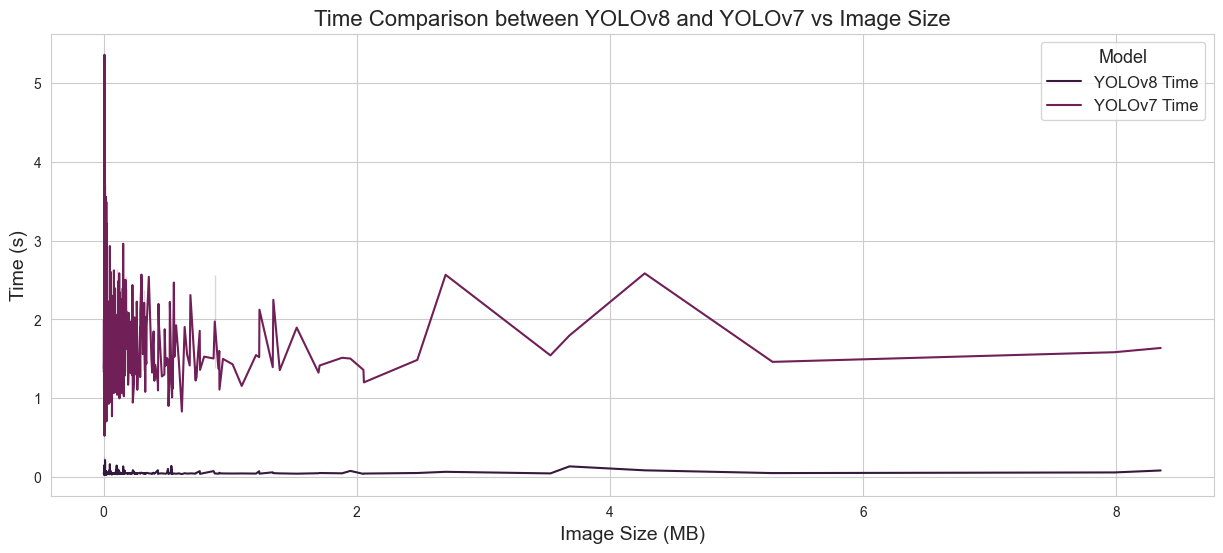

In [6]:
# Line Plot
plt.figure(figsize=(15, 6))
sns.set_style("whitegrid") 
sns.set_palette("rocket") 
sns.lineplot(data=df, x='img_size_mb', y='yolov8_time', label='YOLOv8 Time', linewidth=1.5)
sns.lineplot(data=df, x='img_size_mb', y='yolov7_time', label='YOLOv7 Time', linewidth=1.5)
plt.xlabel('Image Size (MB)', fontsize=14)
plt.ylabel('Time (s)', fontsize=14)
plt.title('Time Comparison between YOLOv8 and YOLOv7 vs Image Size', fontsize=16)
plt.grid(True)
plt.legend(title='Model', title_fontsize='13', fontsize='12')

plt.show()


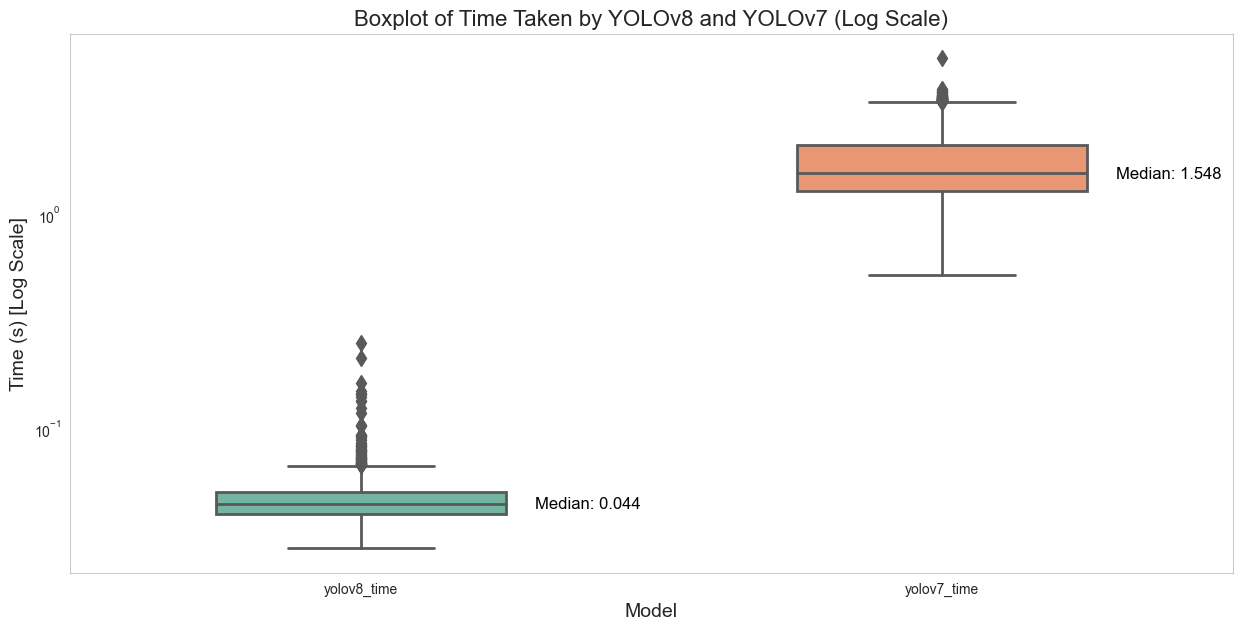

In [7]:
# Boxplot with Median Annotation on the Side
plt.figure(figsize=(15, 7))
sns.set_style("whitegrid") 
sns.set_palette("Set2") 

sns.boxplot(data=df[['yolov8_time', 'yolov7_time']], width=0.5, fliersize=8, linewidth=2)

plt.xlabel('Model', fontsize=14)
plt.ylabel('Time (s) [Log Scale]', fontsize=14)
plt.title('Boxplot of Time Taken by YOLOv8 and YOLOv7 (Log Scale)', fontsize=16)

# We set y-axis to logarithmic scale
plt.yscale("log")

plt.grid(axis='y')

# We annotate median values on the side for better context
medians = df[['yolov8_time', 'yolov7_time']].median()
for i, median in enumerate(medians):
    plt.text(i + 0.3, median, f"Median: {round(median, 3)}", 
             horizontalalignment='left', verticalalignment='center', fontsize=12, color='black')

plt.show()


/Users/lefterisfthenos/Desktop/MSBA - AUEB/Semester 3/Artificial Intelligence/ForestFireSmokeDetection/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


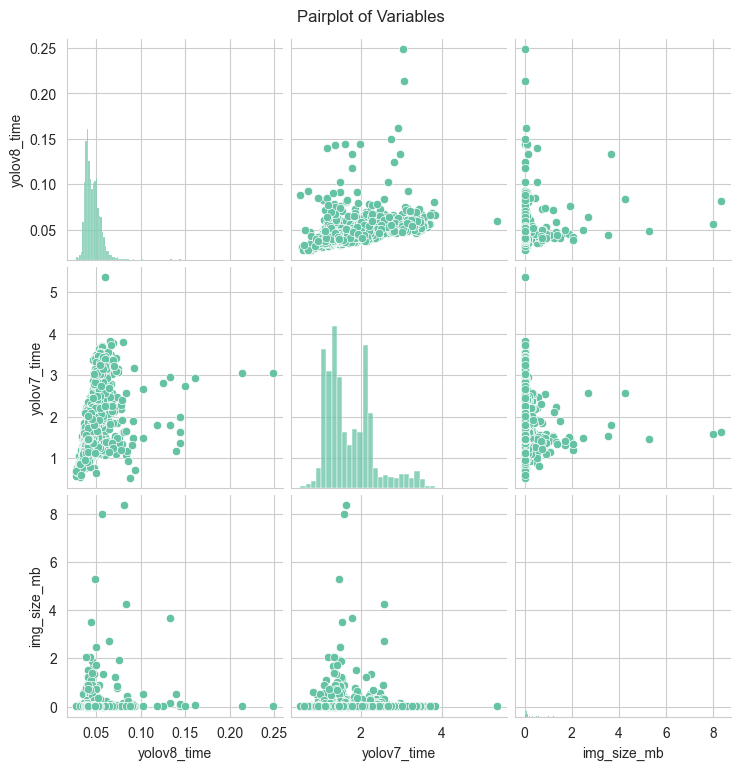

In [8]:
# Pairplot
sns.pairplot(df)
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()